# Upgrad-IIIT Bangalore Capstone Project for Cohort MLAI 60, Dec 2023 Batch

## <font color='blue'>Project : Credit Card Fraud Detection</font>

## <font color='blue'>Submitted by : Dipak Sah</font>



## Credit Card Fraud Detection

### **`Problem Statement : `**

The objective of this project is to predict fraudulent credit card transactions using machine learning models.

In this project, customer-level data, collected and analyzed through a collaboration between Worldline and the Machine Learning Group, will be examined.

Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset, sourced from Kaggle, comprises 284,807 transactions, with 492 identified as fraudulent. Given the highly imbalanced nature of the dataset, it requires appropriate handling before model development.


##**`Project Pipeline :`**

`Data Understanding:` Load and explore the dataset to comprehend the features it contains. This helps in selecting the necessary features for the final model.

`Exploratory Data Analysis (EDA):` Perform analyses of the data, followed by feature transformations if needed. Check for any data skewness and mitigate it to avoid issues during model building.

`Train/Test Split:` Implement the train/test split to evaluate model performance with unseen data. Use k-fold cross-validation for validation, selecting an appropriate k value to ensure the minority class is accurately represented in the test folds.

`Model Building/Hyperparameter Tuning:` Experiment with different models and fine-tune their hyperparameters to achieve the desired performance on the dataset. Explore various sampling techniques to potentially improve model performance.

`Model Evaluation: `Assess the models using relevant evaluation metrics. Given the imbalanced nature of the data, prioritize metrics that accurately identify fraudulent transactions over non-fraudulent ones. Choose evaluation metrics that align with this business goal.

## `About the Dataset:`
The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Metric Used For Evaluation

ROC-AUC Score:
The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds.

Since the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low.

Other metrics like precision,recall and F1-score are dependent on threshold.

We will use sklearn.metrics.roc_auc_score for this as the AUC and ROC metrics in scikit-learn are designed for highly imbalanced datasets, whereas other metrics often fail. The ROC metric has better false negative rates than false positive rates.

The ROC curve is a plot between the True Positive Rate (TPR) and False Positive Rate (FPR). The threshold with the highest value for TPR-FPR on the training set is usually the optimal cut-off.

We should avoid using the confusion matrix as a performance metric because it relies on a hard threshold of 0.5. Similarly, precision, recall, and F1-score are also dependent on specific threshold values and cannot be fully relied upon at this stage.

The ROC curve takes all possible threshold values into account. It is used to evaluate the strength of the model by analyzing its performance across all classification thresholds. The optimal threshold is one where the TPR is high and the FPR is low, leading to minimal misclassifications.


## Importing all required libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

!pip install scikit-learn==1.3.2
!pip install xgboost

import xgboost as xgb
import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,KFold,RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
#!pip install -U imbalanced-learn
import imblearn
from imblearn import over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import warnings
warnings.filterwarnings('ignore')

Note : While developing the solution,  I was facing problem/error `'super' object has no attribute '__sklearn_tags__'` , when using XGBoost Classifier and GridSearchCV. When explorering on this error , I found that I have to use scikit-learn version 1.3.2. , Hence checking the version is right or not.

In [ ]:
# print version of scikit learn and xgboost
print("scikit-learn version:", sklearn.__version__)
print("xgboost version:", xgb.__version__)

scikit-learn version: 1.3.2
xgboost version: 1.5.0


## Data Set Import

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
# path of the input file in the google drive
filepath = '/content/drive/MyDrive/GenAI/creditcard.csv'
df = pd.read_csv(filepath)
df.head()

Time        V1        V2       V3        V4        V5        V6  \
0 0.000000 -1.359807 -0.072781 2.536347  1.378155 -0.338321  0.462388   
1 0.000000  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361   
2 1.000000 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499   
3 1.000000 -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203   
4 2.000000 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28     Amount  Class  
0 -0.021053 149.620000      0  
1  0.014724   2.690000      0  
2 -0.059752 378.660000      0  
3  0.061458 123.500000      0  
4  0.215153  69.990000      0

In [ ]:
# path of the input file in the storage drive
#filepath = '/home/notebooks/creditcard.csv'
#df = pd.read_csv(filepath)
#df.head()

## Exploratory data analysis

In [ ]:
# Convert the columns of the DataFrame to a list
column_list = list(df.columns)

# Print the list of columns
print(column_list)


['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [ ]:
#observe the different feature type present in the data

print("Data types of the columns in the data frame:")
print("=============================================")
print(df.dtypes)

Data types of the columns in the data frame:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [ ]:
# printin the shape of the data frame
print("Shape of the data frame:")
print("=============================================")
print(df.shape)


Shape of the data frame:
(284807, 31)


In [ ]:
# printing the information of the given data frame
print("Information about the data frame:")
print("=============================================")
print(df.info())

Information about the data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807

In [ ]:
# printing the summary statistics of the dataframe
print("Numeric distribution of the data frame:")
print("=============================================")
print(df.describe())

Numeric distribution of the data frame:
               Time            V1            V2            V3            V4  \
count 284807.000000 284807.000000 284807.000000 284807.000000 284807.000000   
mean   94813.859575      0.000000      0.000000     -0.000000      0.000000   
std    47488.145955      1.958696      1.651309      1.516255      1.415869   
min        0.000000    -56.407510    -72.715728    -48.325589     -5.683171   
25%    54201.500000     -0.920373     -0.598550     -0.890365     -0.848640   
50%    84692.000000      0.018109      0.065486      0.179846     -0.019847   
75%   139320.500000      1.315642      0.803724      1.027196      0.743341   
max   172792.000000      2.454930     22.057729      9.382558     16.875344   

                 V5            V6            V7            V8            V9  \
count 284807.000000 284807.000000 284807.000000 284807.000000 284807.000000   
mean      -0.000000      0.000000     -0.000000     -0.000000     -0.000000   
std        

### Handling Missing Values

In [ ]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Total  Percent
Time        0 0.000000
V16         0 0.000000
Amount      0 0.000000
V28         0 0.000000
V27         0 0.000000
V26         0 0.000000
V25         0 0.000000
V24         0 0.000000
V23         0 0.000000
V22         0 0.000000
V21         0 0.000000
V20         0 0.000000
V19         0 0.000000
V18         0 0.000000
V17         0 0.000000
V15         0 0.000000
V1          0 0.000000
V14         0 0.000000
V13         0 0.000000
V12         0 0.000000
V11         0 0.000000
V10         0 0.000000
V9          0 0.000000
V8          0 0.000000
V7          0 0.000000
V6          0 0.000000
V5          0 0.000000
V4          0 0.000000
V3          0 0.000000
V2          0 0.000000
Class       0 0.000000

### <font color='blue'>Observation</font> : There are no missing values in the dataset as we can see from above result.

Observing the distribution of our classes

In [ ]:
# Calculate the value counts of the 'Class' column in the DataFrame
classes = df['Class'].value_counts()

# Calculate the share of normal transactions and round to three decimal places
normal_share = round(classes[0] / df['Class'].count() * 100, 3)

# Calculate the share of fraudulent transactions and round to three decimal places
fraud_share = round(classes[1] / df['Class'].count() * 100, 3)

In [ ]:
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))


Non-Fraudulent : 99.827 %
    Fraudulent : 0.173 %


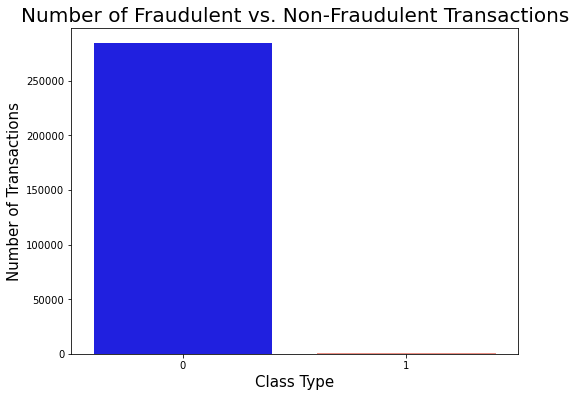

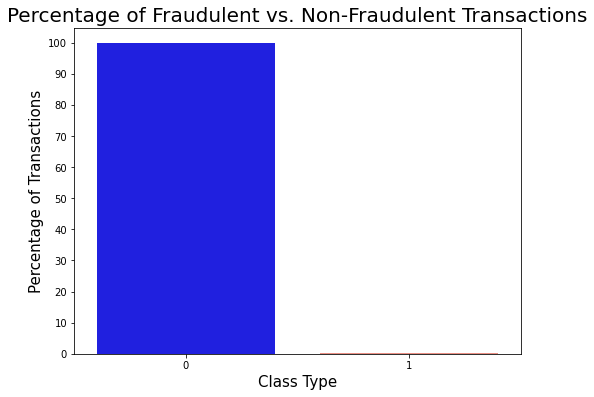

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transactions

# Bar plot in terms of numbers
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette=['blue', 'salmon'])  # Create a count plot for the 'Class' column
plt.title("Number of Fraudulent vs. Non-Fraudulent Transactions", fontsize=20)  # Add a title to the plot
plt.xlabel("Class Type", fontsize=15)  # Label the x-axis
plt.ylabel("Number of Transactions", fontsize=15)  # Label the y-axis
plt.show()  # Display the plot

# Bar plot in terms of percentages
plt.figure(figsize=(8, 6))
transaction_percentages_sns = df['Class'].value_counts(normalize=True) * 100  # Calculate the percentage of each class
sns.barplot(x=transaction_percentages_sns.index, y=transaction_percentages_sns.values, palette=['blue', 'salmon'])  # Create a bar plot for the percentages
plt.title("Percentage of Fraudulent vs. Non-Fraudulent Transactions", fontsize=20)  # Add a title to the plot
plt.xlabel("Class Type", fontsize=15)  # Label the x-axis
plt.ylabel("Percentage of Transactions", fontsize=15)  # Label the y-axis
plt.yticks(range(0, 101, 10))  # Set the y-axis ticks from 0 to 100 with an interval of 10
plt.show()  # Display the plot



### <font color='blue'>Observation</font> :

1. The dataset exhibits a significant class imbalance, with only 492 out of 284,807 records classified as fraudulent transactions.
2. This represents a distribution of 99.83% for the majority (non-fraudulent) class and 0.17% for the minority (fraudulent) class.

In [ ]:
# The imbalance percentage is calculated by dividing the percentage of fraudulent transactions by the percentage of normal transactions, and then multiplying the result by 100.
imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Imbalance Percentage = 0.17329980866899736


Text(0.5, 1.05, 'Time vs Class Distribution')

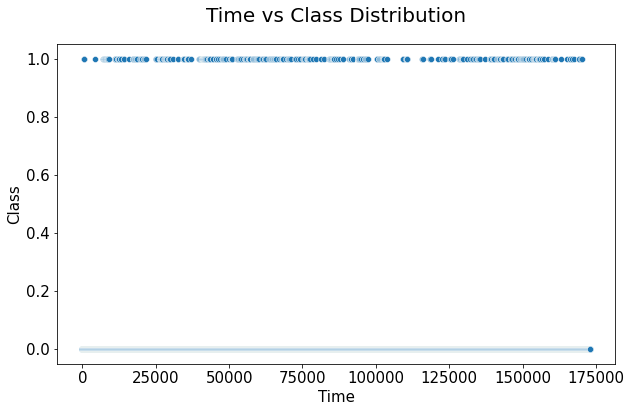

In [ ]:
# Create a scatter plot to observe the distribution of classes with time

# Initialize a figure with specified size
fig = plt.figure(figsize=(10, 20))

# Create a color palette
cmap = sns.color_palette('Set1')

# Plot the relationship between the variables
plt.subplot(3, 1, 1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)  # Create a scatter plot for 'Time' vs 'Class'
plt.xlabel('Time', size=15)  # Label the x-axis
plt.ylabel('Class', size=15)  # Label the y-axis
plt.tick_params(axis='x', labelsize=15)  # Set tick parameters for the x-axis
plt.tick_params(axis='y', labelsize=15)  # Set tick parameters for the y-axis
plt.title('Time vs Class Distribution', size=20, y=1.05)  # Add a title to the plot

In [ ]:
# creating fradulant dataframes
data_fraud = df[df['Class'] == 1]

# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

In [ ]:
data_non_fraud

Time         V1        V2        V3        V4        V5  \
0           0.000000  -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1           0.000000   1.191857  0.266151  0.166480  0.448154  0.060018   
2           1.000000  -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3           1.000000  -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4           2.000000  -1.158233  0.877737  1.548718  0.403034 -0.407193   
...              ...        ...       ...       ...       ...       ...   
284802 172786.000000 -11.881118 10.071785 -9.834783 -2.066656 -5.364473   
284803 172787.000000  -0.732789 -0.055080  2.035030 -0.738589  0.868229   
284804 172788.000000   1.919565 -0.301254 -3.249640 -0.557828  2.630515   
284805 172788.000000  -0.240440  0.530483  0.702510  0.689799 -0.377961   
284806 172792.000000  -0.533413 -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801   
1      -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235   
2       1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084   
3       1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228   
4       0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941   
284803  1.058415  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802   
284804  3.031260 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119   
284805  0.623708 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886   
284806 -0.649617  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513   

             V13       V14       V15       V16       V17       V18       V19  \
0      -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993   
1       0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783   
2       0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857   
3       0.507757 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622   
4       1.345852 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -0.689256  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920   
284803  1.214756 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556   
284804 -0.183699 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252   
284805 -1.042082  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849   
284806 -0.188093 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117   

             V20       V21       V22       V23       V24       V25       V26  \
0       0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1      -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895   
2       0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3      -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4       0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.475829  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034   
284803  0.059616  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255   
284804  0.001396  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371   
284805  0.127434  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668   
284806  0.382948  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267   

             V27       V28     Amount  Class  
0       0.133558 -0.021053 149.620000      0  
1      -0.008983  0.014724   2.690000      0  
2      -0.055353 -0.059752 378.660000      0  
3       0.062723  0.061458 123.500000      0

In [ ]:
data_fraud

Time        V1        V2        V3       V4        V5  \
541       406.000000 -2.312227  1.951992 -1.609851 3.997906 -0.522188   
623       472.000000 -3.043541 -3.157307  1.088463 2.288644  1.359805   
4920     4462.000000 -2.303350  1.759247 -0.359745 2.330243 -0.821628   
6108     6986.000000 -4.397974  1.358367 -2.592844 2.679787 -1.128131   
6329     7519.000000  1.234235  3.019740 -4.304597 4.732795  3.624201   
...              ...       ...       ...       ...      ...       ...   
279863 169142.000000 -1.927883  1.125653 -4.518331 1.749293 -1.566487   
280143 169347.000000  1.378559  1.289381 -5.004247 1.411850  0.442581   
280149 169351.000000 -0.676143  1.126366 -2.213700 0.468308 -1.120541   
281144 169966.000000 -3.113832  0.585864 -5.399730 1.817092 -0.840618   
281674 170348.000000  1.991976  0.158476 -2.583441 0.408670  1.151147   

              V6        V7        V8        V9       V10       V11        V12  \
541    -1.426545 -2.537387  1.391657 -2.770089 -2.772272  3.202033  -2.899907   
623    -1.064823  0.325574 -0.067794 -0.270953 -0.838587 -0.414575  -0.503141   
4920   -0.075788  0.562320 -0.399147 -0.238253 -1.525412  2.032912  -6.560124   
6108   -1.706536 -3.496197 -0.248778 -0.247768 -4.801637  4.895844 -10.912819   
6329   -1.357746  1.713445 -0.496358 -1.282858 -2.447469  2.101344  -4.609628   
...          ...       ...       ...       ...       ...       ...        ...   
279863 -2.010494 -0.882850  0.697211 -2.064945 -5.587794  2.115795  -5.417424   
280143 -1.326536 -1.413170  0.248525 -1.127396 -3.232153  2.858466  -3.096915   
280149 -0.003346 -2.234739  1.210158 -0.652250 -3.463891  1.794969  -2.775022   
281144 -2.943548 -2.208002  1.058733 -1.632333 -5.245984  1.933520  -5.030465   
281674 -0.096695  0.223050 -0.068384  0.577829 -0.888722  0.491140   0.728903   

             V13       V14       V15       V16        V17       V18       V19  \
541    -0.595222 -4.289254  0.389724 -1.140747  -2.830056 -0.016822  0.416956   
623     0.676502 -1.692029  2.000635  0.666780   0.599717  1.725321  0.283345   
4920    0.022937 -1.470102 -0.698826 -2.282194  -4.781831 -2.615665 -1.334441   
6108    0.184372 -6.771097 -0.007326 -7.358083 -12.598419 -5.131549  0.308334   
6329    1.464378 -6.079337 -0.339237  2.581851   6.739384  3.042493 -2.721853   
...          ...       ...       ...       ...        ...       ...       ...   
279863 -1.235123 -6.665177  0.401701 -2.897825  -4.570529 -1.315147  0.391167   
280143 -0.792532 -5.210141 -0.613803 -2.155297  -3.267116 -0.688505  0.737657   
280149 -0.418950 -4.057162 -0.712616 -1.603015  -5.035326 -0.507000  0.266272   
281144 -1.127455 -6.416628  0.141237 -2.549498  -4.614717 -1.478138 -0.035480   
281674  0.380428 -1.948883 -0.832498  0.519436   0.903562  1.197315  0.593509   

             V20       V21       V22       V23       V24       V25       V26  \
541     0.126911  0.517232 -0.035049 -0.465211  0.320198  0.044519  0.177840   
623     2.102339  0.661696  0.435477  1.375966 -0.293803  0.279798 -0.145362   
4920   -0.430022 -0.294166 -0.932391  0.172726 -0.087330 -0.156114 -0.542628   
6108   -0.171608  0.573574  0.176968 -0.436207 -0.053502  0.252405 -0.657488   
6329    0.009061 -0.379068 -0.704181 -0.656805 -1.632653  1.488901  0.566797   
...          ...       ...       ...       ...       ...       ...       ...   
279863  1.252967  0.778584 -0.319189  0.639419 -0.294885  0.537503  0.788395   
280143  0.226138  0.370612  0.028234 -0.145640 -0.081049  0.521875  0.739467   
280149  0.247968  0.751826  0.834108  0.190944  0.032070 -0.739695  0.471111   
281144  0.306271  0.583276 -0.269209 -0.456108 -0.183659 -0.328168  0.606116   
281674 -0.017652 -0.164350 -0.295135 -0.072173 -0.450261  0.313267 -0.289617   

             V27       V28     Amount  Class  
541     0.261145 -0.143276   0.000000      1  
623    -0.252773  0.035764 529.000000      1  
4920    0.039566 -0.153029 239.930000      1  
6108   -0.827136  0.849573  59.000000      1

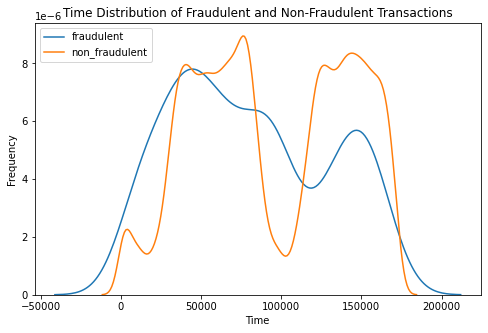

In [ ]:
# Create a distribution plot

plt.figure(figsize=(8, 5))  # Initialize a figure with specified size

# Plot the distribution of 'Time' for fraudulent transactions without the histogram
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)

# Plot the distribution of 'Time' for non-fraudulent transactions without the histogram
ax = sns.distplot(data_non_fraud['Time'], label='non_fraudulent', hist=False)

# Set the labels for the x-axis and y-axis
ax.set(xlabel='Time', ylabel='Frequency')

# Add a title to the plot
plt.title('Time Distribution of Fraudulent and Non-Fraudulent Transactions')

# Add a legend to the plot
plt.legend(loc='best')

# Display the plot
plt.show()


### <font color='blue'>Observation</font> :
The timing of transactions offers very little insight into fraud detection, as both fraudulent and legitimate transactions occur throughout the day.

Text(0.5, 1.05, 'Amount vs Class Distribution')

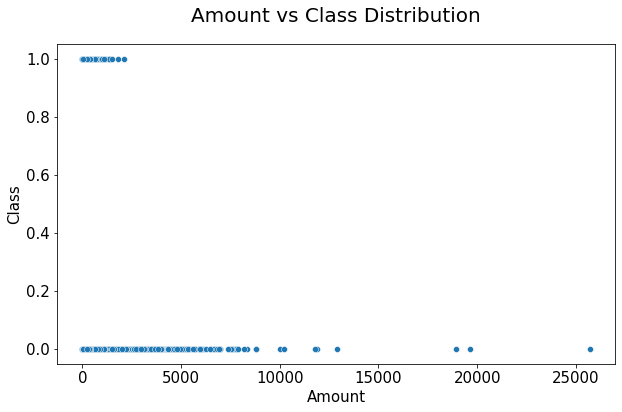

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount

# Initialize a figure with specified size
fig = plt.figure(figsize=(10, 20))

# Create a color palette
cmap = sns.color_palette('Set1')

# Plot the relationship between the variables
plt.subplot(3, 1, 1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)  # Create a scatter plot for 'Amount' vs 'Class'
plt.xlabel('Amount', size=15)  # Label the x-axis
plt.ylabel('Class', size=15)  # Label the y-axis
plt.tick_params(axis='x', labelsize=15)  # Set tick parameters for the x-axis
plt.tick_params(axis='y', labelsize=15)  # Set tick parameters for the y-axis
plt.title('Amount vs Class Distribution', size=20, y=1.05)  # Add a title to the plot


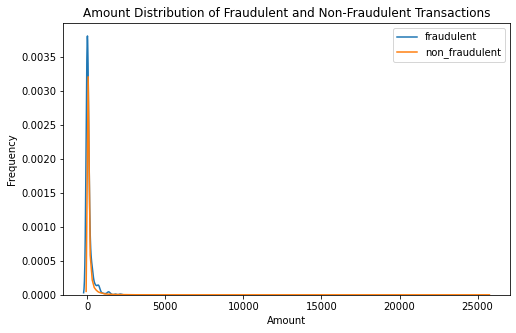

In [ ]:
# Create a distribution plot

plt.figure(figsize=(8, 5))  # Initialize a figure with specified size

# Plot the distribution of 'Amount' for fraudulent transactions without the histogram
ax = sns.distplot(data_fraud['Amount'], label='fraudulent', hist=False)

# Plot the distribution of 'Amount' for non-fraudulent transactions without the histogram
ax = sns.distplot(data_non_fraud['Amount'], label='non_fraudulent', hist=False)

# Set the labels for the x-axis and y-axis
ax.set(xlabel='Amount', ylabel='Frequency')

# Add a title to the plot
plt.title('Amount Distribution of Fraudulent and Non-Fraudulent Transactions')

# Add a legend to the plot
plt.legend(loc='best')

# Display the plot
plt.show()


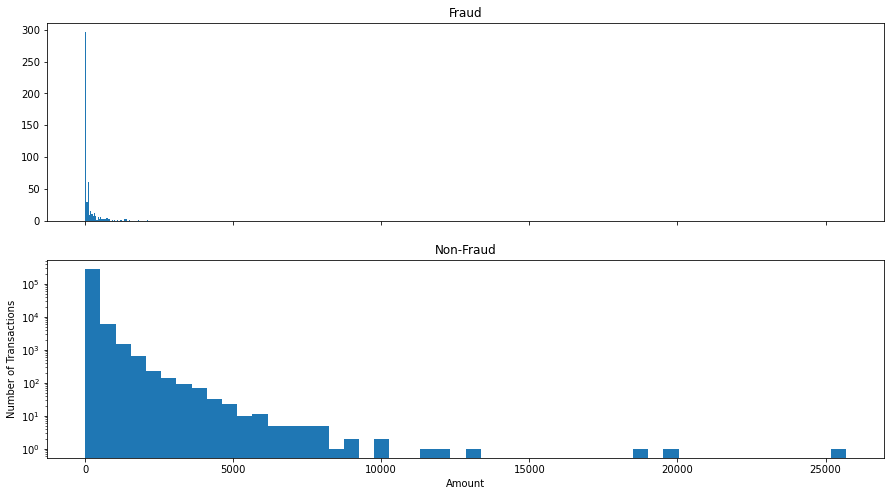

In [ ]:
# Plotting histogram

# Create a figure with 2 subplots that share the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))

# Plot the histogram of 'Amount' for fraudulent transactions with 50 bins
ax1.hist(data_fraud['Amount'], bins=50)
ax1.set_title('Fraud')  # Add a title to the first subplot

# Plot the histogram of 'Amount' for non-fraudulent transactions with 50 bins
ax2.hist(data_non_fraud['Amount'], bins=50)
ax2.set_title('Non-Fraud')  # Add a title to the second subplot

# Label the x-axis
plt.xlabel('Amount')
# Label the y-axis
plt.ylabel('Number of Transactions')
# Set the y-axis to a logarithmic scale
plt.yscale('log')
# Display the plot
plt.show()


### <font color='blue'>Observation</font>  :  

It is visible that low amount transactions are more likely to be fraudelent transactions when compared with high amounts

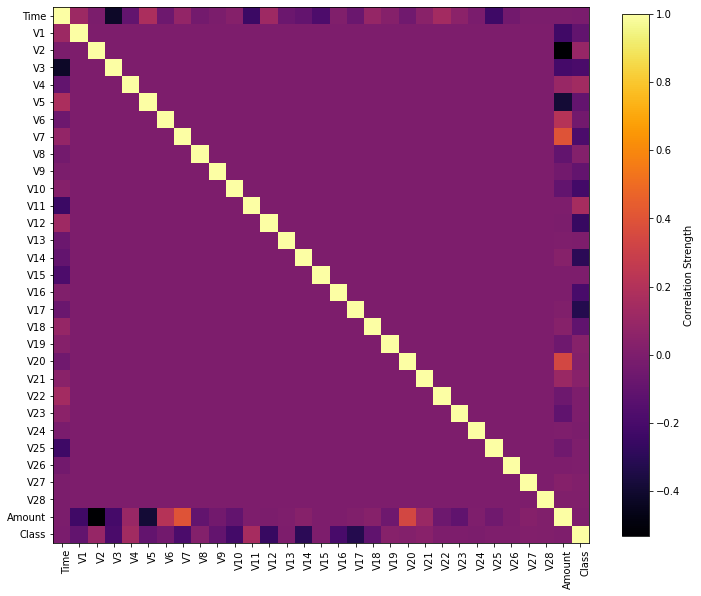

In [ ]:
# Understanding more on the correlation in data

# Calculate the correlation matrix for the DataFrame
corr = df.corr()

# Initialize a figure with specified size
fig, ax = plt.subplots(figsize=(12, 12))

# Create a heatmap of the correlation matrix using the 'plasma' colormap
im = ax.imshow(corr, cmap='inferno')

# Set the x-ticks and y-ticks to the number of columns in the DataFrame
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))

# Label the x-ticks and y-ticks with the column names, and rotate the x-tick labels for better readability
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Add a colorbar to the plot, adjust its aspect ratio, shrink it, and add a label for the correlation strength
plt.colorbar(im, aspect=20, shrink=0.80, pad=0.05, label='Correlation Strength')

# Display the plot
plt.show()


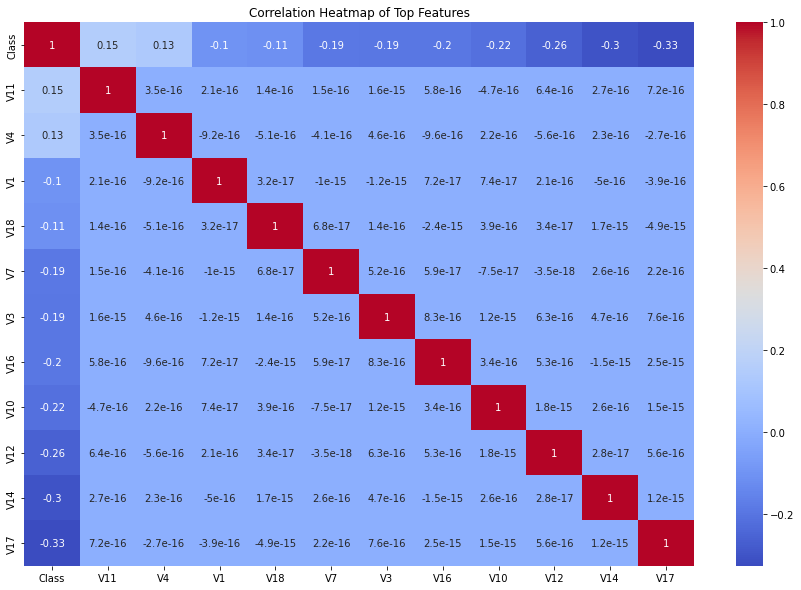

In [ ]:
# Going a little deeper, analyzing the most important features with strong correlations, greater than 0.1

# Calculate the correlation of each feature with the 'Class' column
correlations = df.corr()['Class']

# Create a DataFrame to store the correlations
correlations_df = pd.DataFrame({'Correlation': correlations})

# Sort the correlations in descending order
sorted_correlations = correlations_df.sort_values(by=['Correlation'], ascending=False)

# Select the top features with absolute correlation greater than 0.1
top_features = sorted_correlations.index[abs(sorted_correlations['Correlation']) > 0.1]

# Calculate the correlation matrix for the top features
top_corr_matrix = df[top_features].corr()

# Create a heatmap of the top feature correlations
plt.figure(figsize=(15, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')  # Use 'coolwarm' colormap for the heatmap
plt.title("Correlation Heatmap of Top Features")  # Add a title to the heatmap
plt.show()  # Display the heatmap

### <font color='blue'>Observation</font> :  

There are no features which has high correlations.

`Plotting the distributions of all the features`




<Figure size 432x288 with 0 Axes>

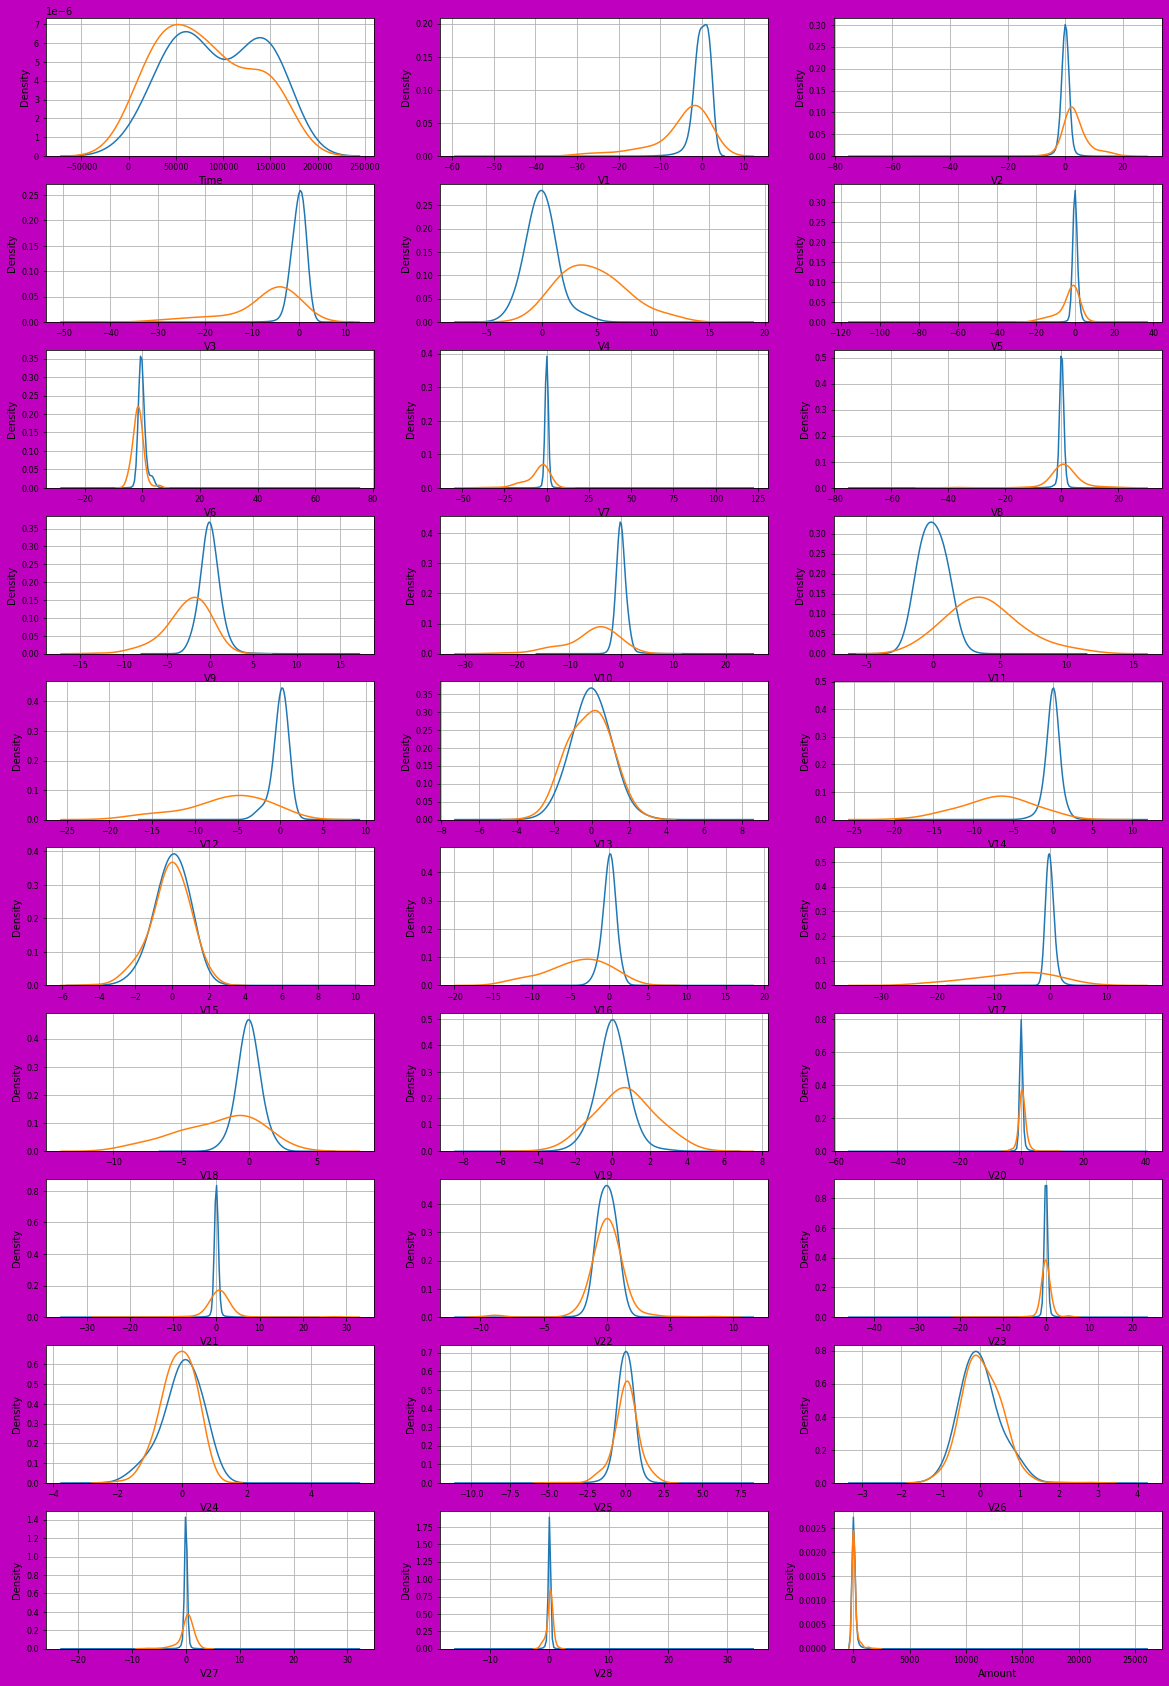

In [ ]:
# Plotting all the variables in displot to visualize the distribution

# Create a list of all column names in the DataFrame
var = list(df.columns.values)

# Remove the 'Class' column from the list of variables
var.remove("Class")

# Initialize the index for subplot positioning
i = 0

# Create a new figure
plt.figure()

# Create a figure with 30 subplots (10 rows, 3 columns), with specified size and background color
fig, ax = plt.subplots(10, 3, figsize=(20, 30), facecolor='m')

# Iterate over each feature in the list of variables
for feature in var:
    i += 1
    plt.subplot(10, 3, i)  # Add a subplot in the specified position
    sns.kdeplot(data_non_fraud[feature], bw=0.5, label="0")  # Plot the KDE for non-fraudulent data
    sns.kdeplot(data_fraud[feature], bw=0.5, label="1")  # Plot the KDE for fraudulent data
    plt.xlabel(feature, fontsize=10)  # Label the x-axis
    plt.ylabel("Density", fontsize=10)  # Label the y-axis
    locs, labels = plt.xticks()  # Get the current x-axis tick positions and labels
    plt.tick_params(axis='both', which='major', labelsize=8)  # Set the tick parameters for both axes
    plt.grid()  # Add a grid to the subplot

# Display the plots
plt.show()


### <font color='blue'>Observation</font> : After visualizing the above plots for all features , we can say that most of the distributions are overlapping.

### Dropping Unwanted Features

In [ ]:
# Drop unnecessary columns

# Based on the obervation from time vs class plot, we can say that time feature is not going to help in the model building so let us drop that .
df.drop('Time', axis = 1, inplace= True)

df.head()

V1        V2       V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781 2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

      Amount  Class  
0 149.620000      0  
1   2.690000      0  
2 378.660000      0  
3 123.500000      0  
4  69.990000      0

### Splitting the data into train & test data

In [ ]:
df.shape

(284807, 30)

In [ ]:
# Separate the target variable 'Class' from the DataFrame
y = df["Class"]

# Drop the 'Class' column from the DataFrame to create the feature set
X = df.drop("Class", axis=1)

# Print the shapes of the target variable and the feature set
y.shape, X.shape

((284807,), (284807, 29))

In [ ]:
# Splitting the dataset into an 80:20 train-test size
# The stratify parameter in train_test_split ensures that the split of the data into training and testing sets is done in a way that preserves the distribution of the target variable.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [ ]:
# Checking the split of the class label
print("Fraudulent Count for Full data  : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print("Fraudulent Count for Test data  : ",np.sum(y_test))

Fraudulent Count for Full data  :  492
Fraudulent Count for Train data :  394
Fraudulent Count for Test data  :  98


In [ ]:
# Checking the split of the class label in term of percentage
print("Fraudulent Percentage for Full data  : ",np.sum(y)/len(y)*100)
print("Fraudulent Percentage for Train data : ",np.sum(y_train)/len(y_train)*100)
print("Fraudulent Percentage for Test data  : ",np.sum(y_test)/len(y_test)*100)

Fraudulent Percentage for Full data  :  0.1727485630620034
Fraudulent Percentage for Train data :  0.17292457591783889
Fraudulent Percentage for Test data  :  0.17204452090867595


### <font color='blue'>Observation</font> : So we can say that stratify has worked as expected. The distribution is similar.

### `Feature Scaling using RobustScaler Scaler`

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field which is in its raw form.
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [ ]:
# Browsing the data after scaling
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
265518  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933 -1.479661   
180305  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697 -0.002192   
42664  -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261 -2.212603   
198723  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339 -1.427984   
82325  -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490  0.504347   

              V8        V9       V10       V11       V12       V13       V14  \
265518  1.139880  1.406819 -0.157403 -0.113729  0.510277  0.061258 -0.066555   
180305  0.674782  0.045826  0.284864 -0.254903  0.325560 -0.405327  0.721068   
42664  -5.037523  0.000772 -2.009561 -0.386845  1.820161  0.747777  0.122746   
198723  0.010010 -1.118447  1.756121  0.093136 -0.722450 -0.468757 -0.195288   
82325  -0.113817 -0.044782 -0.558955 -0.251076 -0.054708 -0.782698  0.134659   

             V15       V16       V17       V18       V19       V20       V21  \
265518  1.328702  0.352514 -0.765670  0.141938 -0.451365 -0.134435  0.076197   
180305 -0.148445 -0.754029 -0.270842 -0.695698 -0.274411 -0.227279  0.038628   
42664  -1.723285  1.123344 -0.724616  0.147255  0.004631  1.280856 -2.798352   
198723 -0.638683 -0.065888  0.072781  0.768237  0.257424 -0.490642 -0.139670   
82325  -0.483007 -2.096099 -0.399525  1.597589 -0.082746 -0.275297 -0.243245   

             V22       V23       V24       V25       V26       V27       V28  \
265518  0.297537  0.307915  0.690980 -0.350316 -0.388907  0.077641 -0.032248   
180305  0.228197  0.035542  0.707090  0.512885 -0.471198  0.002520 -0.069002   
42664   0.109526 -0.436530 -0.932803  0.826684  0.913773  0.038049  0.185340   
198723  0.077013  0.208310 -0.538236 -0.278032 -0.162068  0.018045 -0.063005   
82325  -0.173298 -0.006692 -1.362383 -0.292234 -0.144622 -0.032580 -0.064194   

          Amount  
265518 -0.204315  
180305 -0.264579  
42664   2.130828  
198723 -0.221294  
82325   0.892136

In [ ]:
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10       V11       V12       V13       V14  \
263020 -0.614233  0.311652  0.650757 -0.857785 -0.229961 -0.199817  0.266371   
11378  -0.250020  3.073504 -1.000418  1.850842 -1.549779  1.252337  0.963974   
147283 -0.718922  1.874046  7.398491  2.081146 -0.064145  0.577556 -2.430201   
219439 -0.338140  0.455091  0.047859 -0.652497  0.750829  0.665603  0.158608   
36939  -0.475963 -0.629658 -1.579654  1.462573  0.208823  0.734537 -3.538625   

             V15       V16       V17       V18       V19       V20       V21  \
263020 -0.046544 -0.741398 -0.605617 -0.392568 -0.162648  0.394322  0.080084   
11378  -0.481027 -0.147319 -0.209328  1.058898  0.397057 -0.515765 -0.295555   
147283  1.505993 -1.237941 -0.390405 -1.231804  0.098738  2.034786 -1.060151   
219439  0.027348 -0.171173 -0.291228 -1.008531  0.097040 -0.192024 -0.281684   
36939   0.926076  0.835029  2.845937  1.040947 -1.045263  0.009083 -0.164015   

             V22       V23       V24       V25       V26       V27       V28  \
263020  0.810034 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   
11378   0.109305 -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   
147283  0.016867 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   
219439 -0.639426  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077   
36939  -0.328294 -0.154631  0.619449  0.818998 -0.330525  0.046884  0.104527   

          Amount  
263020  0.013918  
11378  -0.141267  
147283  0.752540  
219439 -0.292415  
36939  -0.285317

### `Checking Skewness`

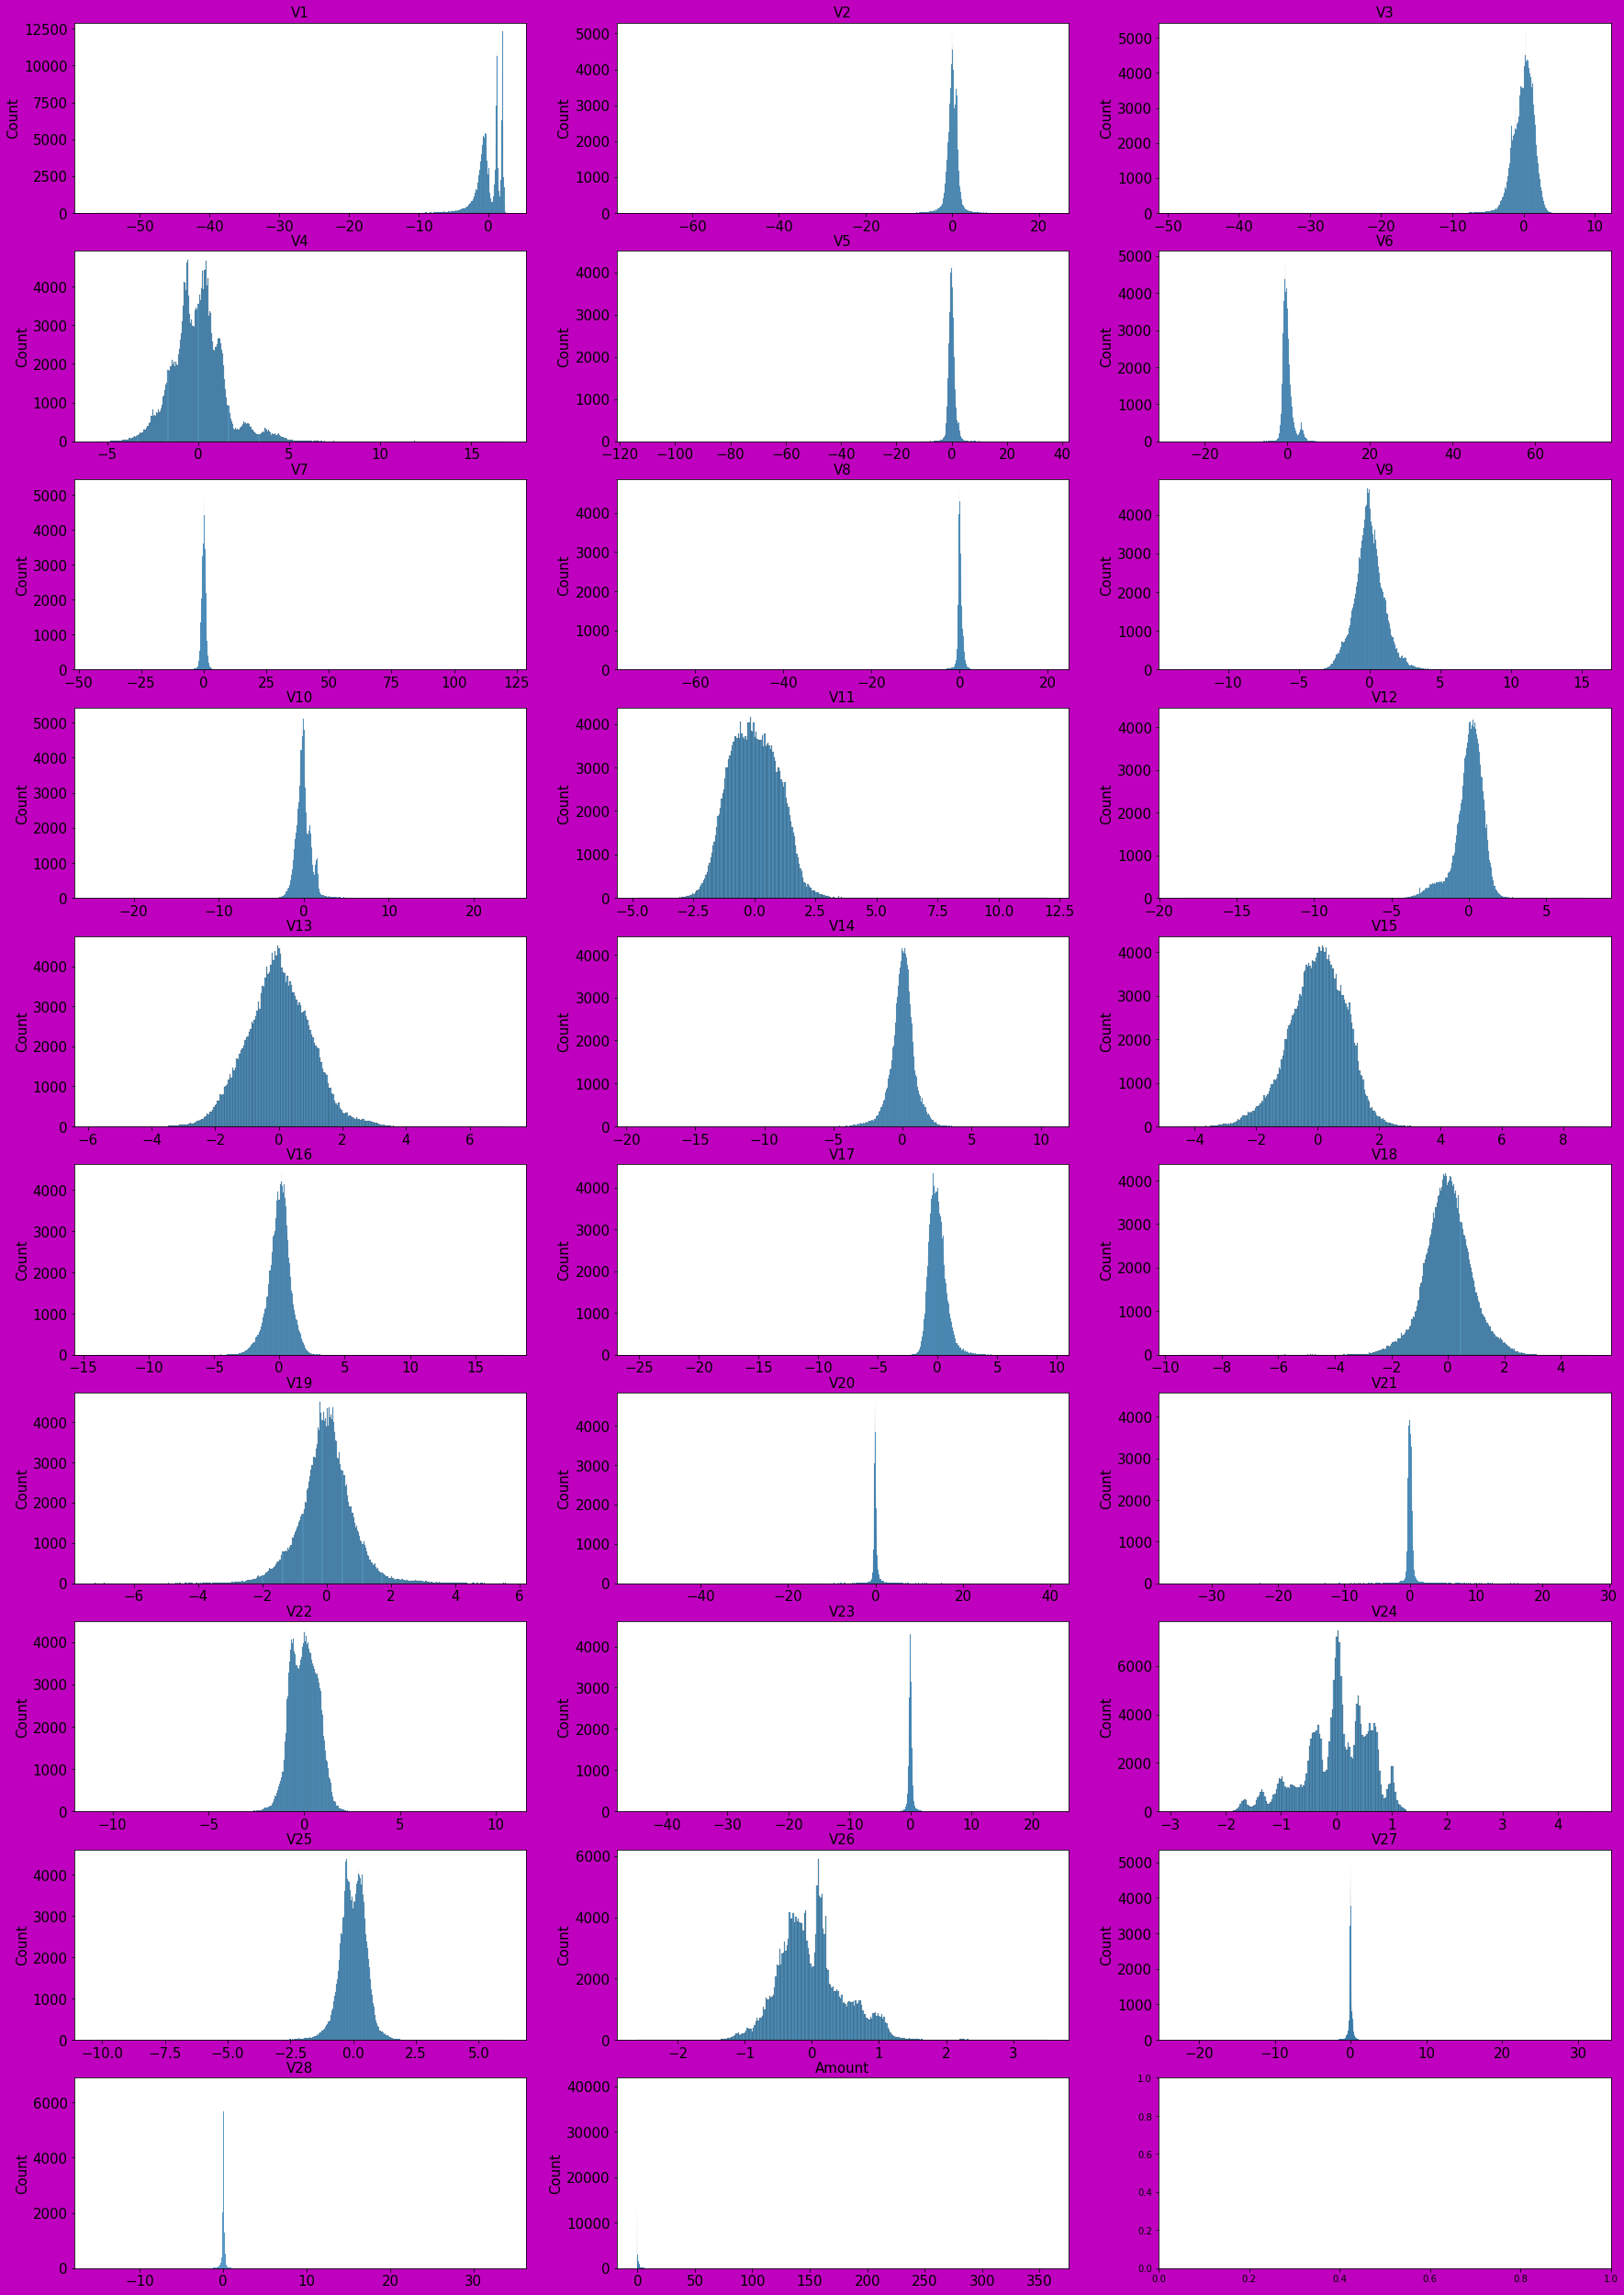

In [ ]:
# Plot the histogram of a variable from the dataset to see the skewness

# Create a list of all column names in the training dataset
var = list(X_train.columns.values)

# Create a figure with 30 subplots (10 rows, 3 columns), with specified size and background color
fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate over each feature and corresponding subplot axis
for i, ax in enumerate(axes):
    if i < len(var):
        sns.histplot(X_train[var[i]], ax=ax)  # Plot the histogram for the feature
        ax.set_title(var[i], fontsize=15)  # Add a title to the subplot
        ax.set_ylabel("Count", fontsize=15)  # Label the y-axis
        ax.tick_params(axis='both', labelsize=15)  # Set the tick parameters for both axes
        ax.set_xlabel('')  # Remove the x-axis label for cleaner appearance

# Display the plots
plt.show()


In [ ]:
# Let's check the skewness of the features using skew(), if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

# Create a list of all column names in the training dataset
var = X_train.columns

# Initialize an empty list to store the skewness values
skew_list = []

# Iterate over each feature and calculate its skewness
for i in var:
    skew_list.append(X_train[i].skew())

# Combine the features and their corresponding skewness values into a DataFrame
skew_data = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)

# Set the 'Features' column as the index of the DataFrame
skew_data.set_index("Features", inplace=True)

# Display the DataFrame containing features and their skewness values
skew_data

Skewness
Features          
V1       -3.306334
V2       -4.779484
V3       -2.247962
V4        0.687574
V5       -2.786851
V6        1.937381
V7        3.152665
V8       -8.639485
V9        0.541869
V10       1.132688
V11       0.354102
V12      -2.286654
V13       0.064819
V14      -1.969112
V15      -0.308419
V16      -1.077909
V17      -3.733377
V18      -0.254948
V19       0.106133
V20      -1.960492
V21       3.490183
V22      -0.219171
V23      -6.258558
V24      -0.549854
V25      -0.436292
V26       0.574980
V27      -0.890209
V28       9.978409
Amount   18.193943

### <font color='blue'>Observation</font> : There is skewness present in the distribution of the above features.

`Impact of Skewed Data `: Skewed data can negatively impact the performance of models, by reducing their ability to accurately describe typical cases. This happens because the model has to account for rare extreme values. For example, right-skewed data will result in better predictions for data points with lower values, while predictions for higher values may be less accurate.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# Apply preprocessing.PowerTransformer to fit & transform the train & test data

# Create an instance of the PowerTransformer class with 'yeo-johnson' method
pt = preprocessing.PowerTransformer(method='yeo-johnson', copy=True)

# Fit the PowerTransformer on the training data
pt.fit(X_train)

# Transform the training data
X_train_pt = pt.transform(X_train)

# Transform the testing data
X_test_pt = pt.transform(X_test)

In [ ]:
print(X_train_pt.shape)
print(X_test_pt.shape)

(227845, 29)
(56962, 29)


In [ ]:
#Create Dataframe
X_train = pd.DataFrame(data=X_train_pt,columns=var)
X_test  = pd.DataFrame(data=X_test_pt, columns=var)

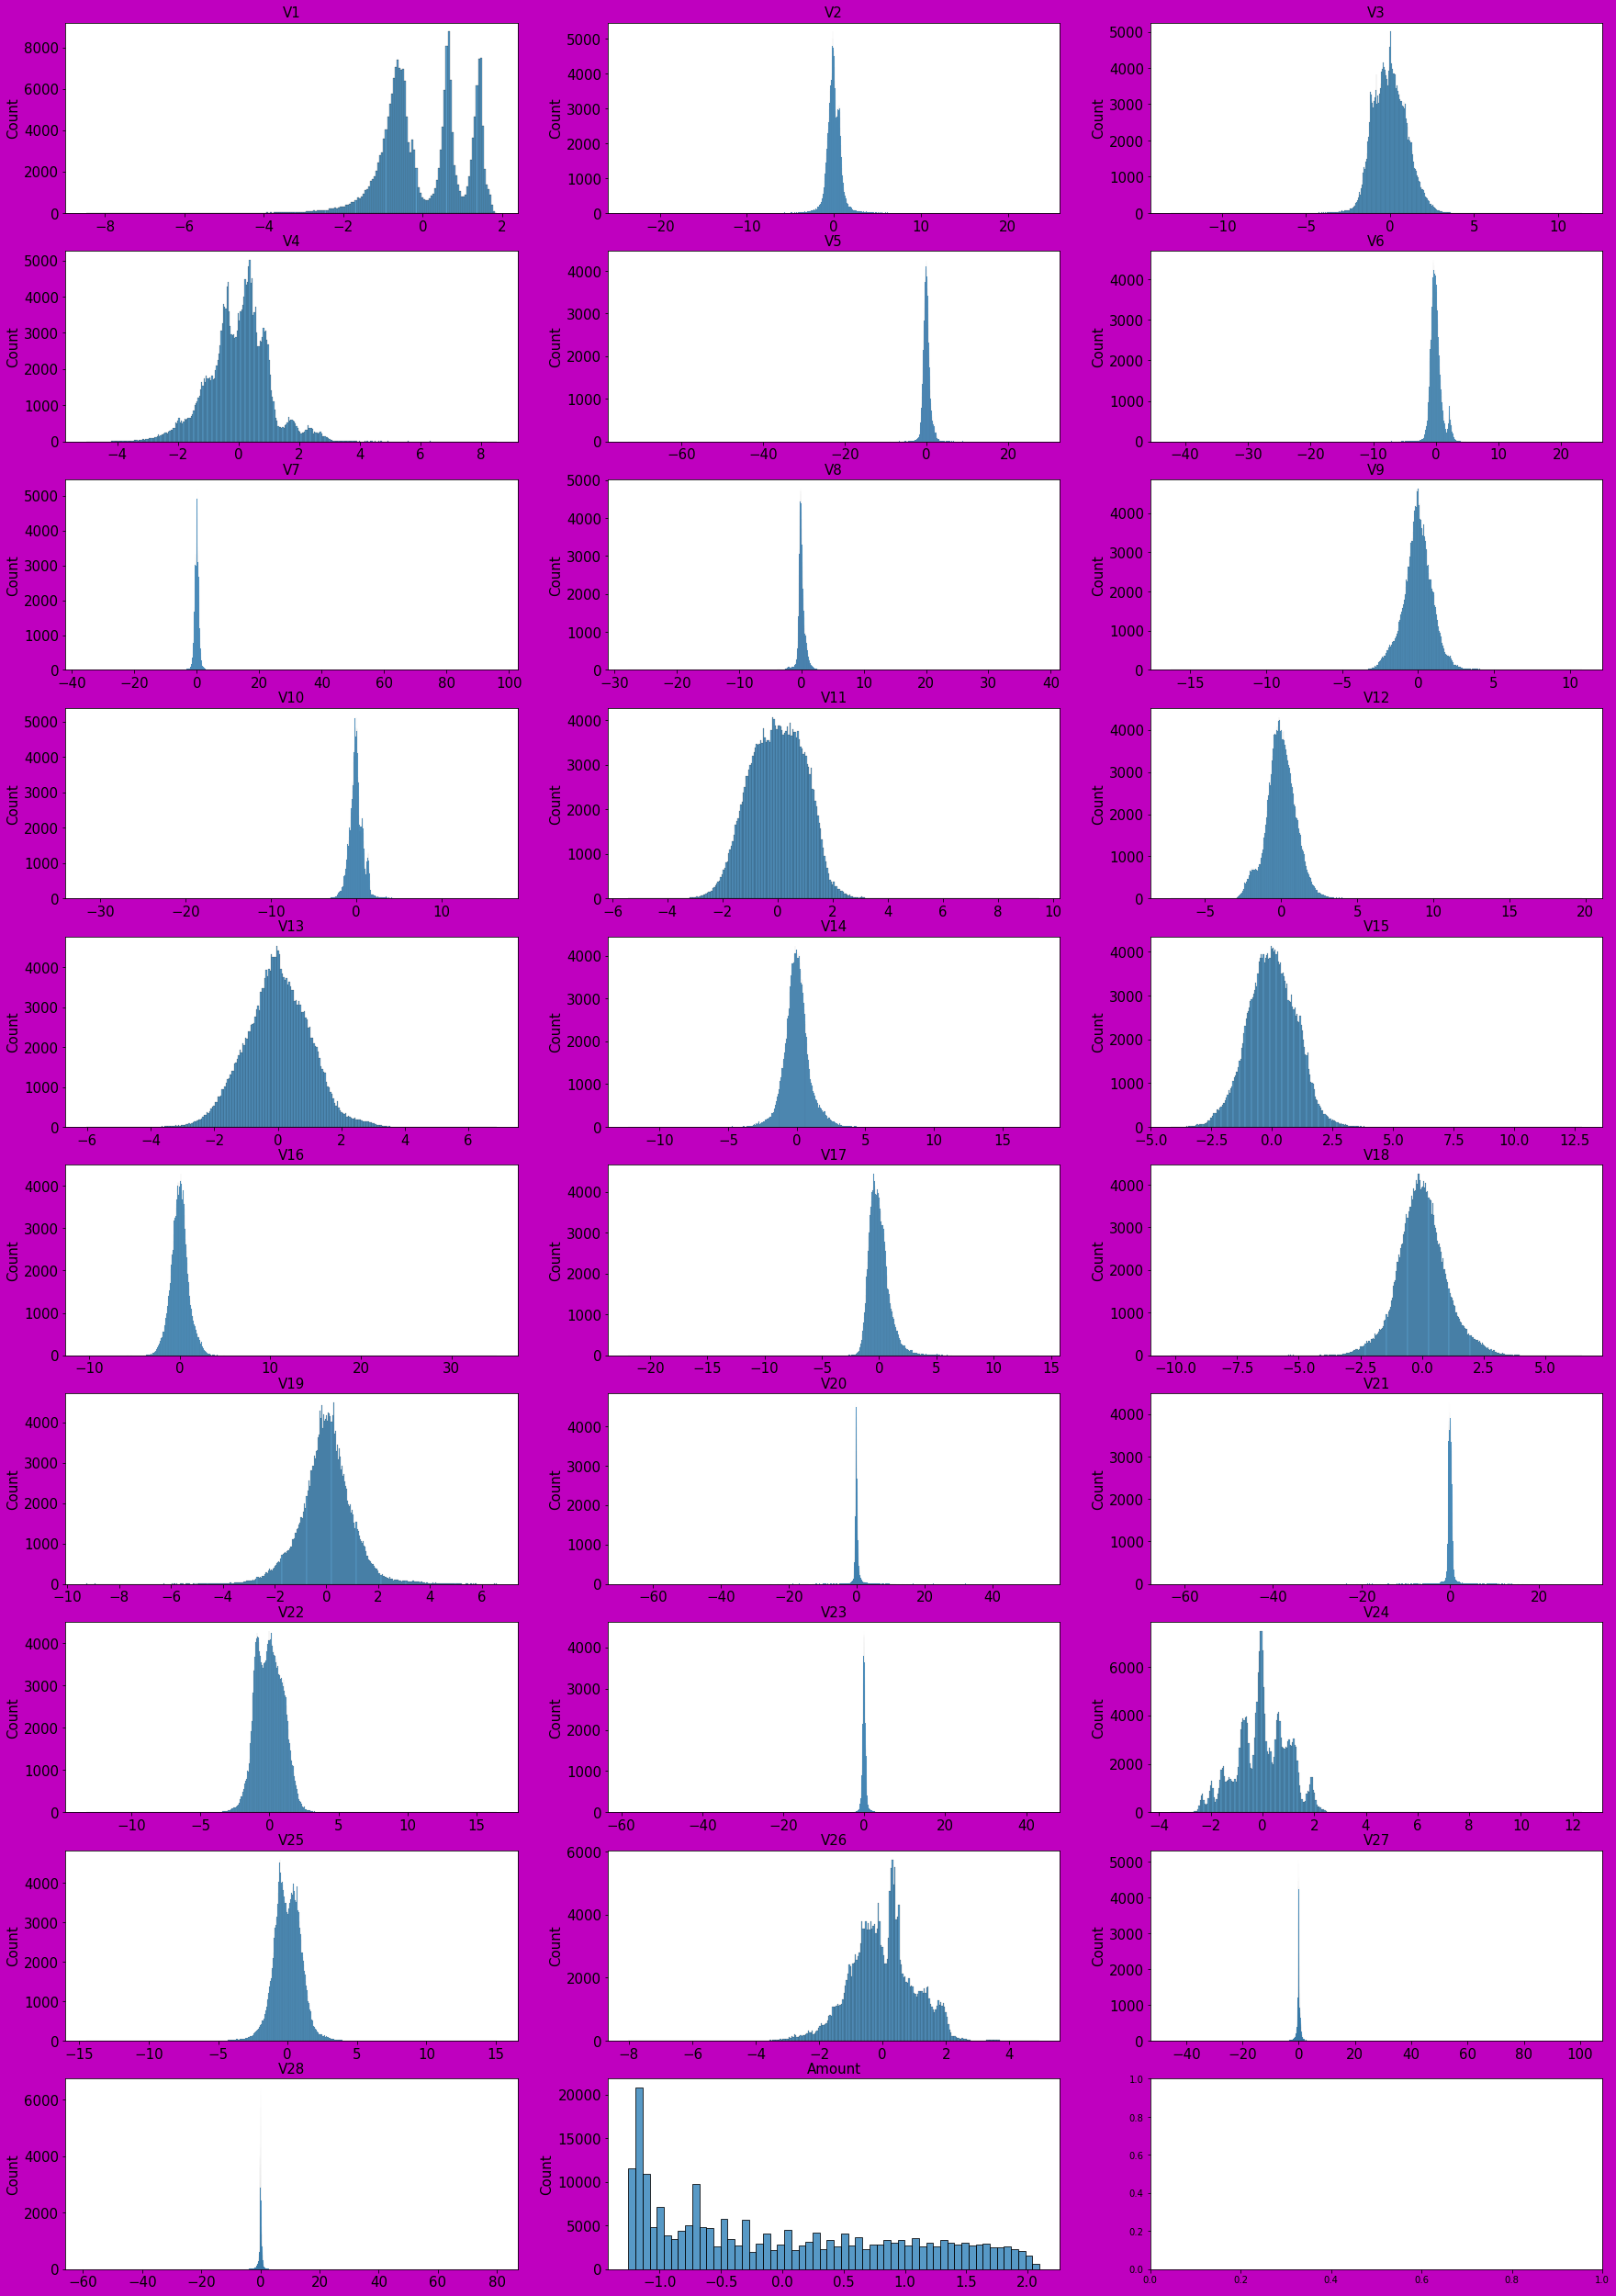

In [ ]:
# Plot the histogram of a variable from the train dataset again to see the result after application of the PowerTransformer

# Create a list of all column names in the transformed training dataset
var = list(X_train.columns.values)

# Create a figure with 30 subplots (10 rows, 3 columns), with specified size and background color
fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate over each feature and corresponding subplot axis
for i, ax in enumerate(axes):
    if i < len(var):
        sns.histplot(X_train[var[i]], ax=ax)  # Plot the histogram for the feature
        ax.set_title(var[i], fontsize=15)  # Add a title to the subplot
        ax.set_ylabel("Count", fontsize=15)  # Label the y-axis
        ax.tick_params(axis='both', labelsize=15)  # Set the tick parameters for both axes
        ax.set_xlabel('')  # Remove the x-axis label for cleaner appearance

# Display the plots
plt.show()

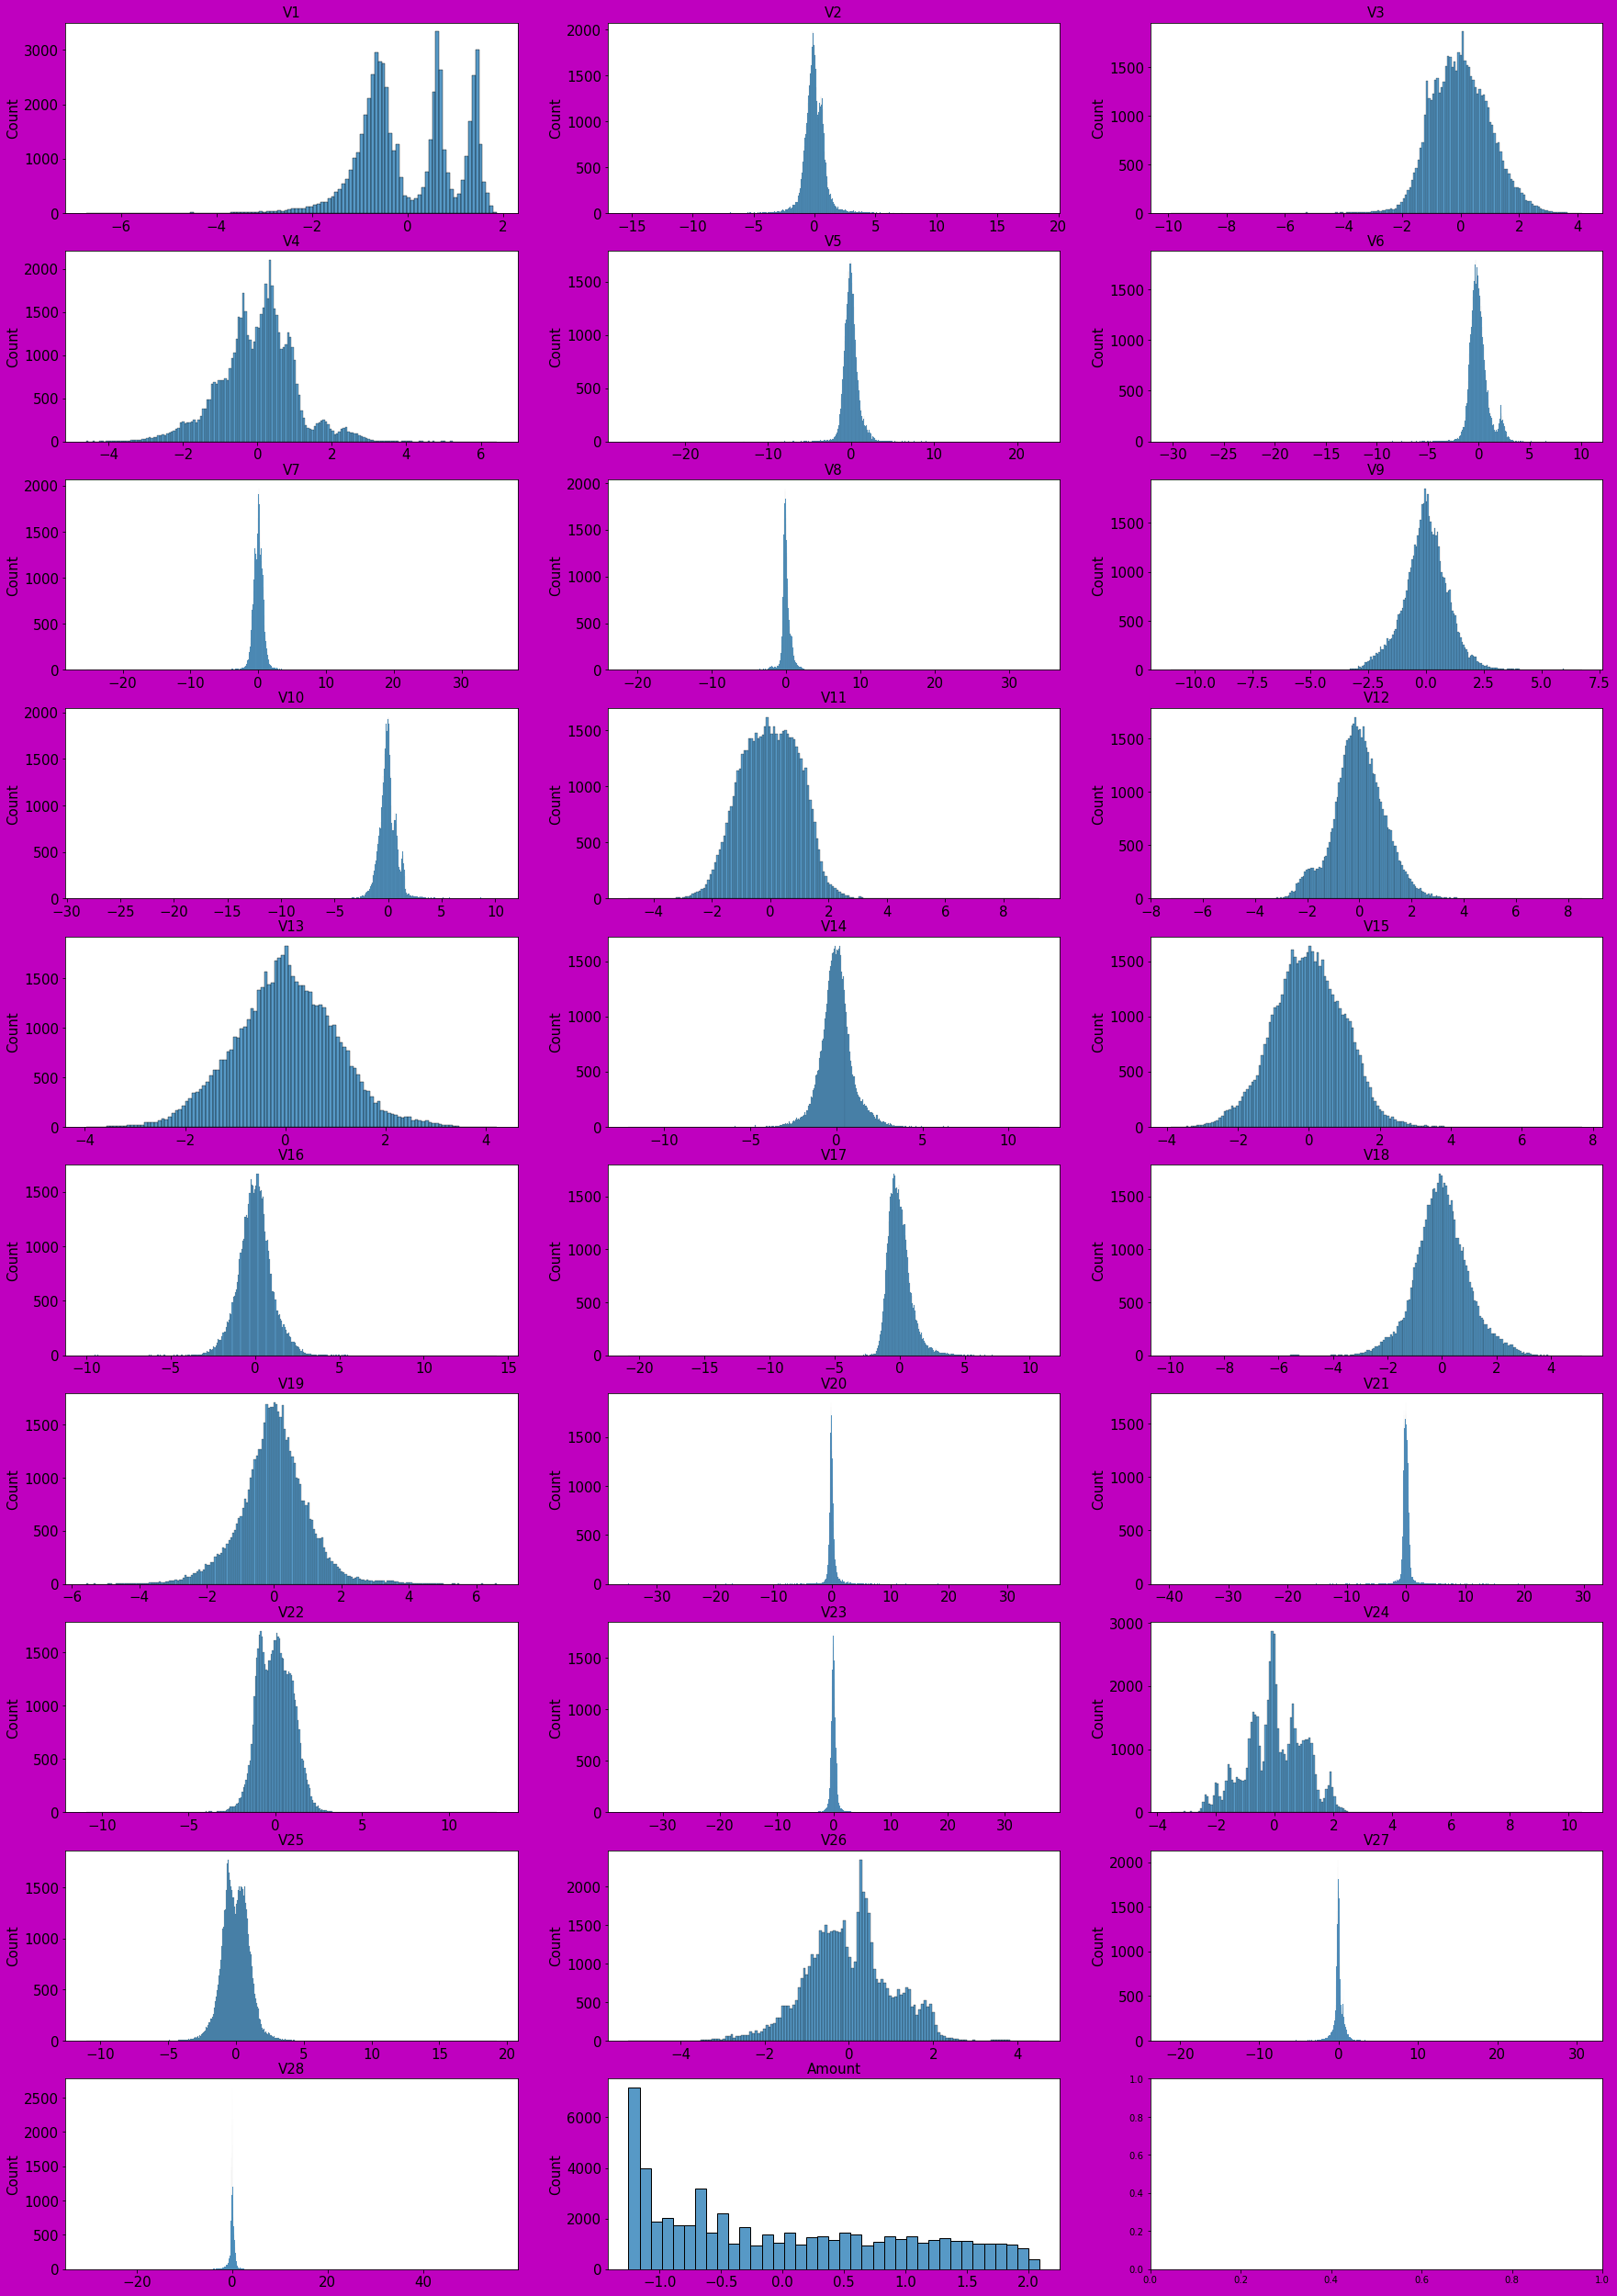

In [ ]:
# Plot the histogram of a variable from the test dataset again to see the result after application of the PowerTransformer

# Create a list of all column names in the transformed test dataset
var = list(X_test.columns.values)

# Create a figure with 30 subplots (10 rows, 3 columns), with specified size and background color
fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate over each feature and corresponding subplot axis
for i, ax in enumerate(axes):
    if i < len(var):
        sns.histplot(X_test[var[i]], ax=ax)  # Plot the histogram for the feature
        ax.set_title(var[i], fontsize=15)  # Add a title to the subplot
        ax.set_ylabel("Count", fontsize=15)  # Label the y-axis
        ax.tick_params(axis='both', labelsize=15)  # Set the tick parameters for both axes
        ax.set_xlabel('')  # Remove the x-axis label for cleaner appearance

# Display the plots
plt.show()


## Model Building with imbalanced data
- Build different models on the imbalanced dataset and see the result

### Defining model functions for
1. Logistic regression
2. KNN
3. SVM
4. Decision Tree
5. Random Forest
6. XGBoost

In [ ]:
# A dataframe to store all model results in place for better overview
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling','Model','Accuracy','Roc_Value','Threshold'])

In [ ]:
# Function to plot confusion matrix
def Plot_confusion_matrix(y_test, y_test_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Clear the plot
    plt.clf()

    # Set the figure size
    plt.rcParams["figure.figsize"] = (5,5)

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)

    # Define class names
    classNames = ['Non-Fraudulent', 'Fraudulent']

    # Add title and labels
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Set ticks
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    # Add text annotations
    labels = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, f'{labels[i][j]} = {cm[i][j]}', fontsize=10, ha='center', va='center')

    # Show the plot
    plt.show()


In [ ]:
# ROC Curve function

def draw_roc(actual, probs):
    # Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)

    # Calculate the Area Under the Curve (AUC) score
    auc_score = metrics.roc_auc_score(actual, probs)

    # Determine the optimal threshold by maximizing the difference between TPR and FPR
    threshold = thresholds[np.argmax(tpr - fpr)]

    # Print the AUC score and the optimal threshold
    print("-" * 100)
    print("ROC       :", '{:.1%}'.format(auc_score))
    print("Threshold :", threshold)
    print("-" * 100)

    # Set the size of the plot
    plt.rcParams["figure.figsize"] = (5, 5)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)

    # Plot the diagonal line (no skill line)
    plt.plot([0, 1], [0, 1], 'k--')

    # Set the x and y axis limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # Set the x and y axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set the title of the plot
    plt.title('ROC AUC - Test Data')

    # Add a legend to the plot
    plt.legend(loc=4)

    # Display the plot
    plt.show()

    # Return the AUC score and the optimal threshold
    return auc_score, threshold


 Defining Logistic Regression with L1 Regularization

In [ ]:
def LogisticRegressionWithL1PipeLine(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Generate a list of values for the regularization parameter 'C'
    num_C = list(np.power(10.0, np.arange(-10, 10)))

    # Set up cross-validation with 5 folds, shuffling the data, and using a fixed random state
    cv_num = KFold(n_splits=5, shuffle=True, random_state=42)

    # Set up Logistic Regression with L1 regularization using cross-validation
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    # Fit the model to the training data
    searchCV_l1.fit(X_train, y_train)

    # Print the maximum AUC ROC score for L1 regularization
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print("-" * 100)

    # Print the parameters for L1 regularization
    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    # Find the predicted values for the test set
    y_pred_l1 = searchCV_l1.predict(X_test)

    # Find the predicted probabilities for the test set
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:, 1]

    # Calculate the accuracy of the model
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
    print("-" * 100)
    print("Accuracy of Logistic model with L1 regularisation: {0}".format(Accuracy_l1))
    print("-" * 100)

    # Print the confusion matrix
    print("\nConfusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)

    # Print the classification report
    print("\nClassification Report")
    print("-" * 100)
    print(classification_report(y_test, y_pred_l1))

    # Generate the ROC curve and find the ROC value and threshold
    l1_roc_value, threshold = draw_roc(y_test, y_pred_probs_l1)

    # Append the results to the DataFrame
    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'Logistic Regression with L1 Regularisation',
        'Accuracy': Accuracy_l1,
        'Roc_Value': l1_roc_value,
        'Threshold': threshold
    }, index=[0])], ignore_index=True)

    # Return the updated DataFrame with results
    return df_Results


Defining Logistic Regression with L2 Regularization

In [ ]:
def LogisticRegressionWithL2PipeLine(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Generate a list of values for the regularization parameter 'C'
    num_C = list(np.power(10.0, np.arange(-10, 10)))

    # Set up cross-validation with 5 folds, shuffling the data, and using a fixed random state
    cv_num = KFold(n_splits=5, shuffle=True, random_state=42)

    # Set up Logistic Regression with L2 regularization using cross-validation
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    # Fit the model to the training data
    searchCV_l2.fit(X_train, y_train)

    # Print the maximum AUC ROC score for L2 regularization
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    print("-" * 100)

    # Print the parameters for L2 regularization
    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    # Find the predicted values for the test set
    y_pred_l2 = searchCV_l2.predict(X_test)

    # Find the predicted probabilities for the test set
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:, 1]

    # Calculate the accuracy of the model
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    print("-" * 100)
    print("Accuracy of Logistic model with l2 regularisation: {0}".format(Accuracy_l2))
    print("-" * 100)

    # Print the confusion matrix
    print("\nConfusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)

    # Print the classification report
    print("\nClassification Report")
    print("-" * 100)
    print(classification_report(y_test, y_pred_l2))

    # Generate the ROC curve and find the ROC value and threshold
    l2_roc_value, threshold = draw_roc(y_test, y_pred_probs_l2)

    # Append the results to the DataFrame
    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'Logistic Regression with L2 Regularisation',
        'Accuracy': Accuracy_l2,
        'Roc_Value': l2_roc_value,
        'Threshold': threshold
    }, index=[0])], ignore_index=True)

    # Return the updated DataFrame with results
    return df_Results


Defining KNN

In [ ]:
def KNNPipeLine(df_Results, DataImbalance, X_train, y_train, X_test, y_test):

    # Create KNN model and fit the model with the training dataset
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=2)
    knn.fit(X_train, y_train)

    # Predict the labels for the test dataset
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the KNN model
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Accuracy of KNN model: {0}".format(KNN_Accuracy))
    print("-" * 100)

    # Print the confusion matrix
    print("\nConfusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)

    # Print the classification report
    print("\nClassification Report")
    print("-" * 100)
    print(classification_report(y_test, y_pred))

    # Find the predicted probabilities for the test dataset
    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC value and threshold using the ROC curve
    knn_roc_value, threshold = draw_roc(y_test, knn_probs)

    # Append the results to the DataFrame
    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'KNN',
        'Accuracy': KNN_Accuracy,
        'Roc_Value': knn_roc_value,
        'Threshold': threshold
    }, index=[0])], ignore_index=True)

    # Return the updated DataFrame with results
    return df_Results


Defining SVM Model

In [ ]:
def SVMPipeLine(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Initialize SVM model with sigmoid kernel and specified random state
    SVModel = SVC(kernel='sigmoid', random_state=42, probability=True)

    # Fit the model on the training data
    SVModel.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred_SVM = SVModel.predict(X_test)

    # Calculate accuracy score for the predictions
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("SVM Accuracy Score: {0}".format(SVM_Score))
    print("-" * 100)

    # Print confusion matrix for the predictions
    print("\nConfusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)

    # Print classification report for the predictions
    print("\nClassification Report")
    print("-" * 100)
    print(classification_report(y_test, y_pred_SVM))

    # Calculate ROC AUC value and threshold using the predicted probabilities
    svm_probs = SVModel.predict_proba(X_test)[:, 1]
    svm_roc_value, threshold = draw_roc(y_test, svm_probs)

    # Update the results dataframe with the new metrics
    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'SVM',
        'Accuracy': SVM_Score,
        'Roc_Value': svm_roc_value,
        'Threshold': threshold
    }, index=[0])], ignore_index=True)

    return df_Results

Defining Decision Tree

In [ ]:
def DecisionTreePipeLine(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Evaluate Decision Tree model with 'gini' and 'entropy' criteria
    criteria = ['gini', 'entropy']
    scores = {}

    for c in criteria:
        # Initialize Decision Tree model with the specified criterion
        dt = DecisionTreeClassifier(criterion=c, random_state=42)

        # Fit the model on the training data
        dt.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = dt.predict(X_test)

        # Calculate the accuracy score for the predictions
        test_score = dt.score(X_test, y_test)

        # Predict probabilities for the test data
        tree_preds = dt.predict_proba(X_test)[:, 1]

        # Print the accuracy score for the current criterion
        print('Decision Tree with ' + c + " Accuracy: {0}".format(test_score))
        print("-" * 100)

        # Print the confusion matrix for the predictions
        print("\nConfusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)

        # Print the classification report for the predictions
        print("\nClassification Report")
        print("-" * 100)
        print(classification_report(y_test, y_pred))

        # Calculate the ROC AUC value and threshold using the predicted probabilities
        tree_roc_value, threshold = draw_roc(y_test, tree_preds)

        # Update the results dataframe with the new metrics
        df_Results = pd.concat([df_Results, pd.DataFrame({
            'Data_Imbalance_Handling': DataImbalance,
            'Model': 'Tree Model with {0} criteria'.format(c),
            'Accuracy': test_score,
            'Roc_Value': tree_roc_value,
            'Threshold': threshold
        }, index=[0])], ignore_index=True)

    return df_Results


Defining Random Forest

In [ ]:
def RandomForestPipeLine(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Initialize the Random Forest model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100,
                                      bootstrap=True,
                                      max_features='sqrt',
                                      n_jobs= -1,
                                      random_state=42)

    # Fit the model on the training data
    RF_model.fit(X_train, y_train)
    # Score the model on the test data
    RF_test_score = RF_model.score(X_test, y_test)
    print('Random Forest Model Accuracy: {0}'.format(RF_test_score))
    print("-" * 100)

    # Make predictions on the test data
    rf_predictions = RF_model.predict(X_test)
    print("\nConfusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("\nClassification Report")
    print("-" * 100)
    print(classification_report(y_test, rf_predictions))

    # Get probability scores for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate the ROC AUC score and threshold
    rf_roc_value, threshold = draw_roc(y_test, rf_probs)

    # Append results to the dataframe
    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'Random Forest',
        'Accuracy': RF_test_score,
        'Roc_Value': rf_roc_value,
        'Threshold': threshold
    }, index=[0])], ignore_index=True)

    # Return the updated results dataframe
    return df_Results

Defining XGBoost

In [ ]:
def XGBoostPipeLine(df_Results, DataImbalance, X_train, y_train, X_test, y_test):
    # Initialize the XGBoost model with a fixed random state for reproducibility
    XGBmodel = XGBClassifier(random_state=42)

    # Fit the model on the training data
    XGBmodel.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = XGBmodel.predict(X_test)

    # Calculate and print the model's accuracy score on the test data
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('XGBoost Model Accuracy: {0}'.format(XGB_test_score))
    print("-" * 100)

    # Print and plot the confusion matrix
    print("\nConfusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)

    # Print the classification report
    print("\nClassification Report")
    print("-" * 100)
    print(classification_report(y_test, y_pred))

    # Calculate the probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate and plot the ROC curve and get the ROC AUC value and threshold
    XGB_roc_value, threshold = draw_roc(y_test, XGB_probs)

    # Append the results to the DataFrame 'df_Results'
    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': DataImbalance,
        'Model': 'XGBoost',
        'Accuracy': XGB_test_score,
        'Roc_Value': XGB_roc_value,
        'Threshold': threshold
        }, index=[0])], ignore_index=True)

    # Return the updated DataFrame with results
    return df_Results


Executing all model pipelines on the imbalanced data

Logistic Regression with L1 Regularisation
Max auc_roc for l1: 0.982137583405307
----------------------------------------------------------------------------------------------------
Parameters for l1 regularisations
[[-0.0964569   0.09976204 -0.24260125  0.4664827   0.05281573 -0.02343027
  -0.07240991 -0.22748018 -0.11403928 -0.22206224  0.33235362 -0.32382835
  -0.04967742 -0.44982431 -0.05947625 -0.09767424 -0.14601512 -0.02070568
  -0.07787326 -0.01316208  0.04628624  0.0591106  -0.05091674 -0.02223569
   0.00481324  0.00403166 -0.00561563 -0.01003909  0.07921435]]
[-6.82975681]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.91651218, 0.96402374, 0.9694732 ,
        0.97024306, 0.96865066, 0.98044775, 0.98192541, 0.97467509,
        0.97190107, 0.96431074, 0.96846385, 0.97027053, 0.9730397 ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.89882086, 0.95214703, 0.9578265

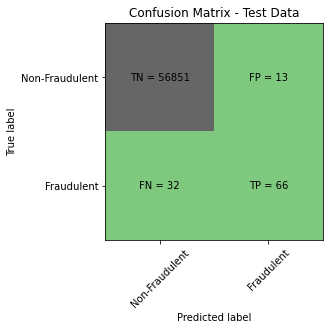


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.67      0.75        98

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 97.9%
Threshold : 0.0038105257462381975
----------------------------------------------------------------------------------------------------


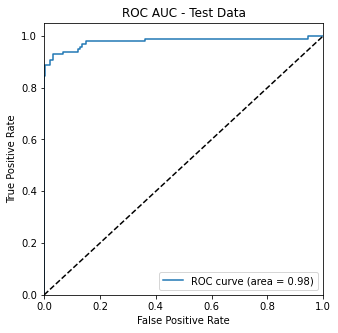

Time Taken by Model: --- 38.04533004760742 seconds ---


In [ ]:
#Logistic Regression with L1 Regularisation for Imbalanced data
print("Logistic Regression with L1 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL1PipeLine(df_Results,"Power Transformer",X_train,y_train, X_test, y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


Logistic Regression with L2 Regularisation
Max auc_roc for l2: 0.9763398051512207
----------------------------------------------------------------------------------------------------
Parameters for l2 regularisations
[[-0.05599532  0.05631822 -0.14033634  0.14246952 -0.02370914 -0.03462233
  -0.10482192 -0.04737221 -0.08138432 -0.18218466  0.13927257 -0.18829951
  -0.00930555 -0.25737344 -0.01448339 -0.11530598 -0.15062979 -0.03947381
   0.00241579  0.0009305   0.02766186  0.01025271 -0.00893597 -0.01682219
  -0.00154968  0.00393785  0.00348536  0.00527874  0.00843236]]
[-5.13727784]
{1: array([[0.91660914, 0.91660914, 0.91660914, 0.91660914, 0.91660914,
        0.91660914, 0.93950327, 0.96587147, 0.96955238, 0.96959731,
        0.96959989, 0.96960054, 0.96960054, 0.96960054, 0.96960054,
        0.96960054, 0.96960054, 0.96960054, 0.96960054, 0.96960054],
       [0.85946784, 0.85946784, 0.85946784, 0.85946784, 0.85946784,
        0.85946784, 0.88804512, 0.94135205, 0.95520645, 0.955574

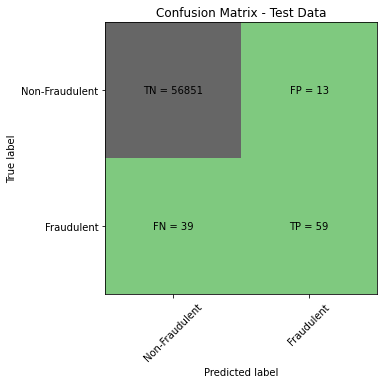


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.60      0.69        98

    accuracy                           1.00     56962
   macro avg       0.91      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 97.4%
Threshold : 0.01189666689886668
----------------------------------------------------------------------------------------------------


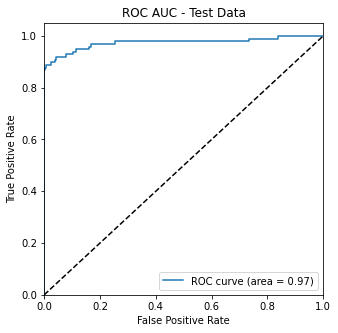

Time Taken by Model: --- 28.887297868728638 seconds ---


In [ ]:
#Logistic Regression with L2 Regularisation for Imbalanced data
print("Logistic Regression with L2 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL2PipeLine(df_Results,"Power Transformer",X_train,y_train, X_test, y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


KNN Model
Accuracy of KNN model: 0.9994733330992591
----------------------------------------------------------------------------------------------------

Confusion Matrix


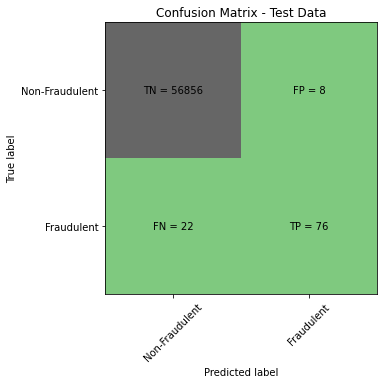


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 94.9%
Threshold : 0.2
----------------------------------------------------------------------------------------------------


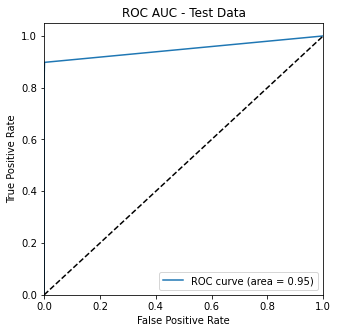

Time Taken by Model: --- 42.77603888511658 seconds ---


In [ ]:
# KNN Model for Imbalanced data
print("KNN Model")
print('='*100 )
start_time = time.time()
df_Results = KNNPipeLine(df_Results,"Power Transformer",X_train,y_train, X_test, y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

SVM Model with Sigmoid Kernel
SVM Accuracy Score: 0.9982795547909132
----------------------------------------------------------------------------------------------------

Confusion Matrix


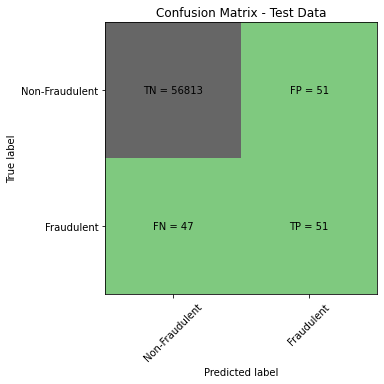


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.50      0.52      0.51        98

    accuracy                           1.00     56962
   macro avg       0.75      0.76      0.75     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 69.8%
Threshold : 0.006919755536844907
----------------------------------------------------------------------------------------------------


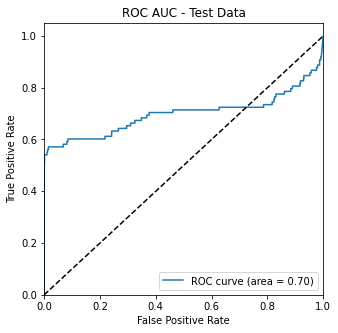

Time Taken by Model: --- 103.23597168922424 seconds ---


In [ ]:
#SVM Model with Sigmoid Kernel for Imbalanced data
print("SVM Model with Sigmoid Kernel")
print('='*100 )
start_time = time.time()
df_Results = SVMPipeLine(df_Results,"Power Transformer",X_train,y_train,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
Decision Tree with gini Accuracy: 0.9991573329588147
----------------------------------------------------------------------------------------------------

Confusion Matrix


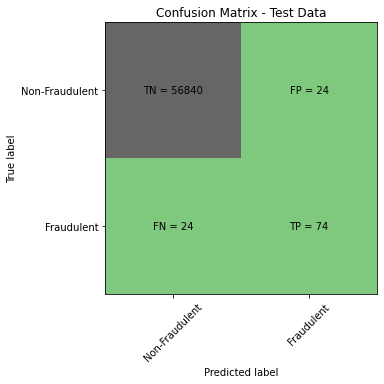


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.76      0.76        98

    accuracy                           1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 87.7%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


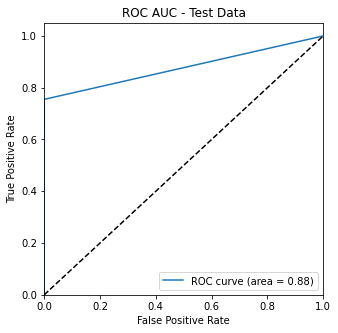

Decision Tree with entropy Accuracy: 0.9992977774656788
----------------------------------------------------------------------------------------------------

Confusion Matrix


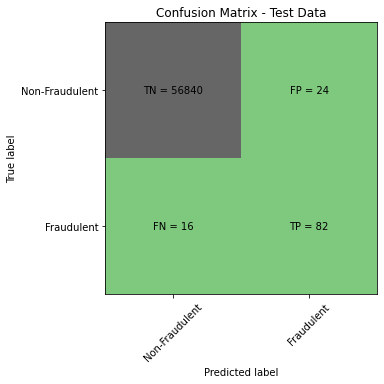


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 91.8%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


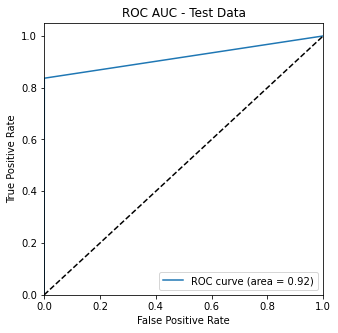

Time Taken by Model: --- 44.47375440597534 seconds ---


In [ ]:
# Decision Tree Models with  'gini' & 'entropy' criteria for Imbalanced data
print("Decision Tree Models with  'gini' & 'entropy' criteria")
print('='*100 )
start_time = time.time()
df_Results = DecisionTreePipeLine(df_Results,"Power Transformer",X_train,y_train,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Random Forest Model Accuracy: 0.9996137776061234
----------------------------------------------------------------------------------------------------

Confusion Matrix


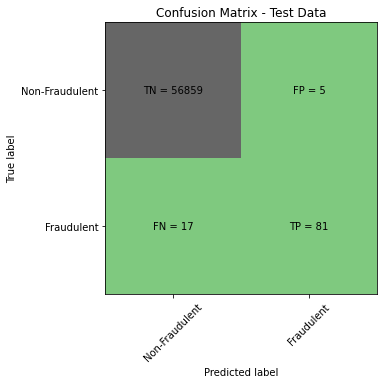


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 95.3%
Threshold : 0.03
----------------------------------------------------------------------------------------------------


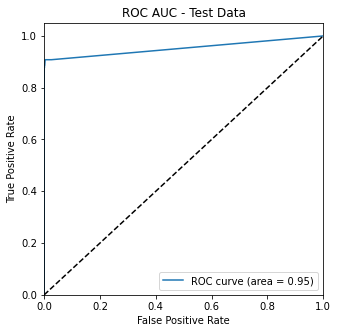

Time Taken by Model: --- 57.54589915275574 seconds ---


In [ ]:
# Random Forest Model for Imbalanced data
print("Random Forest Model")
print('='*100 )
start_time = time.time()
df_Results = RandomForestPipeLine(df_Results,"Power Transformer",X_train,y_train,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[08:36:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy: 0.9995611109160493
----------------------------------------------------------------------------------------------------

Confusion Matrix


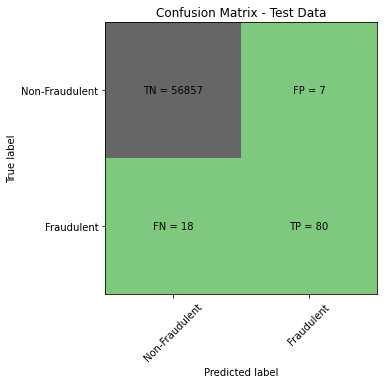


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 96.9%
Threshold : 0.00017938355
----------------------------------------------------------------------------------------------------


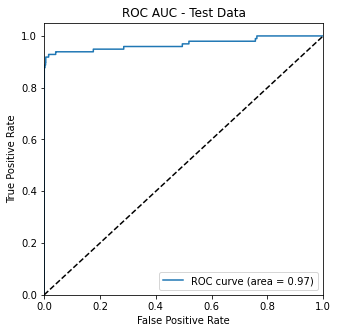

Time Taken by Model: --- 28.124215364456177 seconds ---


In [ ]:
# XGBoost Model for Imbalanced data
print("XGBoost Model")
print('='*100 )
start_time = time.time()
df_Results = XGBoostPipeLine(df_Results,"Power Transformer",X_train,y_train,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Checking all the results created so far
df_Results

Data_Imbalance_Handling                                       Model  \
0       Power Transformer  Logistic Regression with L1 Regularisation   
1       Power Transformer  Logistic Regression with L2 Regularisation   
2       Power Transformer                                         KNN   
3       Power Transformer                                         SVM   
4       Power Transformer               Tree Model with gini criteria   
5       Power Transformer            Tree Model with entropy criteria   
6       Power Transformer                               Random Forest   
7       Power Transformer                                     XGBoost   

   Accuracy  Roc_Value  Threshold  
0  0.999210   0.979259   0.003811  
1  0.999087   0.973701   0.011897  
2  0.999473   0.948860   0.200000  
3  0.998280   0.698193   0.006920  
4  0.999157   0.877340   1.000000  
5  0.999298   0.918156   1.000000  
6  0.999614   0.952811   0.030000  
7  0.999561   0.968647   0.000179

In [ ]:
# Sorting the results of all model on imbalanced data where we applied power transformer
df_Results[df_Results['Data_Imbalance_Handling']=='Power Transformer'].sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling                                       Model  \
0       Power Transformer  Logistic Regression with L1 Regularisation   
1       Power Transformer  Logistic Regression with L2 Regularisation   
7       Power Transformer                                     XGBoost   
6       Power Transformer                               Random Forest   
2       Power Transformer                                         KNN   
5       Power Transformer            Tree Model with entropy criteria   
4       Power Transformer               Tree Model with gini criteria   
3       Power Transformer                                         SVM   

   Accuracy  Roc_Value  Threshold  
0  0.999210   0.979259   0.003811  
1  0.999087   0.973701   0.011897  
7  0.999561   0.968647   0.000179  
6  0.999614   0.952811   0.030000  
2  0.999473   0.948860   0.200000  
5  0.999298   0.918156   1.000000  
4  0.999157   0.877340   1.000000  
3  0.998280   0.698193   0.006920

### <font color='blue'>Observation</font> : Logistic Regression with L1 and L2 show best Roc value.

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

### Perform cross validation with RepeatedKFold

In [ ]:
# Let's perform RepeatedKFold and check the results

# Initialize RepeatedKFold with 5 splits and 10 repeats
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

# X is the feature set and y is the target
for train_index, test_index in rkf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field which is in its raw form.
# Scaling the train data
X_train_cv[["Amount"]] = scaler.fit_transform(X_train_cv[["Amount"]])

# Transforming the test data
X_test_cv[["Amount"]] = scaler.transform(X_test_cv[["Amount"]])

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    10     12     20 ... 284791 284796 284801]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     9     30     32 ... 284782 284785 284805]
TRAIN: [     0      2      4 ... 284802 284804 284805] TEST: [     1      3     15 ... 284797 284803 284806]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     5      6     19 ... 284800 284802 284804]
TRAIN: [     1      3      5 ... 284804 284805 284806] TEST: [     0      2      4 ... 284792 284798 284799]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     5     11     18 ... 284772 284791 284806]
TRAIN: [     0      1      3 ... 284803 284805 284806] TEST: [     2      9     10 ... 284797 284801 284804]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     7     12     21 ... 284793 284798 284805]
TRAIN: [     1      2      5 ... 284804 284805 284806] TEST: [     0      3      4 ... 284790 284802 284803]
TRAIN: [     0     

In [ ]:
X_train_cv.shape,X_test_cv.shape

((227846, 29), (56961, 29))

In [ ]:
# Checking the split of the class label in term of percentage
print("Fraudulent Percentage for Train data : ",np.sum(y_train_cv)/len(y_train_cv)*100)
print("Fraudulent Percentage for Test data  : ",np.sum(y_test_cv)/len(y_test_cv)*100)

Fraudulent Percentage for Train data :  0.17160713815471854
Fraudulent Percentage for Test data  :  0.17731430276856094


### <font color='blue'>Observation</font> : The distribution is similar to original data set.

Logistic Regression with L1 Regularisation
Max auc_roc for l1: 0.9776183779020545
----------------------------------------------------------------------------------------------------
Parameters for l1 regularisations
[[-0.07052049 -0.1697978  -0.09939916  0.13377936 -0.18262198  0.08616815
   0.16446442 -0.10780389 -0.10824383 -0.16688585  0.11955815 -0.16763797
  -0.03051454 -0.21858227 -0.01984662 -0.13998269 -0.12424727  0.01112826
  -0.03950955  0.38136449  0.12524872 -0.02207165 -0.00867609 -0.02352024
  -0.03346015  0.0154102  -0.004153    0.08260624 -0.23149754]]
[-4.91376904]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.92650527, 0.91729389, 0.89109289,
        0.93333896, 0.91442491, 0.93109076, 0.915954  , 0.94001492,
        0.90832636, 0.90398087, 0.94398943, 0.93880038, 0.95527673],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.97422991, 0.9866641 , 0.961005

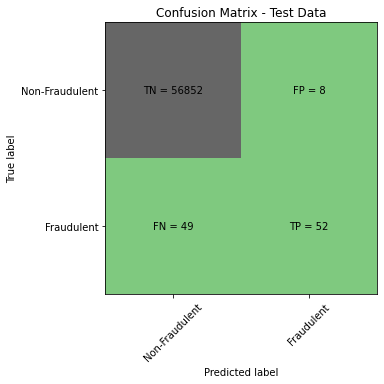


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.87      0.51      0.65       101

    accuracy                           1.00     56961
   macro avg       0.93      0.76      0.82     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
ROC       : 97.2%
Threshold : 0.013335187191236608
----------------------------------------------------------------------------------------------------


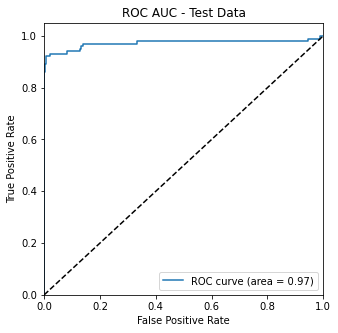

Time Taken by Model: --- 35.61073541641235 seconds ---


In [ ]:
# Logistic Regression with L1 Regularisation for RepeatedKFold Imbalanced Data
print("Logistic Regression with L1 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL1PipeLine(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Logistic Regression with L2 Regularisation
Max auc_roc for l2: 0.9350815030218758
----------------------------------------------------------------------------------------------------
Parameters for l2 regularisations
[[-0.02467727 -0.329922   -0.17135728  0.14177407 -0.38916971  0.23941547
   0.44013092 -0.15261293 -0.15217473 -0.27974737  0.09108012 -0.20151132
  -0.03019848 -0.22827477 -0.03940346 -0.14709206 -0.13803061  0.04490439
  -0.0632981   0.60266223  0.22363818 -0.03957493  0.12318152 -0.02233048
  -0.02345979  0.00309892  0.01230386  0.01590352 -0.39606944]]
[-4.77123918]
{1: array([[0.75651943, 0.75651943, 0.75651943, 0.76393381, 0.7952493 ,
        0.83584093, 0.84115889, 0.89352583, 0.90431294, 0.90333454,
        0.90336335, 0.90336068, 0.90336038, 0.90336008, 0.90336008,
        0.90336008, 0.90336008, 0.90336008, 0.90336008, 0.90336008],
       [0.81451077, 0.81451077, 0.81451077, 0.8195575 , 0.8323803 ,
        0.85481229, 0.90368845, 0.93260705, 0.94400735, 0.945655

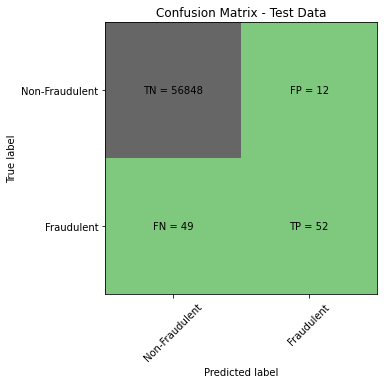


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.81      0.51      0.63       101

    accuracy                           1.00     56961
   macro avg       0.91      0.76      0.81     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
ROC       : 95.2%
Threshold : 0.011349378204996602
----------------------------------------------------------------------------------------------------


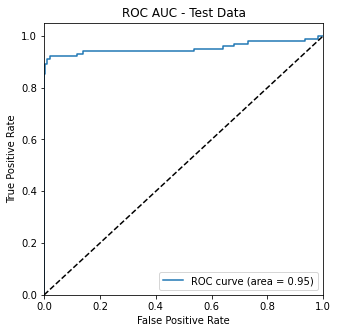

Time Taken by Model: --- 42.04056787490845 seconds ---


In [ ]:
# Logistic Regression with L2 Regularisation for RepeatedKFold Imbalanced Data
print("Logistic Regression with L2 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL2PipeLine(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

KNN Model
Accuracy of KNN model: 0.9995962149540913
----------------------------------------------------------------------------------------------------

Confusion Matrix


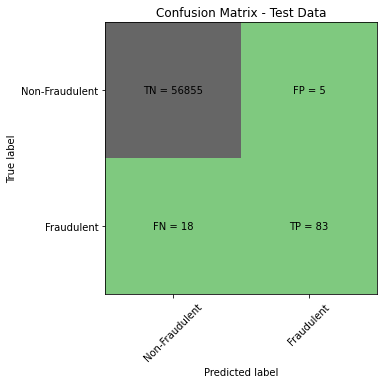


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.94      0.82      0.88       101

    accuracy                           1.00     56961
   macro avg       0.97      0.91      0.94     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
ROC       : 95.0%
Threshold : 0.2
----------------------------------------------------------------------------------------------------


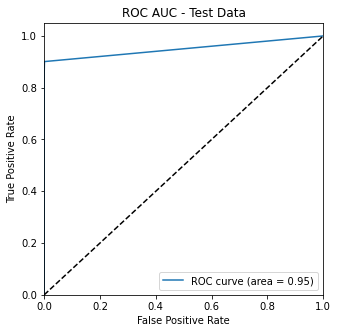

Time Taken by Model: --- 42.75857472419739 seconds ---


In [ ]:
# KNN Model for RepeatedKFold Imbalanced Data
print("KNN Model")
print('='*100 )
start_time = time.time()
df_Results = KNNPipeLine(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


SVM Model with Sigmoid Kernel
SVM Accuracy Score: 0.9976826249539158
----------------------------------------------------------------------------------------------------

Confusion Matrix


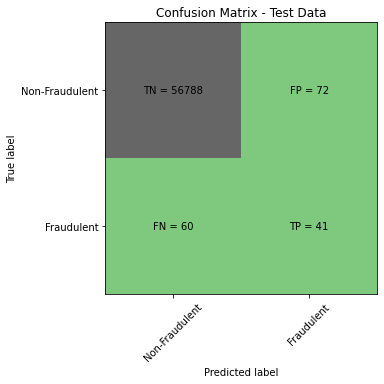


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.36      0.41      0.38       101

    accuracy                           1.00     56961
   macro avg       0.68      0.70      0.69     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
ROC       : 81.2%
Threshold : 0.0021088032465843187
----------------------------------------------------------------------------------------------------


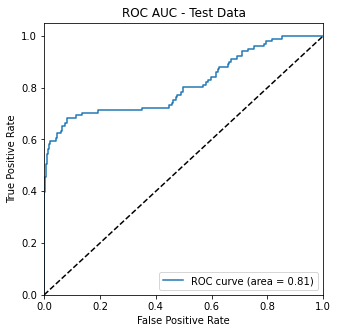

Time Taken by Model: --- 140.64879775047302 seconds ---


In [ ]:
#SVM Model with Sigmoid Kernel  for RepeatedKFold Imbalanced Data
print("SVM Model with Sigmoid Kernel")
print('='*100 )
start_time = time.time()
df_Results = SVMPipeLine(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


Decision Tree Models with  'gini' & 'entropy' criteria
Decision Tree with gini Accuracy: 0.9992275416513052
----------------------------------------------------------------------------------------------------

Confusion Matrix


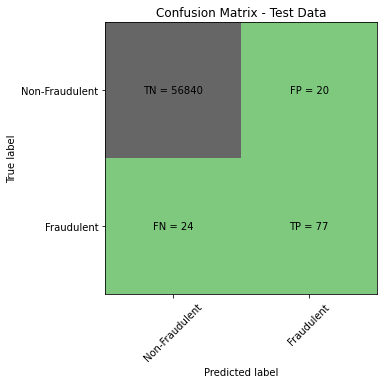


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.79      0.76      0.78       101

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
ROC       : 88.1%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


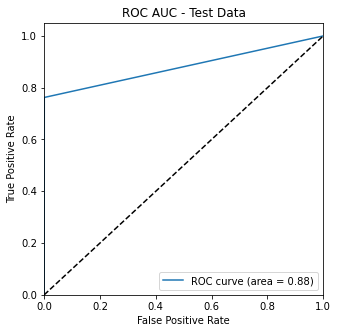

Decision Tree with entropy Accuracy: 0.9990870946788153
----------------------------------------------------------------------------------------------------

Confusion Matrix


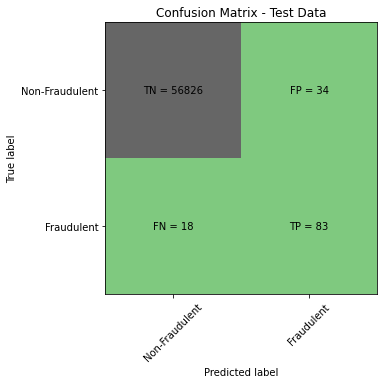


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.71      0.82      0.76       101

    accuracy                           1.00     56961
   macro avg       0.85      0.91      0.88     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
ROC       : 91.1%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


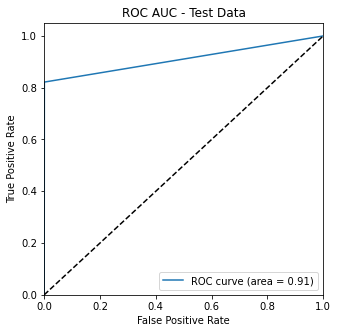

Time Taken by Model: --- 39.15528321266174 seconds ---


In [ ]:
# Decision Tree Models with  'gini' & 'entropy' criteria for RepeatedKFold Imbalanced Data
print("Decision Tree Models with  'gini' & 'entropy' criteria")
print('='*100 )
start_time = time.time()
df_Results = DecisionTreePipeLine(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Random Forest Model Accuracy: 0.9996488825687752
----------------------------------------------------------------------------------------------------

Confusion Matrix


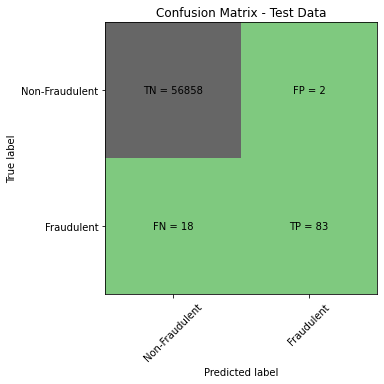


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.98      0.82      0.89       101

    accuracy                           1.00     56961
   macro avg       0.99      0.91      0.95     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
ROC       : 97.9%
Threshold : 0.03
----------------------------------------------------------------------------------------------------


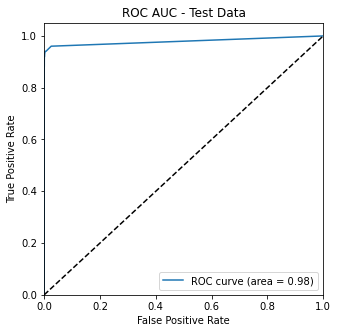

Time Taken by Model: --- 54.11694693565369 seconds ---


In [ ]:
# Random Forest Model for RepeatedKFold Imbalanced Data
print("Random Forest Model")
print('='*100 )
start_time = time.time()
df_Results = RandomForestPipeLine(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


XGBoost Model
[09:17:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy: 0.9996839943118976
----------------------------------------------------------------------------------------------------

Confusion Matrix


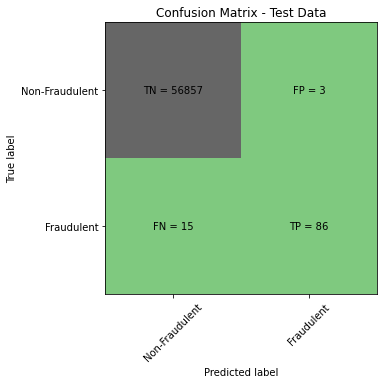


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.97      0.85      0.91       101

    accuracy                           1.00     56961
   macro avg       0.98      0.93      0.95     56961
weighted avg       1.00      1.00      1.00     56961

----------------------------------------------------------------------------------------------------
ROC       : 98.6%
Threshold : 0.0011528125
----------------------------------------------------------------------------------------------------


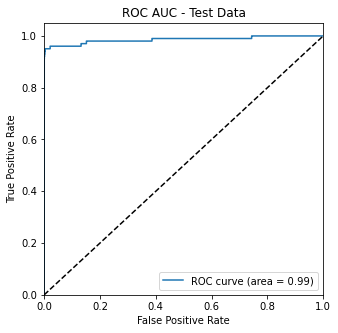

Time Taken by Model: --- 27.627533435821533 seconds ---


In [ ]:
# XGBoost Model for RepeatedKFold Imbalanced Data
print("XGBoost Model")
print('='*100 )
start_time = time.time()
df_Results = XGBoostPipeLine(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


In [ ]:
# Sorting the results of all model on imbalanced data where we applied RepeatedKFold Cross Validation
df_Results[df_Results['Data_Imbalance_Handling']=='RepeatedKFold Cross Validation'].sort_values(by='Roc_Value',ascending=False)


Data_Imbalance_Handling  \
15  RepeatedKFold Cross Validation   
14  RepeatedKFold Cross Validation   
8   RepeatedKFold Cross Validation   
9   RepeatedKFold Cross Validation   
10  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   

                                         Model  Accuracy  Roc_Value  Threshold  
15                                     XGBoost  0.999684   0.985705   0.001153  
14                               Random Forest  0.999649   0.979328   0.030000  
8   Logistic Regression with L1 Regularisation  0.998999   0.972189   0.013335  
9   Logistic Regression with L2 Regularisation  0.998929   0.952232   0.011349  
10                                         KNN  0.999596   0.950415   0.200000  
13            Tree Model with entropy criteria  0.999087   0.910592   1.000000  
12               Tree Model with gini criteria  0.999228   0.881012   1.000000  
11                                         SVM  0.997683   0.812116   0.002109

### <font color='blue'>Observation</font> : On RepeatedKFold cross validation data, XGBoost has the best roc value.


In [ ]:
# Sorting the results of all model done so far
df_Results.sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling  \
15  RepeatedKFold Cross Validation   
14  RepeatedKFold Cross Validation   
0                Power Transformer   
1                Power Transformer   
8   RepeatedKFold Cross Validation   
7                Power Transformer   
6                Power Transformer   
9   RepeatedKFold Cross Validation   
10  RepeatedKFold Cross Validation   
2                Power Transformer   
5                Power Transformer   
13  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
4                Power Transformer   
11  RepeatedKFold Cross Validation   
3                Power Transformer   

                                         Model  Accuracy  Roc_Value  Threshold  
15                                     XGBoost  0.999684   0.985705   0.001153  
14                               Random Forest  0.999649   0.979328   0.030000  
0   Logistic Regression with L1 Regularisation  0.999210   0.979259   0.003811  
1   Logistic Regression with L2 Regularisation  0.999087   0.973701   0.011897  
8   Logistic Regression with L1 Regularisation  0.998999   0.972189   0.013335  
7                                      XGBoost  0.999561   0.968647   0.000179  
6                                Random Forest  0.999614   0.952811   0.030000  
9   Logistic Regression with L2 Regularisation  0.998929   0.952232   0.011349  
10                                         KNN  0.999596   0.950415   0.200000  
2                                          KNN  0.999473   0.948860   0.200000  
5             Tree Model with entropy criteria  0.999298   0.918156   1.000000  
13            Tree Model with entropy criteria  0.999087   0.910592   1.000000  
12               Tree Model with gini criteria  0.999228   0.881012   1.000000  
4                Tree Model with gini criteria  0.999157   0.877340   1.000000  
11                                         SVM  0.997683   0.812116   0.002109  
3                                          SVM  0.998280   0.698193   0.006920

### <font color='blue'>Observation</font> : XGBoost on RepeatedKFold Cross Validation has the overall best roc value.


### Perform cross validation with StratifiedKFold on Imbalanced Data

In [ ]:
# Let's perform StratifiedKFold and check the results

# Initialize StratifiedKFold with 10 splits
skf = StratifiedKFold(n_splits=10, random_state=None)

# X is the feature set and y is the target
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field which is in its raw form.
# Scaling the train data
X_train_SKF_cv[["Amount"]] = scaler.fit_transform(X_train_SKF_cv[["Amount"]])

# Transforming the test data
X_test_SKF_cv[["Amount"]] = scaler.transform(X_test_SKF_cv[["Amount"]])

TRAIN: [ 11710  11841  11880 ... 284804 284805 284806] TEST: [    0     1     2 ... 28522 28523 28524]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [11710 11841 11880 ... 57018 57019 57020]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [30442 30473 30496 ... 85497 85498 85499]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 48094  50211  50537 ... 113966 113967 113968]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 80760  81186  81609 ... 142427 142428 142429]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [119714 119781 120505 ... 170948 170949 170950]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150647 150654 150660 ... 199403 199404 199405]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [154697 154718 154719 ... 227867 227868 227869]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [212516 212644 213092 ... 256351 256352 256353]
TRAIN: [     0      1      2 ... 2563

In [ ]:
# Checking the split of the class label in term of percentage
print("Fraudulent Percentage for Train data : ",np.sum(y_train_SKF_cv)/len(y_train_SKF_cv)*100)
print("Fraudulent Percentage for Test data  : ",np.sum(y_test_SKF_cv)/len(y_test_SKF_cv)*100)

Fraudulent Percentage for Train data :  0.17282611664007302
Fraudulent Percentage for Test data  :  0.1720505617977528


### <font color='blue'>Observation</font> : Distribution is same

Logistic Regression with L1 Regularisation
Max auc_roc for l1: 0.9787376984794876
----------------------------------------------------------------------------------------------------
Parameters for l1 regularisations
[[-0.05900649 -0.15881764 -0.13085218  0.12297729 -0.17181716  0.08070313
   0.17298832 -0.10237599 -0.10655691 -0.1693852   0.08660927 -0.14748043
  -0.03313631 -0.23225445 -0.043017   -0.13850457 -0.13756051  0.02870487
  -0.0409313   0.37338433  0.13385856 -0.00936175  0.00221031 -0.02853714
  -0.0841636   0.01264039 -0.00630425  0.09120369 -0.23740426]]
[-4.90412841]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.93115202, 0.96894658, 0.94964103,
        0.97320583, 0.96427474, 0.96523124, 0.97066737, 0.96600643,
        0.97027068, 0.96253806, 0.97656197, 0.96735825, 0.97290752],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.93091378, 0.96733249, 0.942399

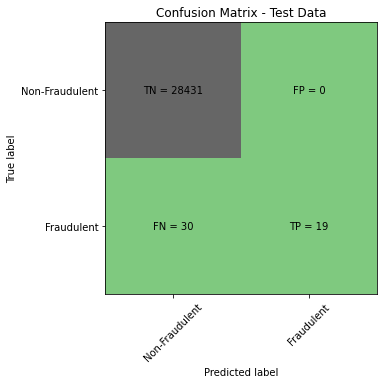


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       1.00      0.39      0.56        49

    accuracy                           1.00     28480
   macro avg       1.00      0.69      0.78     28480
weighted avg       1.00      1.00      1.00     28480

----------------------------------------------------------------------------------------------------
ROC       : 93.8%
Threshold : 0.008350937564308006
----------------------------------------------------------------------------------------------------


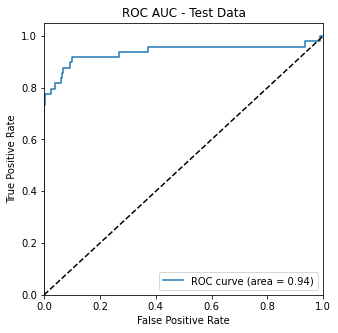

Time Taken by Model: --- 39.946887493133545 seconds ---


In [ ]:
# Logistic Regression with L1 Regularisation for StratifiedKFold Cross Validation Imbalanced Data
print("Logistic Regression with L1 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL1PipeLine(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Logistic Regression with L2 Regularisation
Max auc_roc for l2: 0.9421055533977981
----------------------------------------------------------------------------------------------------
Parameters for l2 regularisations
[[-0.02662087 -0.30819185 -0.19670206  0.13077358 -0.36995492  0.23189479
   0.44337136 -0.14757081 -0.14454121 -0.27084571  0.05900491 -0.17539473
  -0.03058996 -0.23512775 -0.06057098 -0.14186197 -0.14315804  0.0605448
  -0.0624128   0.58244801  0.22244949 -0.02740379  0.10918325 -0.02476193
  -0.07273778  0.00170325  0.00413018  0.020672   -0.3962534 ]]
[-4.78111418]
{1: array([[0.77075279, 0.77075279, 0.77075279, 0.77751302, 0.80610704,
        0.832019  , 0.89152989, 0.9428315 , 0.96769496, 0.96820638,
        0.96825295, 0.96825727, 0.96825772, 0.96825795, 0.96825795,
        0.96825795, 0.96825795, 0.96825795, 0.96825795, 0.96825795],
       [0.8038196 , 0.8038196 , 0.8038196 , 0.80964782, 0.8269668 ,
        0.84511371, 0.9086148 , 0.92720783, 0.92711411, 0.9277382

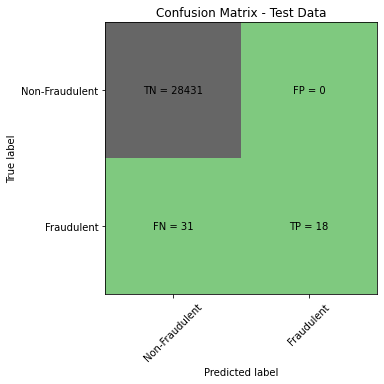


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       1.00      0.37      0.54        49

    accuracy                           1.00     28480
   macro avg       1.00      0.68      0.77     28480
weighted avg       1.00      1.00      1.00     28480

----------------------------------------------------------------------------------------------------
ROC       : 90.5%
Threshold : 0.009668206353111893
----------------------------------------------------------------------------------------------------


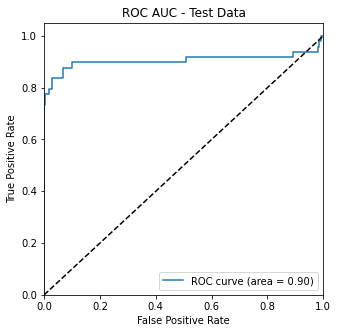

Time Taken by Model: --- 47.11953401565552 seconds ---


In [ ]:
# Logistic Regression with L2 Regularisation for StratifiedKFold Cross Validation Imbalanced Data
print("Logistic Regression with L2 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL2PipeLine(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

KNN Model
Accuracy of KNN model: 0.9993679775280899
----------------------------------------------------------------------------------------------------

Confusion Matrix


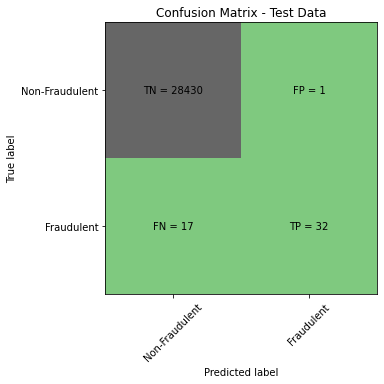


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.97      0.65      0.78        49

    accuracy                           1.00     28480
   macro avg       0.98      0.83      0.89     28480
weighted avg       1.00      1.00      1.00     28480

----------------------------------------------------------------------------------------------------
ROC       : 87.7%
Threshold : 0.2
----------------------------------------------------------------------------------------------------


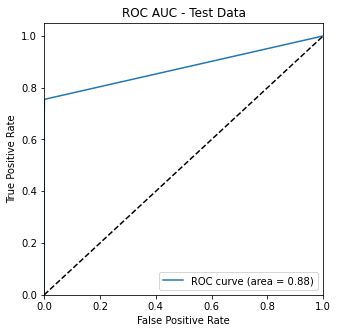

Time Taken by Model: --- 24.37992286682129 seconds ---


In [ ]:
# KNN Model for StratifiedKFold Cross Validation Imbalanced Data
print("KNN Model")
print('='*100 )
start_time = time.time()
df_Results = KNNPipeLine(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


SVM Model with Sigmoid Kernel
SVM Accuracy Score: 0.9983848314606741
----------------------------------------------------------------------------------------------------

Confusion Matrix


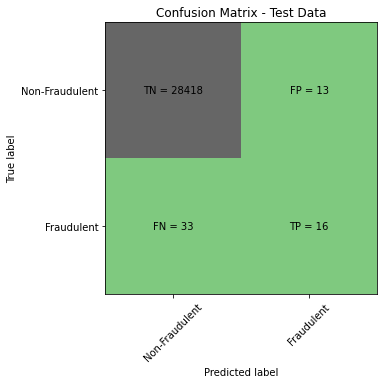


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.55      0.33      0.41        49

    accuracy                           1.00     28480
   macro avg       0.78      0.66      0.70     28480
weighted avg       1.00      1.00      1.00     28480

----------------------------------------------------------------------------------------------------
ROC       : 78.7%
Threshold : 0.001879306411462415
----------------------------------------------------------------------------------------------------


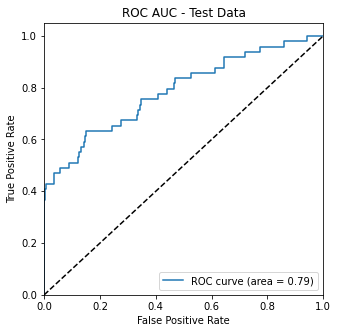

Time Taken by Model: --- 228.42325282096863 seconds ---


In [ ]:
#SVM Model with Sigmoid Kernel for StratifiedKFold Cross Validation Imbalanced Data
print("SVM Model with Sigmoid Kernel")
print('='*100 )
start_time = time.time()
df_Results = SVMPipeLine(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
Decision Tree with gini Accuracy: 0.9990168539325842
----------------------------------------------------------------------------------------------------

Confusion Matrix


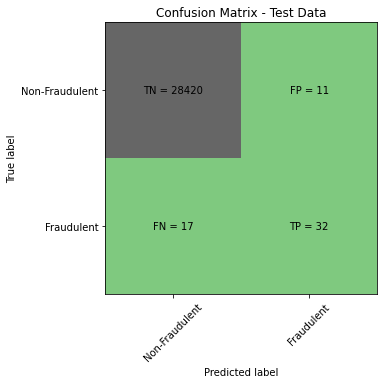


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.74      0.65      0.70        49

    accuracy                           1.00     28480
   macro avg       0.87      0.83      0.85     28480
weighted avg       1.00      1.00      1.00     28480

----------------------------------------------------------------------------------------------------
ROC       : 82.6%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


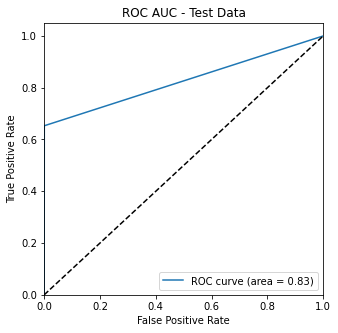

Decision Tree with entropy Accuracy: 0.9991573033707866
----------------------------------------------------------------------------------------------------

Confusion Matrix


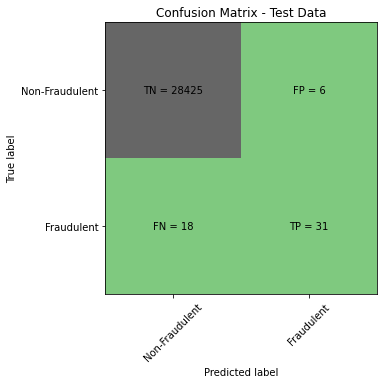


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.84      0.63      0.72        49

    accuracy                           1.00     28480
   macro avg       0.92      0.82      0.86     28480
weighted avg       1.00      1.00      1.00     28480

----------------------------------------------------------------------------------------------------
ROC       : 81.6%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


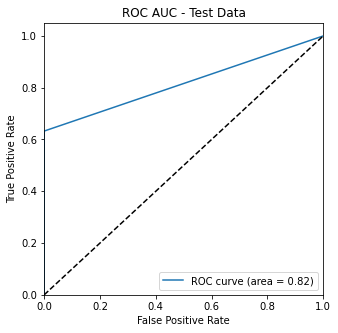

Time Taken by Model: --- 57.805590867996216 seconds ---


In [ ]:
# Decision Tree Models with  'gini' & 'entropy' criteria  for StratifiedKFold Cross Validation Imbalanced Data
print("Decision Tree Models with  'gini' & 'entropy' criteria")
print('='*100 )
start_time = time.time()
df_Results = DecisionTreePipeLine(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Random Forest Model Accuracy: 0.9993679775280899
----------------------------------------------------------------------------------------------------

Confusion Matrix


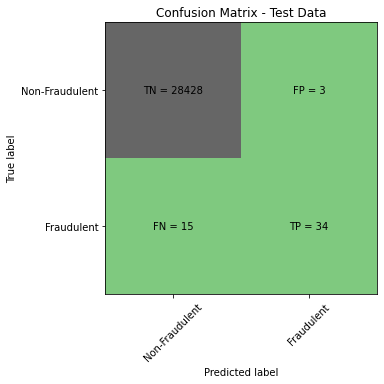


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.92      0.69      0.79        49

    accuracy                           1.00     28480
   macro avg       0.96      0.85      0.90     28480
weighted avg       1.00      1.00      1.00     28480

----------------------------------------------------------------------------------------------------
ROC       : 90.6%
Threshold : 0.01
----------------------------------------------------------------------------------------------------


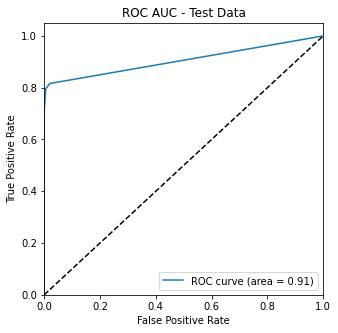

Time Taken by Model: --- 64.98386359214783 seconds ---


In [ ]:
# Random Forest Model for StratifiedKFold Cross Validation Imbalanced Data
print("Random Forest Model")
print('='*100 )
start_time = time.time()
df_Results = RandomForestPipeLine(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


XGBoost Model
[09:22:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy: 0.9994030898876405
----------------------------------------------------------------------------------------------------

Confusion Matrix


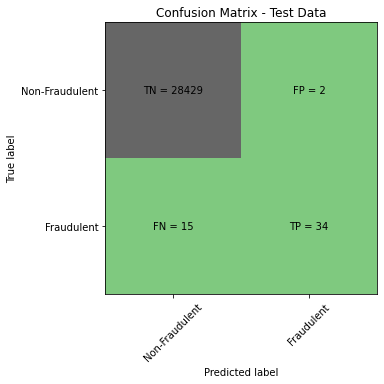


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.94      0.69      0.80        49

    accuracy                           1.00     28480
   macro avg       0.97      0.85      0.90     28480
weighted avg       1.00      1.00      1.00     28480

----------------------------------------------------------------------------------------------------
ROC       : 96.4%
Threshold : 4.8166537e-05
----------------------------------------------------------------------------------------------------


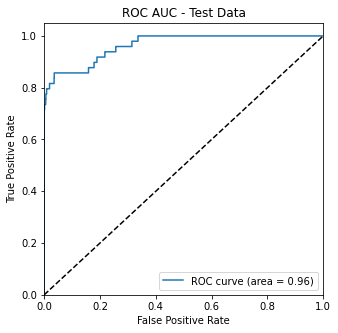

Time Taken by Model: --- 30.703864812850952 seconds ---


In [ ]:
# XGBoost Model  for StratifiedKFold Cross Validation Imbalanced Data
print("XGBoost Model")
print('='*100 )
start_time = time.time()
df_Results = XGBoostPipeLine(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


In [ ]:
# Sorting the results of all model on imbalanced data where we applied StratifiedKFold Cross Validation
df_Results[df_Results['Data_Imbalance_Handling']=='StratifiedKFold Cross Validation'].sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling  \
17  StratifiedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   

                                         Model  Accuracy  Roc_Value  Threshold  
17                                     XGBoost  0.999403   0.964013   0.000048  
16  Logistic Regression with L1 Regularisation  0.998947   0.938481   0.008351  
23                               Random Forest  0.999368   0.905795   0.010000  
18  Logistic Regression with L2 Regularisation  0.998912   0.904517   0.009668  
19                                         KNN  0.999368   0.877410   0.200000  
21               Tree Model with gini criteria  0.999017   0.826337   1.000000  
22            Tree Model with entropy criteria  0.999157   0.816221   1.000000  
20                                         SVM  0.998385   0.787214   0.001879

### <font color='blue'>Observation</font> : XGBoost has best roc value.


In [ ]:
# Sorting the results of all model done so far
df_Results.sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling  \
15    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
0                  Power Transformer   
1                  Power Transformer   
8     RepeatedKFold Cross Validation   
7                  Power Transformer   
17  StratifiedKFold Cross Validation   
6                  Power Transformer   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
2                  Power Transformer   
16  StratifiedKFold Cross Validation   
5                  Power Transformer   
13    RepeatedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
4                  Power Transformer   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
3                  Power Transformer   

                                         Model  Accuracy  Roc_Value  Threshold  
15                                     XGBoost  0.999684   0.985705   0.001153  
14                               Random Forest  0.999649   0.979328   0.030000  
0   Logistic Regression with L1 Regularisation  0.999210   0.979259   0.003811  
1   Logistic Regression with L2 Regularisation  0.999087   0.973701   0.011897  
8   Logistic Regression with L1 Regularisation  0.998999   0.972189   0.013335  
7                                      XGBoost  0.999561   0.968647   0.000179  
17                                     XGBoost  0.999403   0.964013   0.000048  
6                                Random Forest  0.999614   0.952811   0.030000  
9   Logistic Regression with L2 Regularisation  0.998929   0.952232   0.011349  
10                                         KNN  0.999596   0.950415   0.200000  
2                                          KNN  0.999473   0.948860   0.200000  
16  Logistic Regression with L1 Regularisation  0.998947   0.938481   0.008351  
5             Tree Model with entropy criteria  0.999298   0.918156   1.000000  
13            Tree Model with entropy criteria  0.999087   0.910592   1.000000  
23                               Random Forest  0.999368   0.905795   0.010000  
18  Logistic Regression with L2 Regularisation  0.998912   0.904517   0.009668  
12               Tree Model with gini criteria  0.999228   0.881012   1.000000  
19                                         KNN  0.999368   0.877410   0.200000  
4                Tree Model with gini criteria  0.999157   0.877340   1.000000  
21               Tree Model with gini criteria  0.999017   0.826337   1.000000  
22            Tree Model with entropy criteria  0.999157   0.816221   1.000000  
11                                         SVM  0.997683   0.812116   0.002109  
20                                         SVM  0.998385   0.787214   0.001879  
3                                          SVM  0.998280   0.698193   0.006920

### <font color='blue'>Observation</font> : XGBoost on RepeatedKFold Cross Validation has the overall best roc value.


### Using Undersampling methods

In [ ]:
# Instantiate Undersampler

# List the column names of the training features
cols = list(X_train.columns.values)

# Initialize the RandomUnderSampler with a sampling strategy of 0.5
RUS = RandomUnderSampler(sampling_strategy=0.5)

# Apply the undersampling to the training data
X_Under, y_Under = RUS.fit_resample(X_train, y_train)

# Create DataFrame for the undersampled features
X_Under = pd.DataFrame(data=X_Under, columns=cols)

In [ ]:
X_Under.shape,y_Under.shape

((1182, 29), (1182,))

In [ ]:
# Checking the split of the class label in term of percentage
print("Fraudulent Percentage for Train data : ",np.sum(y_Under)/len(y_Under)*100)
print("Fraudulent Percentage for Test data  : ",np.sum(y_test)/len(y_test)*100)

Fraudulent Percentage for Train data :  33.33333333333333
Fraudulent Percentage for Test data  :  0.17204452090867595


### <font color='blue'>Observation</font> : Due to undersampling, we can see that % of fraudulent has increased in train data compared to test data.

In [ ]:
Data_Imbalance_Handling = "Random Undersampling"

Logistic Regression with L1 Regularisation
Max auc_roc for l1: 0.5
----------------------------------------------------------------------------------------------------
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])}
----------------------------------------------------------------------------------------------------
Accuracy

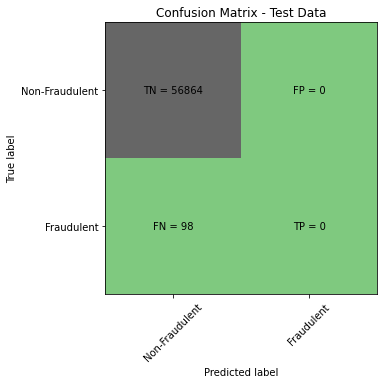


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 50.0%
Threshold : inf
----------------------------------------------------------------------------------------------------


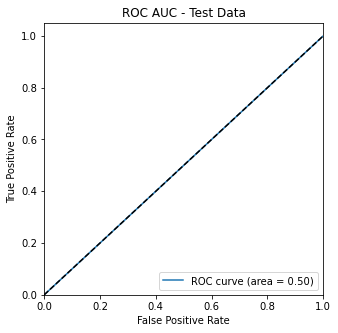

Time Taken by Model: --- 0.9999752044677734 seconds ---


In [ ]:
# Logistic Regression with L1 Regularisation for Random Undersampling data
print("Logistic Regression with L1 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL1PipeLine(df_Results,Data_Imbalance_Handling,X_Under,y_Under,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Logistic Regression with L2 Regularisation
Max auc_roc for l2: 0.5
----------------------------------------------------------------------------------------------------
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])}
----------------------------------------------------------------------------------------------------
Accuracy

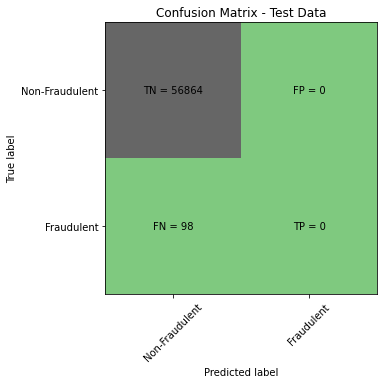


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 50.0%
Threshold : inf
----------------------------------------------------------------------------------------------------


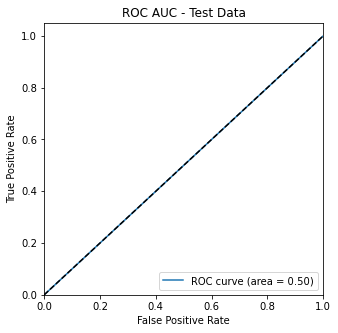

Time Taken by Model: --- 0.8442885875701904 seconds ---


In [ ]:
# Logistic Regression with L2 Regularisation  for Random Undersampling data
print("Logistic Regression with L2 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL2PipeLine(df_Results,Data_Imbalance_Handling,X_Under,y_Under,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


KNN Model
Accuracy of KNN model: 0.9879919946631087
----------------------------------------------------------------------------------------------------

Confusion Matrix


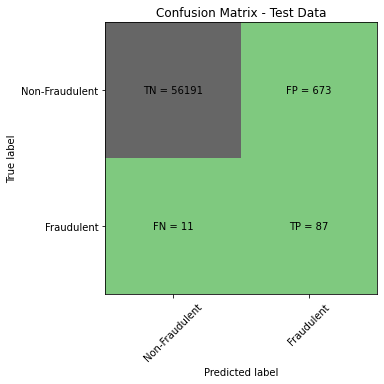


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.89      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962

----------------------------------------------------------------------------------------------------
ROC       : 96.7%
Threshold : 0.8
----------------------------------------------------------------------------------------------------


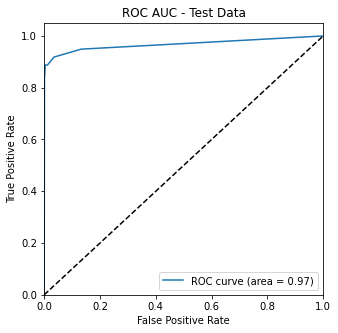

Time Taken by Model: --- 3.0745081901550293 seconds ---


In [ ]:
# KNN Model for Random Undersampling data
print("KNN Model")
print('='*100 )
start_time = time.time()
df_Results = KNNPipeLine(df_Results,Data_Imbalance_Handling,X_Under,y_Under,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


SVM Model with Sigmoid Kernel
SVM Accuracy Score: 0.9607106492047329
----------------------------------------------------------------------------------------------------

Confusion Matrix


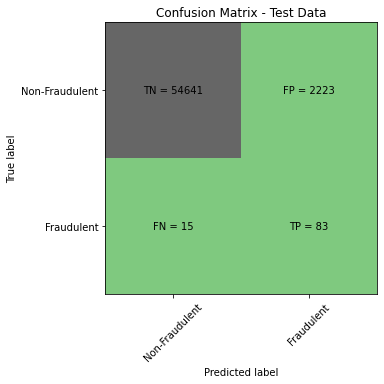


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.85      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.90      0.52     56962
weighted avg       1.00      0.96      0.98     56962

----------------------------------------------------------------------------------------------------
ROC       : 92.1%
Threshold : 0.2299204103472159
----------------------------------------------------------------------------------------------------


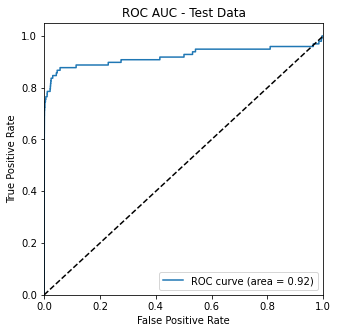

Time Taken by Model: --- 3.218837022781372 seconds ---


In [ ]:
#SVM Model with Sigmoid Kernel  for Random Undersampling data
print("SVM Model with Sigmoid Kernel")
print('='*100 )
start_time = time.time()
df_Results = SVMPipeLine(df_Results,Data_Imbalance_Handling,X_Under,y_Under,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
Decision Tree with gini Accuracy: 0.9571293142796953
----------------------------------------------------------------------------------------------------

Confusion Matrix


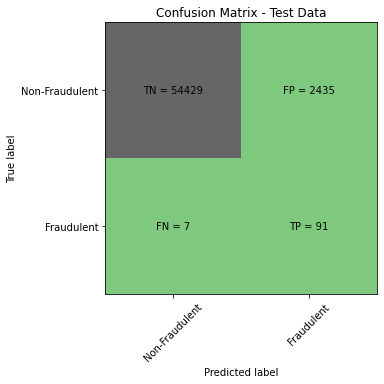


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962

----------------------------------------------------------------------------------------------------
ROC       : 94.3%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


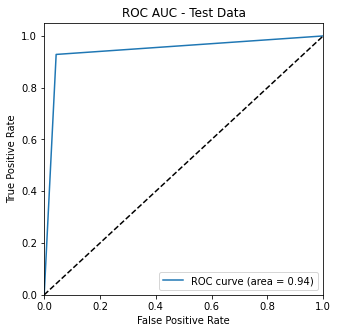

Decision Tree with entropy Accuracy: 0.9411010849338155
----------------------------------------------------------------------------------------------------

Confusion Matrix


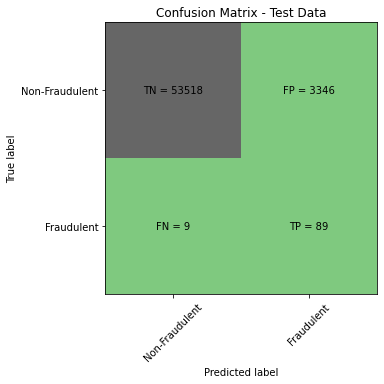


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.91      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.94      0.97     56962

----------------------------------------------------------------------------------------------------
ROC       : 92.5%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


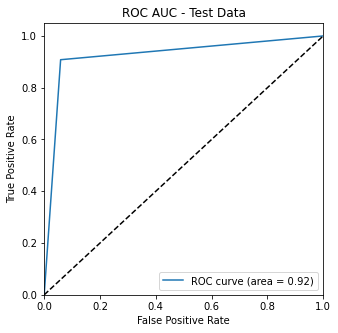

Time Taken by Model: --- 1.5024921894073486 seconds ---


In [ ]:
# Decision Tree Models with  'gini' & 'entropy' criteria  for Random Undersampling data
print("Decision Tree Models with  'gini' & 'entropy' criteria")
print('='*100 )
start_time = time.time()
df_Results = DecisionTreePipeLine(df_Results,Data_Imbalance_Handling,X_Under,y_Under,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Random Forest Model Accuracy: 0.9914679962079983
----------------------------------------------------------------------------------------------------

Confusion Matrix


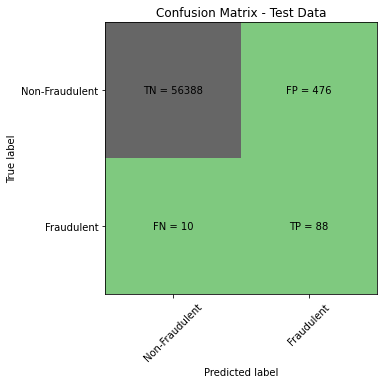


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.90      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962

----------------------------------------------------------------------------------------------------
ROC       : 97.5%
Threshold : 0.51
----------------------------------------------------------------------------------------------------


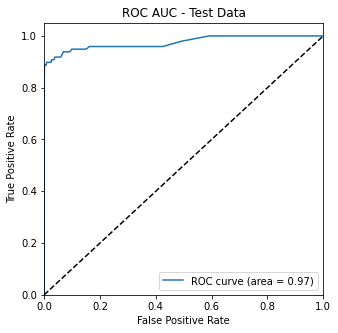

Time Taken by Model: --- 1.3216211795806885 seconds ---


In [ ]:
# Random Forest Model  for Random Undersampling data
print("Random Forest Model")
print('='*100 )
start_time = time.time()
df_Results = RandomForestPipeLine(df_Results,Data_Imbalance_Handling,X_Under,y_Under,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[09:40:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy: 0.9848846599487378
----------------------------------------------------------------------------------------------------

Confusion Matrix


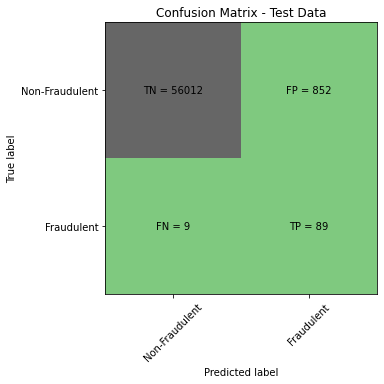


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.91      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962

----------------------------------------------------------------------------------------------------
ROC       : 97.8%
Threshold : 0.34624118
----------------------------------------------------------------------------------------------------


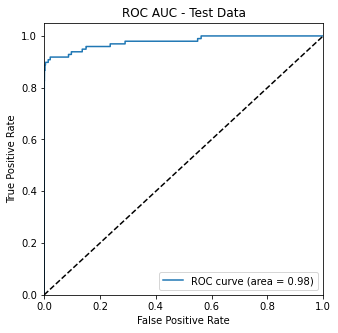

Time Taken by Model: --- 0.7573809623718262 seconds ---


In [ ]:
# XGBoost Model for Random Undersampling data
print("XGBoost Model")
print('='*100 )
start_time = time.time()
df_Results = XGBoostPipeLine(df_Results,Data_Imbalance_Handling,X_Under,y_Under,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Sorting the results of all model, where we used Random Undersampling
df_Results[df_Results['Data_Imbalance_Handling']=='Random Undersampling'].sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling                                       Model  \
31    Random Undersampling                                     XGBoost   
30    Random Undersampling                               Random Forest   
26    Random Undersampling                                         KNN   
28    Random Undersampling               Tree Model with gini criteria   
29    Random Undersampling            Tree Model with entropy criteria   
27    Random Undersampling                                         SVM   
24    Random Undersampling  Logistic Regression with L1 Regularisation   
25    Random Undersampling  Logistic Regression with L2 Regularisation   

    Accuracy  Roc_Value  Threshold  
31  0.984885   0.977804   0.346241  
30  0.991468   0.974832   0.510000  
26  0.987992   0.967309   0.800000  
28  0.957129   0.942875   1.000000  
29  0.941101   0.924661   1.000000  
27  0.960711   0.921446   0.229920  
24  0.998280   0.500000        inf  
25  0.998280   0.500000        inf

### <font color='blue'>Observation</font> : On Random  Undersampling, XGBoost has best roc value. Logistic Regression is not doing well

In [ ]:
# Sorting the results of all model done so far
df_Results.sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling  \
15    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
0                  Power Transformer   
31              Random Undersampling   
30              Random Undersampling   
1                  Power Transformer   
8     RepeatedKFold Cross Validation   
7                  Power Transformer   
26              Random Undersampling   
17  StratifiedKFold Cross Validation   
6                  Power Transformer   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
2                  Power Transformer   
28              Random Undersampling   
16  StratifiedKFold Cross Validation   
29              Random Undersampling   
27              Random Undersampling   
5                  Power Transformer   
13    RepeatedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
4                  Power Transformer   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
3                  Power Transformer   
24              Random Undersampling   
25              Random Undersampling   

                                         Model  Accuracy  Roc_Value  Threshold  
15                                     XGBoost  0.999684   0.985705   0.001153  
14                               Random Forest  0.999649   0.979328   0.030000  
0   Logistic Regression with L1 Regularisation  0.999210   0.979259   0.003811  
31                                     XGBoost  0.984885   0.977804   0.346241  
30                               Random Forest  0.991468   0.974832   0.510000  
1   Logistic Regression with L2 Regularisation  0.999087   0.973701   0.011897  
8   Logistic Regression with L1 Regularisation  0.998999   0.972189   0.013335  
7                                      XGBoost  0.999561   0.968647   0.000179  
26                                         KNN  0.987992   0.967309   0.800000  
17                                     XGBoost  0.999403   0.964013   0.000048  
6                                Random Forest  0.999614   0.952811   0.030000  
9   Logistic Regression with L2 Regularisation  0.998929   0.952232   0.011349  
10                                         KNN  0.999596   0.950415   0.200000  
2                                          KNN  0.999473   0.948860   0.200000  
28               Tree Model with gini criteria  0.957129   0.942875   1.000000  
16  Logistic Regression with L1 Regularisation  0.998947   0.938481   0.008351  
29            Tree Model with entropy criteria  0.941101   0.924661   1.000000  
27                                         SVM  0.960711   0.921446   0.229920  
5             Tree Model with entropy criteria  0.999298   0.918156   1.000000  
13            Tree Model with entropy criteria  0.999087   0.910592   1.000000  
23                               Random Forest  0.999368   0.905795   0.010000  
18  Logistic Regression with L2 Regularisation  0.998912   0.904517   0.009668  
12               Tree Model with gini criteria  0.999228   0.881012   1.000000  
19                                         KNN  0.999368   0.877410   0.200000  
4                Tree Model with gini criteria  0.999157   0.877340   1.000000  
21               Tree Model with gini criteria  0.999017   0.826337   1.000000  
22            Tree Model with entropy criteria  0.999157   0.816221   1.000000  
11                                         SVM  0.997683   0.812116   0.002109  
20                                         SVM  0.998385   0.787214   0.001879  
3                                          SVM  0.998280   0.698193   0.006920  
24  Logistic Regression with L1 Regularisation  0.998280   0.500000        inf  
25  Logistic Regression with L2 Regularisation  0.998280   0.500000        inf

### <font color='blue'>Observation</font> : XGBoost on RepeatedKFold Cross Validation has the overall best roc value so far.

## Model building with balancing Classes

**Why is Accuracy Not Suitable for Imbalanced Datasets?**

* Accuracy is not an ideal metric for imbalanced datasets.

* In such cases, a model might achieve a high accuracy score by correctly predicting the majority of observations, but this can be misleading as it fails to capture the poor performance of the model on the minority class.

* Instead of accuracy, consider using ROC AUC, which provide a more comprehensive evaluation of the model's performance across all classification thresholds.

**Undersampling:** Involves selecting fewer data points from the majority class to balance the classes during model training.

**Oversampling:** Involves assigning weights to randomly chosen data points from the minority class, allowing the algorithm to focus more on this class while optimizing the loss function.

**SMOTE (Synthetic Minority Over-sampling Technique):** Generates new data points that lie between two data points of the minority class.

**ADASYN (Adaptive Synthetic Sampling):** Similar to SMOTE, but focuses on generating synthetic data for minority examples that are harder to learn, ensuring a density distribution.

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [ ]:
# List the column names of the features
cols = list(X_train.columns.values)

# Initialize RandomOverSampler with a sampling strategy of 0.5
ROS = RandomOverSampler(sampling_strategy=0.5)

# Apply the oversampling to the training data
X_over, y_over = ROS.fit_resample(X_train, y_train)

# Create DataFrame for the oversampled features
X_over = pd.DataFrame(data=X_over, columns=cols)

In [ ]:
# Checking the split of the class label
print("Fraudulent Count for Full data  : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_over))
print("Fraudulent Count for Test data  : ",np.sum(y_test))

Fraudulent Count for Full data  :  492
Fraudulent Count for Train data :  113725
Fraudulent Count for Test data  :  98


In [ ]:
# Checking the split of the class label in term of percentage
print("Fraudulent Percentage for Train data : ",np.sum(y_over)/len(y_over)*100)
print("Fraudulent Percentage for Test data  : ",np.sum(y_test)/len(y_test)*100)

Fraudulent Percentage for Train data :  33.333235632049146
Fraudulent Percentage for Test data  :  0.17204452090867595


### <font color='blue'>Observation</font> : Due oversampling, we can see that Fraudulent Percentage for Train data is higher.

In [ ]:
Data_Imbalance_Handling = "Random Oversampling"

Logistic Regression with L1 Regularisation
Max auc_roc for l1: 0.5
----------------------------------------------------------------------------------------------------
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])}
----------------------------------------------------------------------------------------------------
Accuracy

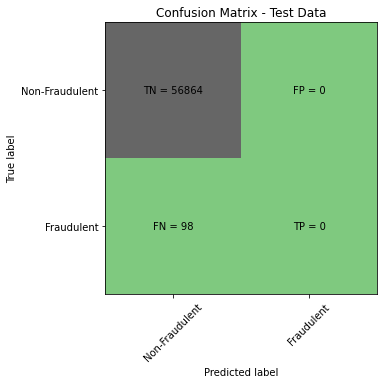


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 50.0%
Threshold : inf
----------------------------------------------------------------------------------------------------


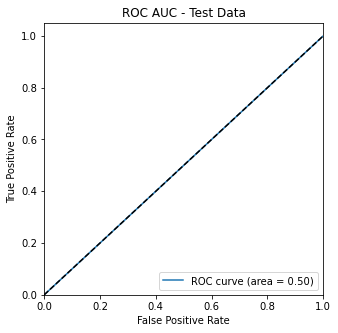

Time Taken by Model: --- 33.498088121414185 seconds ---


In [ ]:
# Logistic Regression with L1 Regularisation for Balanced Data with Random Oversampling
print("Logistic Regression with L1 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL1PipeLine(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Logistic Regression with L2 Regularisation
Max auc_roc for l2: 0.5
----------------------------------------------------------------------------------------------------
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])}
----------------------------------------------------------------------------------------------------
Accuracy

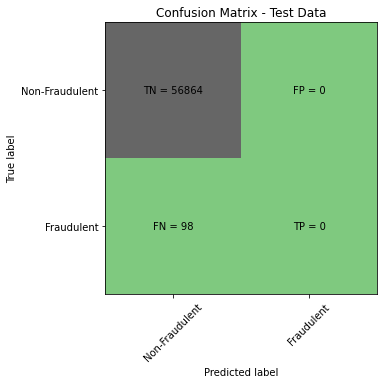


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 50.0%
Threshold : inf
----------------------------------------------------------------------------------------------------


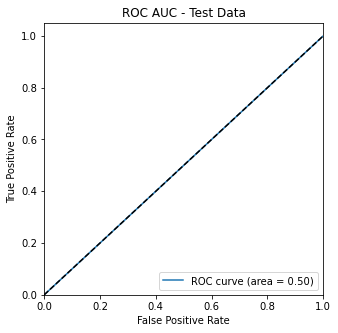

Time Taken by Model: --- 21.965680599212646 seconds ---


In [ ]:
# Logistic Regression with L2 Regularisation for Balanced Data with Random Oversampling
print("Logistic Regression with L2 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL2PipeLine(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

KNN Model
Accuracy of KNN model: 0.9991573329588147
----------------------------------------------------------------------------------------------------

Confusion Matrix


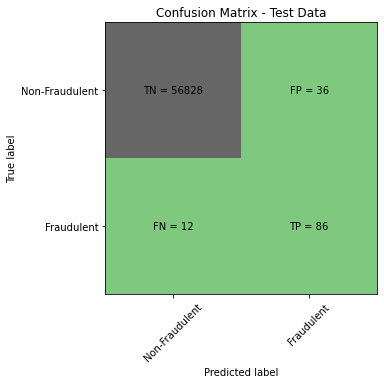


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.88      0.78        98

    accuracy                           1.00     56962
   macro avg       0.85      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 94.9%
Threshold : 0.2
----------------------------------------------------------------------------------------------------


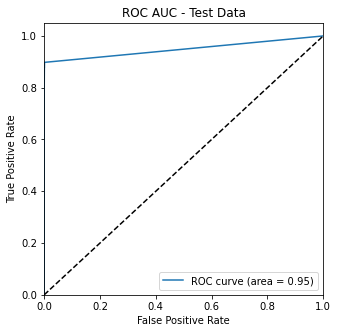

Time Taken by Model: --- 62.06307768821716 seconds ---


In [ ]:
# KNN Model  for Balanced Data with Random Oversampling
print("KNN Model")
print('='*100 )
start_time = time.time()
df_Results = KNNPipeLine(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
#SVM Model with Sigmoid Kernel  for Balanced Data with Random Oversampling
#print("SVM Model with Sigmoid Kernel")
#print('='*100 )
#start_time = time.time()
#df_Results = SVMPipeLine(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
#print('='*100 )
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

### <font color='blue'>Observation</font> : SVM (Support Vector Machine) models execution is taking quite a bit of time with balanced data. It is very difficult to complete 1 instance of execution. This is becoming bottleneck for completing this project and hence, we are not executing with balanced data.

Decision Tree Models with  'gini' & 'entropy' criteria
Decision Tree with gini Accuracy: 0.9990344440153085
----------------------------------------------------------------------------------------------------

Confusion Matrix


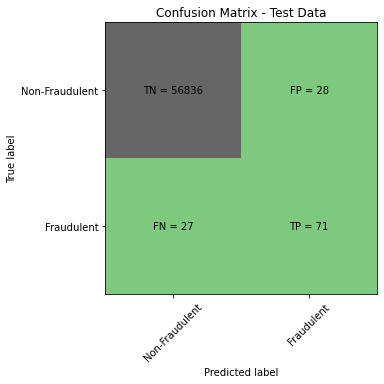


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.72      0.72        98

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 86.2%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


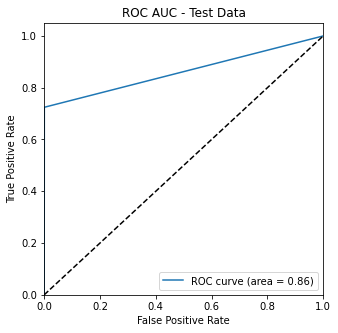

Decision Tree with entropy Accuracy: 0.9990695551420246
----------------------------------------------------------------------------------------------------

Confusion Matrix


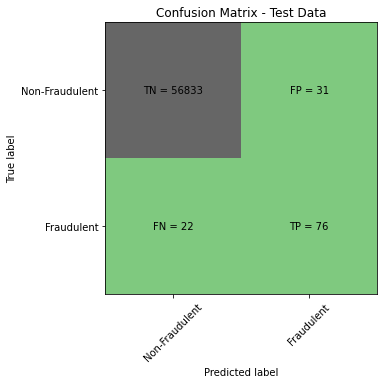


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.78      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 88.7%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


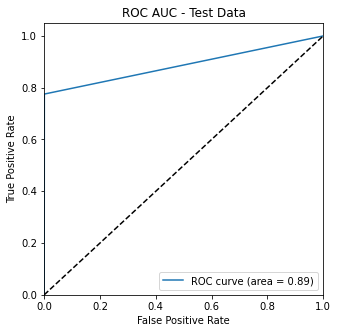

Time Taken by Model: --- 29.74999165534973 seconds ---


In [ ]:
# Decision Tree Models with  'gini' & 'entropy' criteria for Balanced Data with Random Oversampling
print("Decision Tree Models with  'gini' & 'entropy' criteria")
print('='*100 )
start_time = time.time()
df_Results = DecisionTreePipeLine(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Random Forest Model Accuracy: 0.9995611109160493
----------------------------------------------------------------------------------------------------

Confusion Matrix


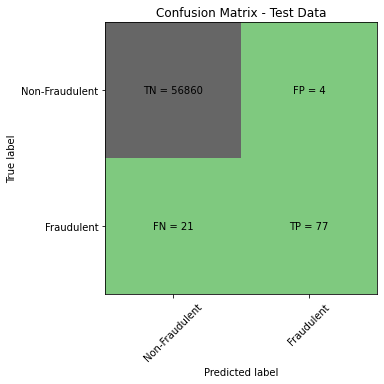


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 96.3%
Threshold : 0.01
----------------------------------------------------------------------------------------------------


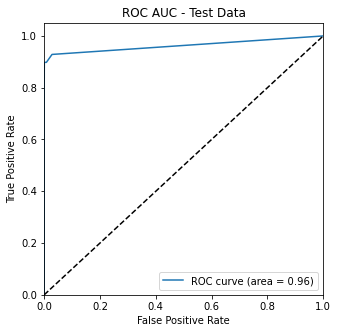

Time Taken by Model: --- 41.96945118904114 seconds ---


In [ ]:
# Random Forest Model for Balanced Data with Random Oversampling
print("Random Forest Model")
print('='*100 )
start_time = time.time()
df_Results = RandomForestPipeLine(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[09:46:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy: 0.9995786664794073
----------------------------------------------------------------------------------------------------

Confusion Matrix


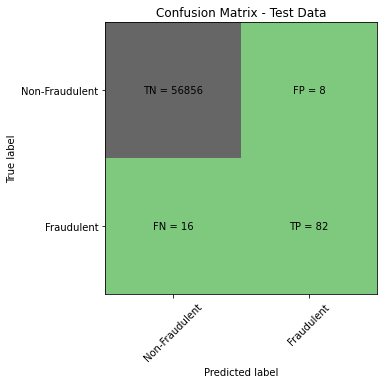


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 97.9%
Threshold : 0.00020522262
----------------------------------------------------------------------------------------------------


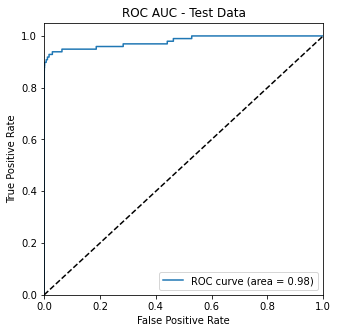

Time Taken by Model: --- 36.55768632888794 seconds ---


In [ ]:
# XGBoost Model for Balanced Data with Random Oversampling
print("XGBoost Model")
print('='*100 )
start_time = time.time()
df_Results = XGBoostPipeLine(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Sorting the results of all model, where we used Random Oversampling
df_Results[df_Results['Data_Imbalance_Handling']=='Random Oversampling'].sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling                                       Model  \
33     Random Oversampling                                     XGBoost   
38     Random Oversampling                               Random Forest   
35     Random Oversampling                                         KNN   
37     Random Oversampling            Tree Model with entropy criteria   
36     Random Oversampling               Tree Model with gini criteria   
32     Random Oversampling  Logistic Regression with L1 Regularisation   
34     Random Oversampling  Logistic Regression with L2 Regularisation   

    Accuracy  Roc_Value  Threshold  
33  0.999579   0.979212   0.000205  
38  0.999561   0.962698   0.010000  
35  0.999157   0.948818   0.200000  
37  0.999070   0.887483   1.000000  
36  0.999034   0.861999   1.000000  
32  0.998280   0.500000        inf  
34  0.998280   0.500000        inf

### <font color='blue'>Observation</font> : Again XGBoost has best roc value for random oversampling

In [ ]:
# Sorting the results of all model done so far
df_Results.sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling  \
15    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
0                  Power Transformer   
33               Random Oversampling   
31              Random Undersampling   
30              Random Undersampling   
1                  Power Transformer   
8     RepeatedKFold Cross Validation   
7                  Power Transformer   
26              Random Undersampling   
17  StratifiedKFold Cross Validation   
38               Random Oversampling   
6                  Power Transformer   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
2                  Power Transformer   
35               Random Oversampling   
28              Random Undersampling   
16  StratifiedKFold Cross Validation   
29              Random Undersampling   
27              Random Undersampling   
5                  Power Transformer   
13    RepeatedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
37               Random Oversampling   
12    RepeatedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
4                  Power Transformer   
36               Random Oversampling   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
3                  Power Transformer   
24              Random Undersampling   
32               Random Oversampling   
34               Random Oversampling   
25              Random Undersampling   

                                         Model  Accuracy  Roc_Value  Threshold  
15                                     XGBoost  0.999684   0.985705   0.001153  
14                               Random Forest  0.999649   0.979328   0.030000  
0   Logistic Regression with L1 Regularisation  0.999210   0.979259   0.003811  
33                                     XGBoost  0.999579   0.979212   0.000205  
31                                     XGBoost  0.984885   0.977804   0.346241  
30                               Random Forest  0.991468   0.974832   0.510000  
1   Logistic Regression with L2 Regularisation  0.999087   0.973701   0.011897  
8   Logistic Regression with L1 Regularisation  0.998999   0.972189   0.013335  
7                                      XGBoost  0.999561   0.968647   0.000179  
26                                         KNN  0.987992   0.967309   0.800000  
17                                     XGBoost  0.999403   0.964013   0.000048  
38                               Random Forest  0.999561   0.962698   0.010000  
6                                Random Forest  0.999614   0.952811   0.030000  
9   Logistic Regression with L2 Regularisation  0.998929   0.952232   0.011349  
10                                         KNN  0.999596   0.950415   0.200000  
2                                          KNN  0.999473   0.948860   0.200000  
35                                         KNN  0.999157   0.948818   0.200000  
28               Tree Model with gini criteria  0.957129   0.942875   1.000000  
16  Logistic Regression with L1 Regularisation  0.998947   0.938481   0.008351  
29            Tree Model with entropy criteria  0.941101   0.924661   1.000000  
27                                         SVM  0.960711   0.921446   0.229920  
5             Tree Model with entropy criteria  0.999298   0.918156   1.000000  
13            Tree Model with entropy criteria  0.999087   0.910592   1.000000  
23                               Random Forest  0.999368   0.905795   0.010000  
18  Logistic Regression with L2 Regularisation  0.998912   0.904517   0.009668  
37            Tree Model with entropy criteria  0.999070   0.887483   1.000000  
12               Tree Model with gini criteria  0.999228   0.881012   1.000000  
19                                         KNN  0.999368   0.877410   0.200000  
4                Tree Model with gini criteria  0.999157   0.87

### <font color='blue'>Observation</font> : XGBoost on RepeatedKFold Cross Validation has the overall best roc value so far.

## Applying SMOTE

### Print the class distribution after applying SMOTE

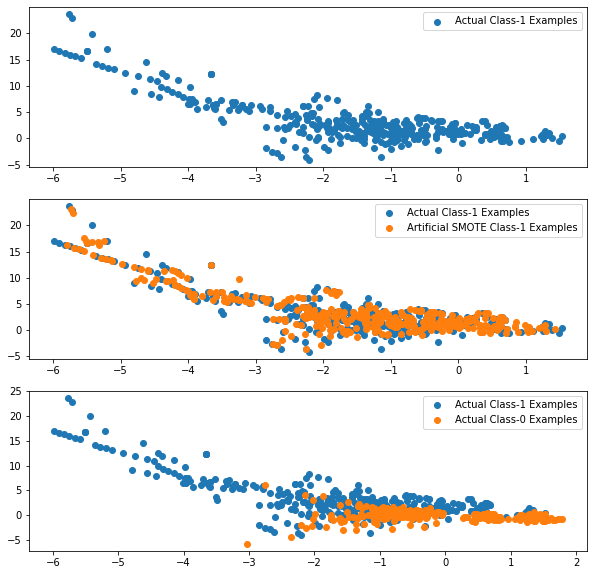

In [ ]:
# Initialize SMOTE with a random state of 0
sm = over_sampling.SMOTE(random_state=0)

# Apply SMOTE to the training data to create oversampled feature and target sets
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do:
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

# Convert the training data to NumPy arrays for specific class extraction
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# Set the figure size for the plot
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()

# Plot 1: Actual Class-1 Examples
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

# Plot 2: Actual Class-1 and Artificial SMOTE Class-1 Examples
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
X_train_smote_1_np = X_train_smote_1.to_numpy()
plt.scatter(X_train_smote_1_np[:X_train_1.shape[0], 0], X_train_smote_1_np[:X_train_1.shape[0], 1], label='Artificial SMOTE Class-1 Examples')
plt.legend()

# Plot 3: Actual Class-1 and Class-0 Examples
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#Create Dataframe
X_train_smote = pd.DataFrame(data=X_train_smote,columns=cols)

In [ ]:
Data_Imbalance_Handling = "SMOTE Oversampling"

Logistic Regression with L1 Regularisation
Max auc_roc for l1: 0.5
----------------------------------------------------------------------------------------------------
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])}
----------------------------------------------------------------------------------------------------
Accuracy

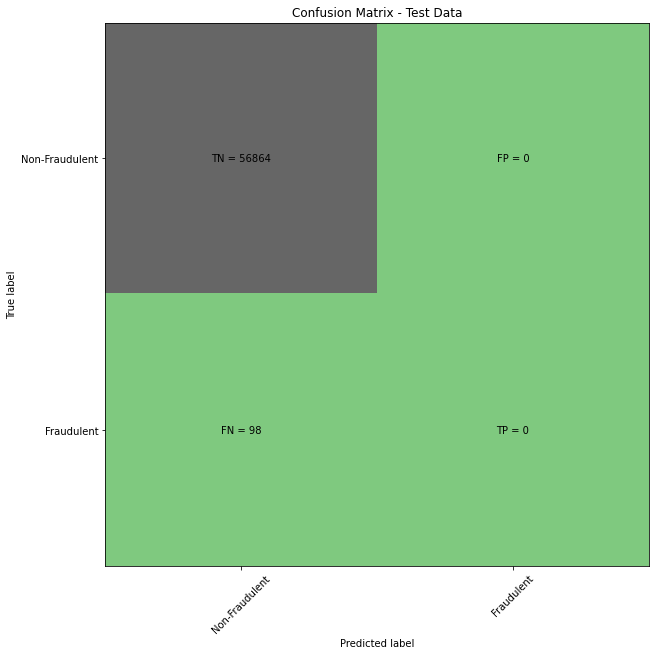


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 50.0%
Threshold : inf
----------------------------------------------------------------------------------------------------


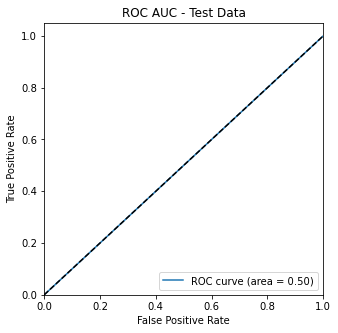

Time Taken by Model: --- 48.106279373168945 seconds ---


In [ ]:
# Logistic Regression with L1 Regularisation for Balanced Data using SMOTE Technique
print("Logistic Regression with L1 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL1PipeLine(df_Results,Data_Imbalance_Handling,X_train_smote,y_train_smote,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Logistic Regression with L2 Regularisation
Max auc_roc for l2: 0.5
----------------------------------------------------------------------------------------------------
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])}
----------------------------------------------------------------------------------------------------
Accuracy

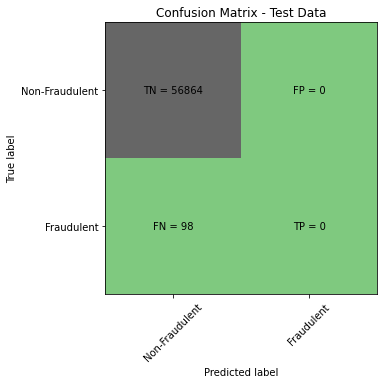


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 50.0%
Threshold : inf
----------------------------------------------------------------------------------------------------


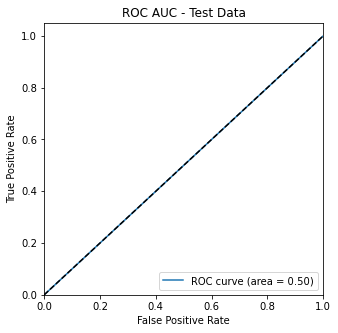

Time Taken by Model: --- 30.9119930267334 seconds ---


In [ ]:
# Logistic Regression with L2 Regularisation  for Balanced Data using SMOTE Technique
print("Logistic Regression with L2 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL2PipeLine(df_Results,Data_Imbalance_Handling,X_train_smote,y_train_smote,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


KNN Model
Accuracy of KNN model: 0.9978757768336786
----------------------------------------------------------------------------------------------------

Confusion Matrix


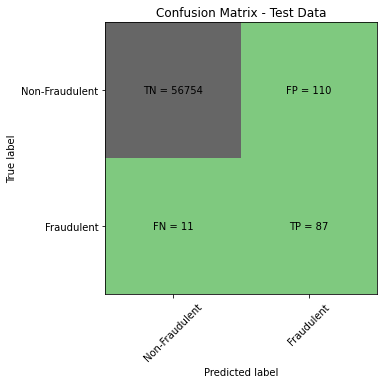


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.89      0.59        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 94.8%
Threshold : 0.4
----------------------------------------------------------------------------------------------------


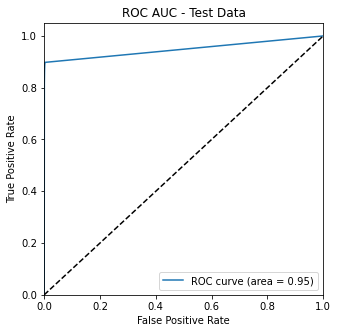

Time Taken by Model: --- 83.84781050682068 seconds ---


In [ ]:
# KNN Model for Balanced Data using SMOTE Technique
print("KNN Model")
print('='*100 )
start_time = time.time()
df_Results = KNNPipeLine(df_Results,Data_Imbalance_Handling,X_train_smote,y_train_smote,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


In [ ]:
#SVM Model with Sigmoid Kernel for Balanced Data using SMOTE Technique
#print("SVM Model with Sigmoid Kernel")
#print('='*100 )
#start_time = time.time()
#df_Results = SVMPipeLine(df_Results,Data_Imbalance_Handling,X_train_smote,y_train_smote,X_test,y_test)
#print('='*100 )
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))


### <font color='blue'>Observation</font> : SVM (Support Vector Machine) models execution is taking quite a bit of time with balanced data. It is very difficult to complete 1 instance of execution. This is becoming bottleneck for completing this project and hence, we are not executing with balanced data.

Decision Tree Models with  'gini' & 'entropy' criteria
Decision Tree with gini Accuracy: 0.9974368877497279
----------------------------------------------------------------------------------------------------

Confusion Matrix


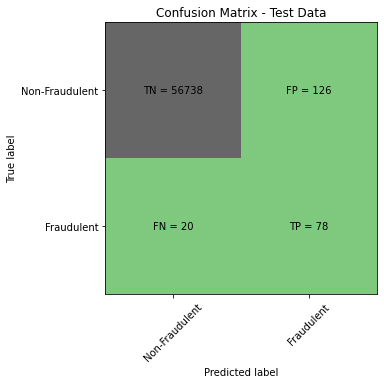


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.80      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.90      0.76     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 89.7%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


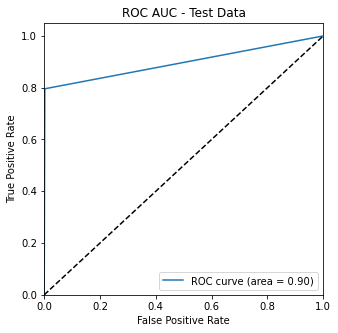

Decision Tree with entropy Accuracy: 0.9979284435237527
----------------------------------------------------------------------------------------------------

Confusion Matrix


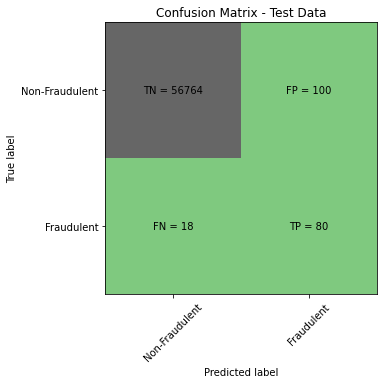


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.82      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.91      0.79     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 90.7%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


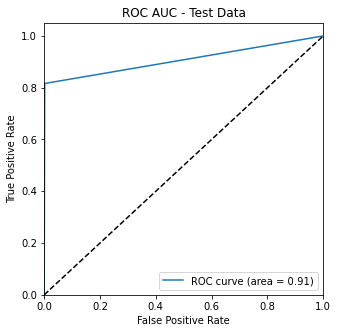

Time Taken by Model: --- 88.75537633895874 seconds ---


In [ ]:
# Decision Tree Models with  'gini' & 'entropy' criteria for Balanced Data using SMOTE Technique
print("Decision Tree Models with  'gini' & 'entropy' criteria")
print('='*100 )
start_time = time.time()
df_Results = DecisionTreePipeLine(df_Results,Data_Imbalance_Handling,X_train_smote,y_train_smote,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Random Forest Model Accuracy: 0.9994908886626171
----------------------------------------------------------------------------------------------------

Confusion Matrix


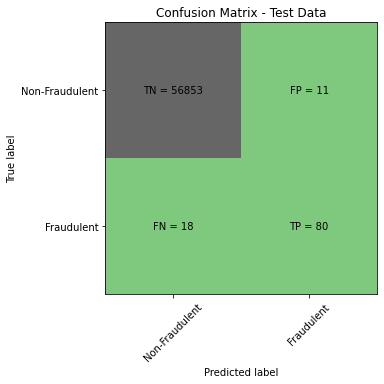


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 96.9%
Threshold : 0.06
----------------------------------------------------------------------------------------------------


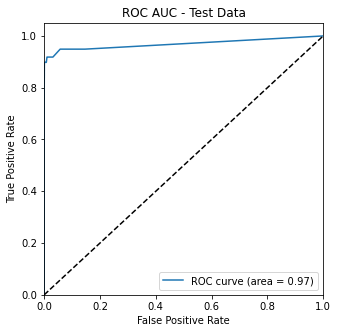

Time Taken by Model: --- 95.17500138282776 seconds ---


In [ ]:
# Random Forest Model for Balanced Data using SMOTE Technique
print("Random Forest Model")
print('='*100 )
start_time = time.time()
df_Results = RandomForestPipeLine(df_Results,Data_Imbalance_Handling,X_train_smote,y_train_smote,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[10:05:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy: 0.9991748885221726
----------------------------------------------------------------------------------------------------

Confusion Matrix


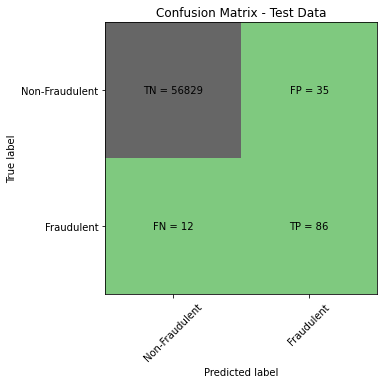


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.88      0.79        98

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 97.7%
Threshold : 0.19007827
----------------------------------------------------------------------------------------------------


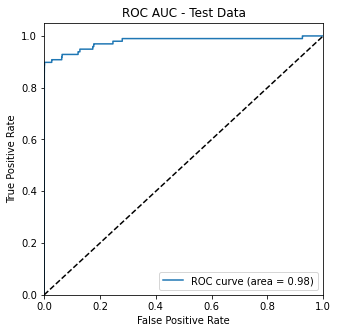

Time Taken by Model: --- 71.0251476764679 seconds ---


In [ ]:
# XGBoost Model for Balanced Data using SMOTE Technique
print("XGBoost Model")
print('='*100 )
start_time = time.time()
df_Results = XGBoostPipeLine(df_Results,Data_Imbalance_Handling,X_train_smote,y_train_smote,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Sorting the results of all model, where we used SMOTE Oversampling
df_Results[df_Results['Data_Imbalance_Handling']=='SMOTE Oversampling'].sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling                                       Model  \
45      SMOTE Oversampling                                     XGBoost   
44      SMOTE Oversampling                               Random Forest   
41      SMOTE Oversampling                                         KNN   
43      SMOTE Oversampling            Tree Model with entropy criteria   
42      SMOTE Oversampling               Tree Model with gini criteria   
39      SMOTE Oversampling  Logistic Regression with L1 Regularisation   
40      SMOTE Oversampling  Logistic Regression with L2 Regularisation   

    Accuracy  Roc_Value  Threshold  
45  0.999175   0.977431   0.190078  
44  0.999491   0.969191   0.060000  
41  0.997876   0.948477   0.400000  
43  0.997928   0.907284   1.000000  
42  0.997437   0.896851   1.000000  
39  0.998280   0.500000        inf  
40  0.998280   0.500000        inf

### <font color='blue'>Observation</font> : For SMOTE oversampling, XGBoost model is giving best roc value.

In [ ]:
# Sorting the results of all model done so far
df_Results.sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling  \
15    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
0                  Power Transformer   
33               Random Oversampling   
31              Random Undersampling   
45                SMOTE Oversampling   
30              Random Undersampling   
1                  Power Transformer   
8     RepeatedKFold Cross Validation   
44                SMOTE Oversampling   
7                  Power Transformer   
26              Random Undersampling   
17  StratifiedKFold Cross Validation   
38               Random Oversampling   
6                  Power Transformer   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
2                  Power Transformer   
35               Random Oversampling   
41                SMOTE Oversampling   
28              Random Undersampling   
16  StratifiedKFold Cross Validation   
29              Random Undersampling   
27              Random Undersampling   
5                  Power Transformer   
13    RepeatedKFold Cross Validation   
43                SMOTE Oversampling   
23  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
42                SMOTE Oversampling   
37               Random Oversampling   
12    RepeatedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
4                  Power Transformer   
36               Random Oversampling   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
3                  Power Transformer   
34               Random Oversampling   
32               Random Oversampling   
25              Random Undersampling   
39                SMOTE Oversampling   
40                SMOTE Oversampling   
24              Random Undersampling   

                                         Model  Accuracy  Roc_Value  Threshold  
15                                     XGBoost  0.999684   0.985705   0.001153  
14                               Random Forest  0.999649   0.979328   0.030000  
0   Logistic Regression with L1 Regularisation  0.999210   0.979259   0.003811  
33                                     XGBoost  0.999579   0.979212   0.000205  
31                                     XGBoost  0.984885   0.977804   0.346241  
45                                     XGBoost  0.999175   0.977431   0.190078  
30                               Random Forest  0.991468   0.974832   0.510000  
1   Logistic Regression with L2 Regularisation  0.999087   0.973701   0.011897  
8   Logistic Regression with L1 Regularisation  0.998999   0.972189   0.013335  
44                               Random Forest  0.999491   0.969191   0.060000  
7                                      XGBoost  0.999561   0.968647   0.000179  
26                                         KNN  0.987992   0.967309   0.800000  
17                                     XGBoost  0.999403   0.964013   0.000048  
38                               Random Forest  0.999561   0.962698   0.010000  
6                                Random Forest  0.999614   0.952811   0.030000  
9   Logistic Regression with L2 Regularisation  0.998929   0.952232   0.011349  
10                                         KNN  0.999596   0.950415   0.200000  
2                                          KNN  0.999473   0.948860   0.200000  
35                                         KNN  0.999157   0.948818   0.200000  
41                                         KNN  0.997876   0.948477   0.400000  
28               Tree Model with gini criteria  0.957129   0.942875   1.000000  
16  Logistic Regression with L1 Regularisation  0.998947   0.938481   0.008351  
29            Tree Model with entropy criteria  0.941101   0.924661   1.000000  
27                                         SVM  0.960711   0.921446   0.229920  
5             Tree Model with entropy criteria  0.999298   0.918156   1.000000  
13            Tree Model w

### <font color='blue'>Observation</font> : Top 5 to 6 results have XGBoost models.

## Applying ADASYN

### Print the class distribution after applying ADASYN

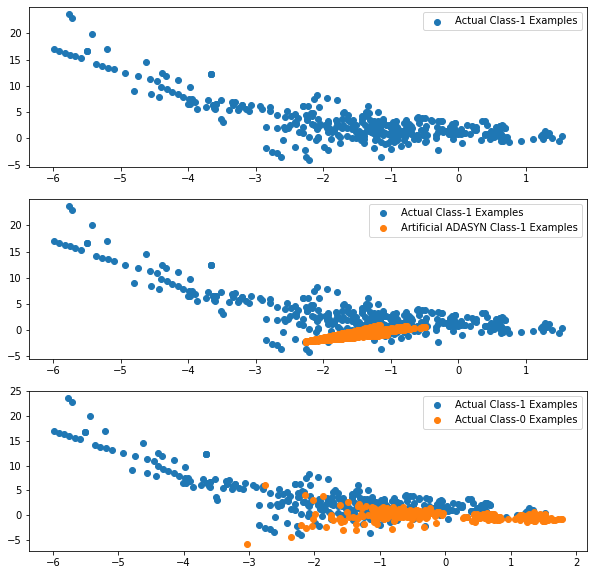

In [ ]:
# Instantiate ADASYN with random_state
ada = over_sampling.ADASYN(random_state=0)

# Fit and resample the training data using ADASYN
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

# Get the actual samples of class 1 and class 0 from the original training data
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# Set figure size for plotting
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()

# Plot actual Class-1 examples in the first subplot
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

# Plot actual and artificial Class-1 examples in the second subplot
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
X_train_adasyn_1_np = X_train_adasyn_1.to_numpy()
plt.scatter(X_train_adasyn_1_np[:X_train_1.shape[0], 0], X_train_adasyn_1_np[:X_train_1.shape[0], 1], label='Artificial ADASYN Class-1 Examples')
plt.legend()

# Plot actual Class-1 and Class-0 examples in the third subplot
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#Create Dataframe for X_ADASYN
X_train_adasyn = pd.DataFrame(data=X_train_adasyn,columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

In [ ]:
Data_Imbalance_Handling = "ADASYN Oversampling"

Logistic Regression with L1 Regularisation
Max auc_roc for l1: 0.5
----------------------------------------------------------------------------------------------------
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])}
----------------------------------------------------------------------------------------------------
Accuracy

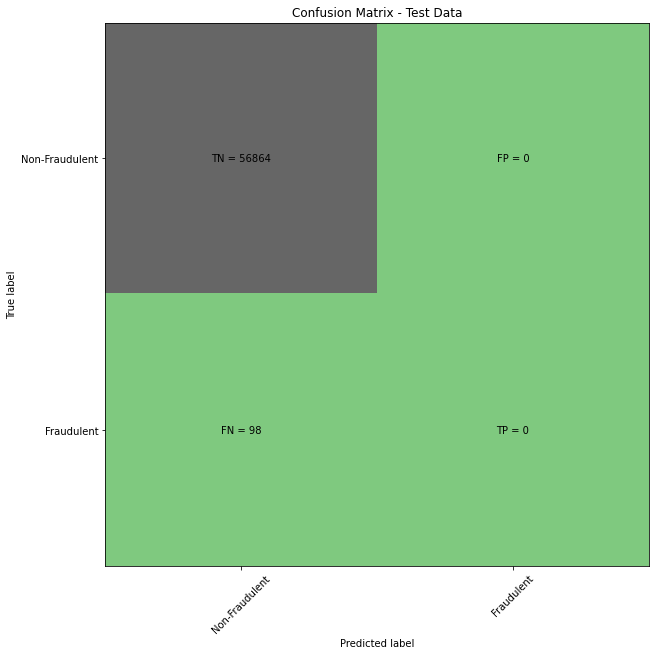


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 50.0%
Threshold : inf
----------------------------------------------------------------------------------------------------


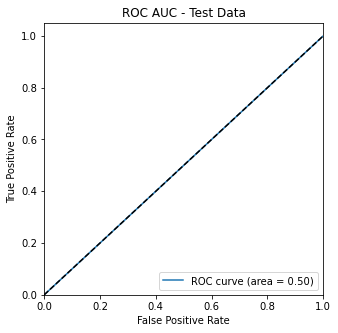

Time Taken by Model: --- 50.29456281661987 seconds ---


In [ ]:
# Logistic Regression with L1 Regularisation for Balanced Data using ADASYN Oversampling
print("Logistic Regression with L1 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL1PipeLine(df_Results,Data_Imbalance_Handling,X_train_adasyn,y_train_adasyn,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Logistic Regression with L2 Regularisation
Max auc_roc for l2: 0.5
----------------------------------------------------------------------------------------------------
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])}
----------------------------------------------------------------------------------------------------
Accuracy

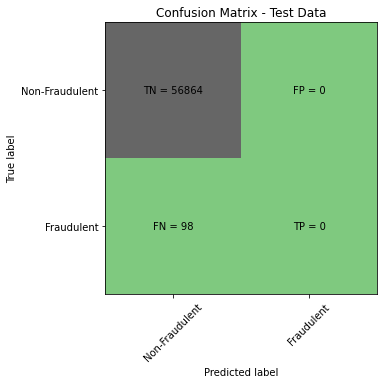


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 50.0%
Threshold : inf
----------------------------------------------------------------------------------------------------


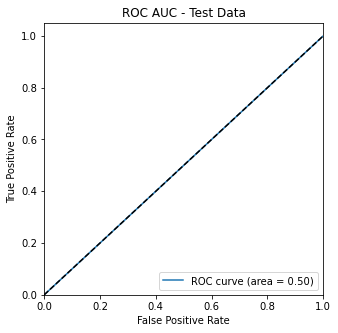

Time Taken by Model: --- 29.354656457901 seconds ---


In [ ]:
# Logistic Regression with L2 Regularisation for Balanced Data using ADASYN Oversampling
print("Logistic Regression with L2 Regularisation")
print('='*100 )
start_time = time.time()
df_Results = LogisticRegressionWithL2PipeLine(df_Results,Data_Imbalance_Handling,X_train_adasyn,y_train_adasyn,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

KNN Model
Accuracy of KNN model: 0.9978757768336786
----------------------------------------------------------------------------------------------------

Confusion Matrix


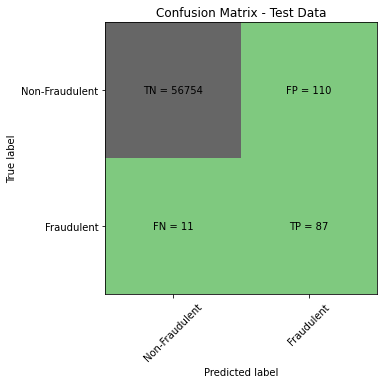


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.89      0.59        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 94.8%
Threshold : 0.4
----------------------------------------------------------------------------------------------------


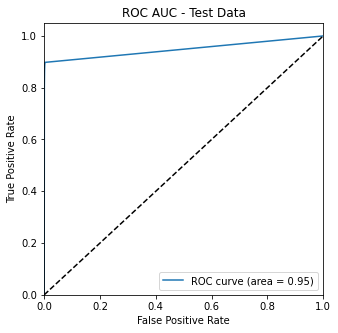

Time Taken by Model: --- 83.07826924324036 seconds ---


In [ ]:
# KNN Model for Balanced Data using ADASYN Oversampling
print("KNN Model")
print('='*100 )
start_time = time.time()
df_Results = KNNPipeLine(df_Results,Data_Imbalance_Handling,X_train_adasyn,y_train_adasyn,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
#SVM Model with Sigmoid Kernel for Balanced Data using ADASYN Oversampling
#print("SVM Model with Sigmoid Kernel")
#print('='*100 )
#start_time = time.time()
#df_Results = SVMPipeLine(df_Results,Data_Imbalance_Handling,X_train_adasyn,y_train_adasyn,X_test,y_test)
#print('='*100 )
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

### <font color='red'>Observation</font> : SVM (Support Vector Machine) models execution is taking quite a bit of time with balanced data. It is very difficult to complete 1 instance of execution. This is becoming bottleneck for completing this project and hence, we are not executing with balanced data.

Decision Tree Models with  'gini' & 'entropy' criteria
Decision Tree with gini Accuracy: 0.9979459990871107
----------------------------------------------------------------------------------------------------

Confusion Matrix


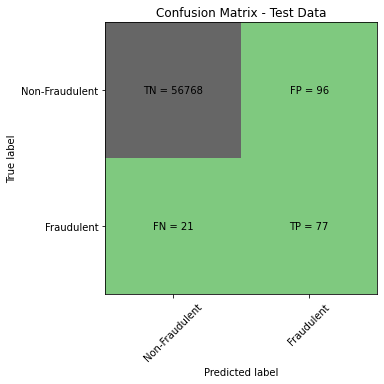


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.79      0.57        98

    accuracy                           1.00     56962
   macro avg       0.72      0.89      0.78     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 89.2%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


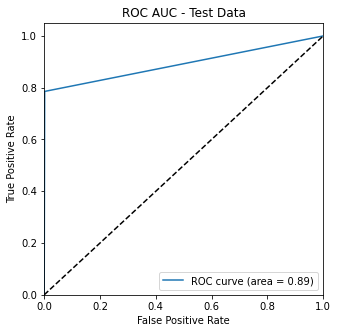

Decision Tree with entropy Accuracy: 0.9978055545802464
----------------------------------------------------------------------------------------------------

Confusion Matrix


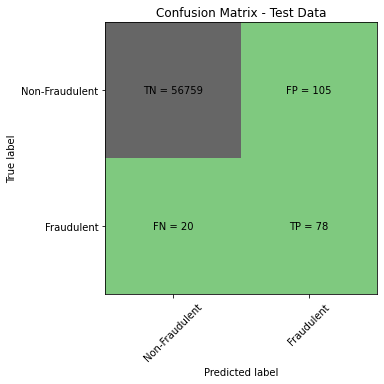


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.80      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 89.7%
Threshold : 1.0
----------------------------------------------------------------------------------------------------


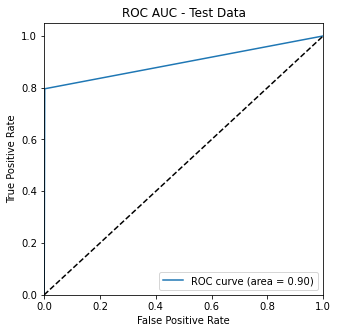

Time Taken by Model: --- 146.16699886322021 seconds ---


In [ ]:
# Decision Tree Models with  'gini' & 'entropy' criteria for Balanced Data using ADASYN Oversampling
print("Decision Tree Models with  'gini' & 'entropy' criteria")
print('='*100 )
start_time = time.time()
df_Results = DecisionTreePipeLine(df_Results,Data_Imbalance_Handling,X_train_adasyn,y_train_adasyn,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Random Forest Model Accuracy: 0.9994557775359011
----------------------------------------------------------------------------------------------------

Confusion Matrix


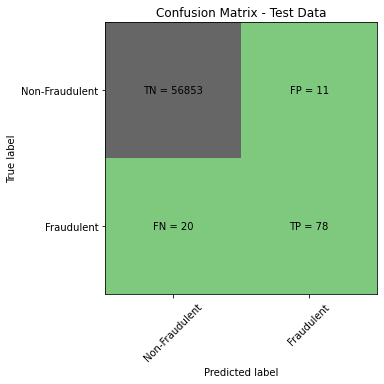


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 96.4%
Threshold : 0.1
----------------------------------------------------------------------------------------------------


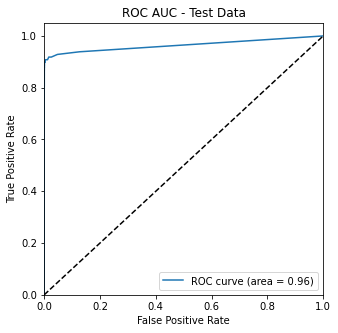

Time Taken by Model: --- 95.38603591918945 seconds ---


In [ ]:
# Random Forest Model for Balanced Data using ADASYN Oversampling
print("Random Forest Model")
print('='*100 )
start_time = time.time()
df_Results = RandomForestPipeLine(df_Results,Data_Imbalance_Handling,X_train_adasyn,y_train_adasyn,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[10:19:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy: 0.9990168884519505
----------------------------------------------------------------------------------------------------

Confusion Matrix


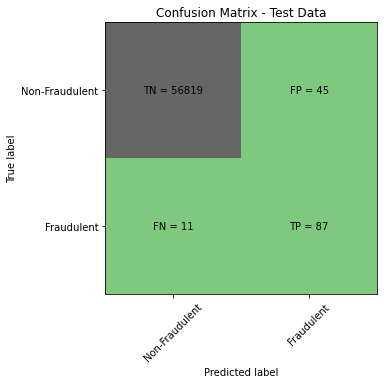


Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.66      0.89      0.76        98

    accuracy                           1.00     56962
   macro avg       0.83      0.94      0.88     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------------------------------------------------------------------
ROC       : 97.6%
Threshold : 0.001145575
----------------------------------------------------------------------------------------------------


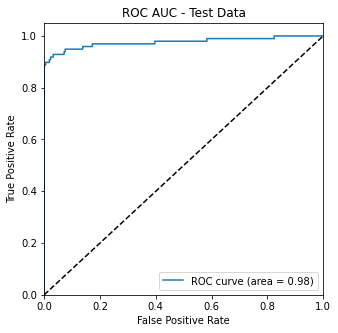

Time Taken by Model: --- 70.58670353889465 seconds ---


In [ ]:
# XGBoost Model for Balanced Data using ADASYN Oversampling
print("XGBoost Model")
print('='*100 )
start_time = time.time()
df_Results = XGBoostPipeLine(df_Results,Data_Imbalance_Handling,X_train_adasyn,y_train_adasyn,X_test,y_test)
print('='*100 )
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Sorting the results of all model, where we used ADASYN Oversampling
df_Results[df_Results['Data_Imbalance_Handling']=='ADASYN Oversampling'].sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling                                       Model  \
52     ADASYN Oversampling                                     XGBoost   
51     ADASYN Oversampling                               Random Forest   
48     ADASYN Oversampling                                         KNN   
50     ADASYN Oversampling            Tree Model with entropy criteria   
49     ADASYN Oversampling               Tree Model with gini criteria   
46     ADASYN Oversampling  Logistic Regression with L1 Regularisation   
47     ADASYN Oversampling  Logistic Regression with L2 Regularisation   

    Accuracy  Roc_Value  Threshold  
52  0.999017   0.976089   0.001146  
51  0.999456   0.964013   0.100000  
48  0.997876   0.948470   0.400000  
50  0.997806   0.897036   1.000000  
49  0.997946   0.892013   1.000000  
46  0.998280   0.500000        inf  
47  0.998280   0.500000        inf

### <font color='blue'>Observation</font> : Again, we can see XGBoost is doing good compared to other models.

In [ ]:
# Sorting the results of all model done so far
df_Results.sort_values(by='Roc_Value',ascending=False)

Data_Imbalance_Handling  \
15    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
0                  Power Transformer   
33               Random Oversampling   
31              Random Undersampling   
45                SMOTE Oversampling   
52               ADASYN Oversampling   
30              Random Undersampling   
1                  Power Transformer   
8     RepeatedKFold Cross Validation   
44                SMOTE Oversampling   
7                  Power Transformer   
26              Random Undersampling   
51               ADASYN Oversampling   
17  StratifiedKFold Cross Validation   
38               Random Oversampling   
6                  Power Transformer   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
2                  Power Transformer   
35               Random Oversampling   
41                SMOTE Oversampling   
48               ADASYN Oversampling   
28              Random Undersampling   
16  StratifiedKFold Cross Validation   
29              Random Undersampling   
27              Random Undersampling   
5                  Power Transformer   
13    RepeatedKFold Cross Validation   
43                SMOTE Oversampling   
23  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
50               ADASYN Oversampling   
42                SMOTE Oversampling   
49               ADASYN Oversampling   
37               Random Oversampling   
12    RepeatedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
4                  Power Transformer   
36               Random Oversampling   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
3                  Power Transformer   
34               Random Oversampling   
39                SMOTE Oversampling   
40                SMOTE Oversampling   
25              Random Undersampling   
24              Random Undersampling   
46               ADASYN Oversampling   
47               ADASYN Oversampling   
32               Random Oversampling   

                                         Model  Accuracy  Roc_Value  Threshold  
15                                     XGBoost  0.999684   0.985705   0.001153  
14                               Random Forest  0.999649   0.979328   0.030000  
0   Logistic Regression with L1 Regularisation  0.999210   0.979259   0.003811  
33                                     XGBoost  0.999579   0.979212   0.000205  
31                                     XGBoost  0.984885   0.977804   0.346241  
45                                     XGBoost  0.999175   0.977431   0.190078  
52                                     XGBoost  0.999017   0.976089   0.001146  
30                               Random Forest  0.991468   0.974832   0.510000  
1   Logistic Regression with L2 Regularisation  0.999087   0.973701   0.011897  
8   Logistic Regression with L1 Regularisation  0.998999   0.972189   0.013335  
44                               Random Forest  0.999491   0.969191   0.060000  
7                                      XGBoost  0.999561   0.968647   0.000179  
26                                         KNN  0.987992   0.967309   0.800000  
51                               Random Forest  0.999456   0.964013   0.100000  
17                                     XGBoost  0.999403   0.964013   0.000048  
38                               Random Forest  0.999561   0.962698   0.010000  
6                                Random Forest  0.999614   0.952811   0.030000  
9   Logistic Regression with L2 Regularisation  0.998929   0.952232   0.011349  
10                                         KNN  0.999596   0.950415   0.200000  
2                                          KNN  0.999473   0.948860   0.200000  
35                                         KNN  0.999157   0.948818   0.200000  
41                                         KNN  0.997876   0.948477   

### <font color='blue'>Observation</font> :  XGBoost on RepeatedKFold Cross Validation has the overall best roc value.



## Inference from all the modelling done so far :
1. We can see that among all the models we tried (Logistic Regression, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well.
2. More specifically **Logistic regression and XGBoost** performed best in terms of ROC-AUC score.
3. Undersampling is not always preferred because it reduces the size of the majority class, potentially leading to loss of important information and decreased performance on the majority class. Hence, we do not prefer to move ahead with undersampling.
4. Selecting the oversampling method which shows the best result on a model. Accuracy is not a good metric for imbalanced datasets. Hence, only focusing on results of balanced data.
5. SVM model for balanced data is taking immense time and due to computational limitation, we did not execute for balanced data.

We will move ahead with tuning of model mentioned in the below table.

| Sampling Method | Model |
|----------|----------|
| Random Oversampling    | XGBoost  |  
| SMOTE Oversampling     | XGBoost  |
| ADASYN Oversampling    | XGBoost  |
| Random Oversampling    | Logistic Regression  |  
| SMOTE Oversampling     | Logistic Regression  |
| ADASYN Oversampling    | Logistic Regression  |

## Tuning XGboost Model on SMOTE Oversampling data

In [ ]:
# For XGBoost : Tuning the hyperparameter max_depth and min_child_weight

# Defining the hyper parameters
param_test = {
 'max_depth':range(3,15,3),
 'min_child_weight':range(2,8,3)
}

#Defining the model
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=np.nan, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV
cv_search1 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit  the model
cv_search1.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=3, max_leaves=None,
                                     min_child_weight=2, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 15, 3),
                         'min_child_weight': range(2, 8, 3)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search1.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6      19.654289      0.380301         0.907190        0.265328   
7      18.128355      0.651499         0.793220        0.247333   
4      16.772759      0.439990         0.733037        0.152735   
5      16.431515      0.497972         0.606379        0.035092   
2      12.346802      0.389747         0.586819        0.132015   
3      13.065847      0.353184         0.395483        0.023651   
1       9.531670      0.383866         0.273415        0.071955   
0       9.790282      0.590755         0.282999        0.072327   

  param_max_depth param_min_child_weight  \
6              12                      2   
7              12                      5   
4               9                      2   
5               9                      5   
2               6                      2   
3               6                      5   
1               3                      5   
0               3                      2   

                                     params  split0_test_score  \
6  {'max_depth': 12, 'min_child_weight': 2}           0.999999   
7  {'max_depth': 12, 'min_child_weight': 5}           0.999994   
4   {'max_depth': 9, 'min_child_weight': 2}           0.999994   
5   {'max_depth': 9, 'min_child_weight': 5}           0.999991   
2   {'max_depth': 6, 'min_child_weight': 2}           0.999944   
3   {'max_depth': 6, 'min_child_weight': 5}           0.999946   
1   {'max_depth': 3, 'min_child_weight': 5}           0.998663   
0   {'max_depth': 3, 'min_child_weight': 2}           0.998581   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
6           0.999976           0.999973           1.000000           0.999982   
7           0.999978           0.999969           0.999999           0.999984   
4           0.999974           0.999972           0.999998           0.999978   
5           0.999968           0.999966           0.999995           0.999979   
2           0.999916           0.999885           0.999957           0.999942   
3           0.999909           0.999897           0.999953           0.999930   
1           0.998450           0.998404           0.998633           0.998599   
0           0.998534           0.998362           0.998578           0.998576   

   mean_test_score  std_test_score  rank_test_score  
6         0.999986        0.000011                1  
7         0.999985        0.000011                2  
4         0.999983        0.000010                3  
5         0.999980        0.000012                4  
2         0.999929        0.000026                5  
3         0.999927        0.000021                6  
1         0.998550        0.000104                7  
0         0.998526        0.000084                8

In [ ]:
# printing the best parameters and best score
cv_search1.best_params_, cv_search1.best_score_

({'max_depth': 12, 'min_child_weight': 2}, 0.999986065426976)

In [ ]:
# define function to compare the current score and new score

def compare_score(new_score):
  global current_best_score # Declare current_best_score as global
  if current_best_score == new_score:
    print('Score is same')
  elif current_best_score < new_score:
    print('Current best score is {0}'.format(current_best_score))
    print('Score is improved')
    print('New score is {0}'.format(new_score))
    current_best_score = new_score
  else:
    print('New score is {0}'.format(new_score))
    print('Score is not improved')
    print('Current best score is {0}'.format(current_best_score))

In [ ]:
# Capturing best train score in current_best_score variable for further comparision
current_best_score = cv_search1.best_score_
current_best_score

0.999986065426976

In [ ]:
# For XGBoost : Retuning the hyperparameter max_depth = 12 and min_child_weight = 2
# In order to see if there are any best scenarios before and after

# Defining the hyper parameters
param_test = {
 'max_depth':range(11,14,1),
 'min_child_weight':range(1,4,1)
}

#Defining the model
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=np.nan, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV
cv_search2 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit  the model
cv_search2.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=11, max_leaves=None,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(11, 14),
                         'min_child_weight': range(1, 4)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search2.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      18.112876      0.738313         0.752158        0.119083   
6      20.487501      0.604556         0.857876        0.149581   
7      19.093609      0.413847         0.900644        0.224479   
0      20.055480      0.376993         0.903926        0.243291   
2      17.885040      0.926388         0.863751        0.258315   
4      18.827767      0.886279         0.864188        0.331608   
8      16.930805      2.982489         0.744021        0.223466   
3      29.956986      5.942982         1.395676        0.990038   
1      19.561390      0.660484         0.695464        0.036768   

  param_max_depth param_min_child_weight  \
5              12                      3   
6              13                      1   
7              13                      2   
0              11                      1   
2              11                      3   
4              12                      2   
8              13                      3   
3              12                      1   
1              11                      2   

                                     params  split0_test_score  \
5  {'max_depth': 12, 'min_child_weight': 3}           0.999999   
6  {'max_depth': 13, 'min_child_weight': 1}           0.999999   
7  {'max_depth': 13, 'min_child_weight': 2}           1.000000   
0  {'max_depth': 11, 'min_child_weight': 1}           0.999998   
2  {'max_depth': 11, 'min_child_weight': 3}           0.999998   
4  {'max_depth': 12, 'min_child_weight': 2}           0.999999   
8  {'max_depth': 13, 'min_child_weight': 3}           0.999999   
3  {'max_depth': 12, 'min_child_weight': 1}           0.999999   
1  {'max_depth': 11, 'min_child_weight': 2}           0.999999   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.999978           0.999976           1.000000           0.999984   
6           0.999976           0.999975           1.000000           0.999984   
7           0.999977           0.999972           1.000000           0.999983   
0           0.999976           0.999974           1.000000           0.999983   
2           0.999973           0.999975           1.000000           0.999985   
4           0.999976           0.999973           1.000000           0.999982   
8           0.999975           0.999973           1.000000           0.999984   
3           0.999979           0.999970           1.000000           0.999983   
1           0.999971           0.999974           1.000000           0.999985   

   mean_test_score  std_test_score  rank_test_score  
5         0.999987        0.000010                1  
6         0.999987        0.000011                2  
7         0.999986        0.000012                3  
0         0.999986        0.000011                4  
2         0.999986        0.000011                5  
4         0.999986        0.000011                6  
8         0.999986        0.000011                7  
3         0.999986        0.000012                8  
1         0.999986        0.000012                9

In [ ]:
# printing the best parameters and best score
cv_search2.best_params_, cv_search2.best_score_

({'max_depth': 12, 'min_child_weight': 3}, 0.9999873771376453)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search2.best_score_)


Current best score is 0.999986065426976
Score is improved
New score is 0.9999873771376453


In [ ]:
# For XGBoost : Tuning the hyperparameter n_estimators
# Defining the hyper parameters
param_test = {
 'n_estimators':range(50,210,50)
}

#Defining the model
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=np.nan, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV
cv_search3 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit  the model
cv_search3.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=12, max_leaves=None,
                                     min_child_weight=3, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=50,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1, param_grid={'n_estimators': range(50, 210, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search3.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      28.468876      1.497769         1.428701        0.444301   
2      28.295400      5.481984         1.157713        0.260898   
1      19.005861      0.597588         0.724201        0.009058   
0      12.993165      0.321536         0.570011        0.120497   

  param_n_estimators                 params  split0_test_score  \
3                200  {'n_estimators': 200}           1.000000   
2                150  {'n_estimators': 150}           1.000000   
1                100  {'n_estimators': 100}           0.999999   
0                 50   {'n_estimators': 50}           0.999986   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.999994           0.999988           1.000000           0.999987   
2           0.999988           0.999986           1.000000           0.999987   
1           0.999978           0.999976           1.000000           0.999984   
0           0.999931           0.999931           0.999969           0.999954   

   mean_test_score  std_test_score  rank_test_score  
3         0.999994        0.000006                1  
2         0.999992        0.000006                2  
1         0.999987        0.000010                3  
0         0.999954        0.000022                4

In [ ]:
# printing the best parameters and best score
cv_search3.best_params_, cv_search3.best_score_

({'n_estimators': 200}, 0.9999939032025033)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search3.best_score_)

Current best score is 0.9999873771376453
Score is improved
New score is 0.9999939032025033


In [ ]:
# For XGBoost : Tuning the hyperparameter learning_rate
# Defining the hyper parameters to be tested in GridSearchCV
param_test = {
 'learning_rate':[0.01,0.1,0.125,0.25,0.5,0.8]
}

# Defining the XGBoost model with initial parameters
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=np.nan, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV to find the best value of learning_rate
cv_search4 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit the GridSearchCV to the data to find the optimal learning_rate value
# X_train_smote and y_train_smote are the training data
cv_search4.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=12, max_leaves=None,
                                     min_child_weight=3, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.125, 0.25, 0.5, 0.8]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search4.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      23.405186      0.672507         1.132503        0.188918   
5      18.396577      1.927468         0.586592        0.072596   
4      20.896252      0.853306         0.814435        0.094786   
2      27.673313      0.383098         1.235588        0.009393   
1      28.755931      0.421938         1.300669        0.020420   
0      46.679776      0.836922         1.697212        0.276295   

  param_learning_rate                    params  split0_test_score  \
3            0.250000   {'learning_rate': 0.25}           1.000000   
5            0.800000    {'learning_rate': 0.8}           0.999999   
4            0.500000    {'learning_rate': 0.5}           1.000000   
2            0.125000  {'learning_rate': 0.125}           1.000000   
1            0.100000    {'learning_rate': 0.1}           1.000000   
0            0.010000   {'learning_rate': 0.01}           0.999885   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.999998           0.999991           1.000000           0.999990   
5           0.999996           0.999991           1.000000           0.999991   
4           0.999997           0.999991           1.000000           0.999990   
2           0.999997           0.999987           1.000000           0.999985   
1           0.999994           0.999988           1.000000           0.999987   
0           0.999865           0.999847           0.999904           0.999860   

   mean_test_score  std_test_score  rank_test_score  
3         0.999996        0.000004                1  
5         0.999995        0.000004                2  
4         0.999995        0.000004                3  
2         0.999994        0.000006                4  
1         0.999994        0.000006                5  
0         0.999872        0.000020                6

In [ ]:
# printing the best parameters and best score
cv_search4.best_params_, cv_search4.best_score_

({'learning_rate': 0.25}, 0.9999956931784852)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search4.best_score_)

Current best score is 0.9999939032025033
Score is improved
New score is 0.9999956931784852


In [ ]:
# For XGBoost : Tuning the hyperparameter subsample
# Defining the hyper parameters to be tested in GridSearchCV
param_test = {
 'subsample':[0.5,0.8,0.9,1]
}

# Defining the XGBoost model with initial parameters
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=np.nan, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV to find the best value of subsample
cv_search5 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit the GridSearchCV to the data to find the optimal subsample value
cv_search5.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.25, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=12, max_leaves=None,
                                     min_child_weight=3, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1, param_grid={'subsample': [0.5, 0.8, 0.9, 1]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search5.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      23.815949      0.759435         1.184069        0.309408   
3      24.083317      0.332933         0.944082        0.186529   
1      24.666717      0.604738         0.930344        0.045103   
0      24.882533      1.425715         1.183695        0.313091   

  param_subsample              params  split0_test_score  split1_test_score  \
2        0.900000  {'subsample': 0.9}           1.000000           0.999998   
3               1    {'subsample': 1}           1.000000           0.999998   
1        0.800000  {'subsample': 0.8}           1.000000           0.999998   
0        0.500000  {'subsample': 0.5}           0.999998           0.999999   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
2           0.999990           1.000000           0.999991         0.999996   
3           0.999991           1.000000           0.999990         0.999996   
1           0.999988           1.000000           0.999988         0.999995   
0           0.999982           1.000000           0.999991         0.999994   

   std_test_score  rank_test_score  
2        0.000004                1  
3        0.000004                2  
1        0.000006                3  
0        0.000007                4

In [ ]:
# printing the best parameters and best score
cv_search5.best_params_, cv_search5.best_score_

({'subsample': 0.9}, 0.9999958100736374)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search5.best_score_)

Current best score is 0.9999956931784852
Score is improved
New score is 0.9999958100736374


In [ ]:
#Evaluate XGboost model on train and test data

# Defining the XGBoost model with parameters tuned
clf = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=np.nan, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1,
              eval_metric='auc')
# Fit the model
clf.fit(X_train_smote, y_train_smote)

# Find the accuracy
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Predict the labels for the test dataset
y_pred = clf.predict(X_test)

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
f1_value = f1_score(y_test, y_pred)
print("F1 Score: {0}".format(f1_value))
precision_value = precision_score(y_test, y_pred)
print("Precision Score: {0}".format(precision_value))
recall_value = recall_score(y_test, y_pred)
print("Recall Score: {0}".format(recall_value))

Model Accuracy: 0.999385555282469
XGboost roc_value: 0.9782431121013403
XGBoost threshold: 0.0018815267831087112
F1 Score: 0.8325358851674641
Precision Score: 0.7837837837837838
Recall Score: 0.8877551020408163


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


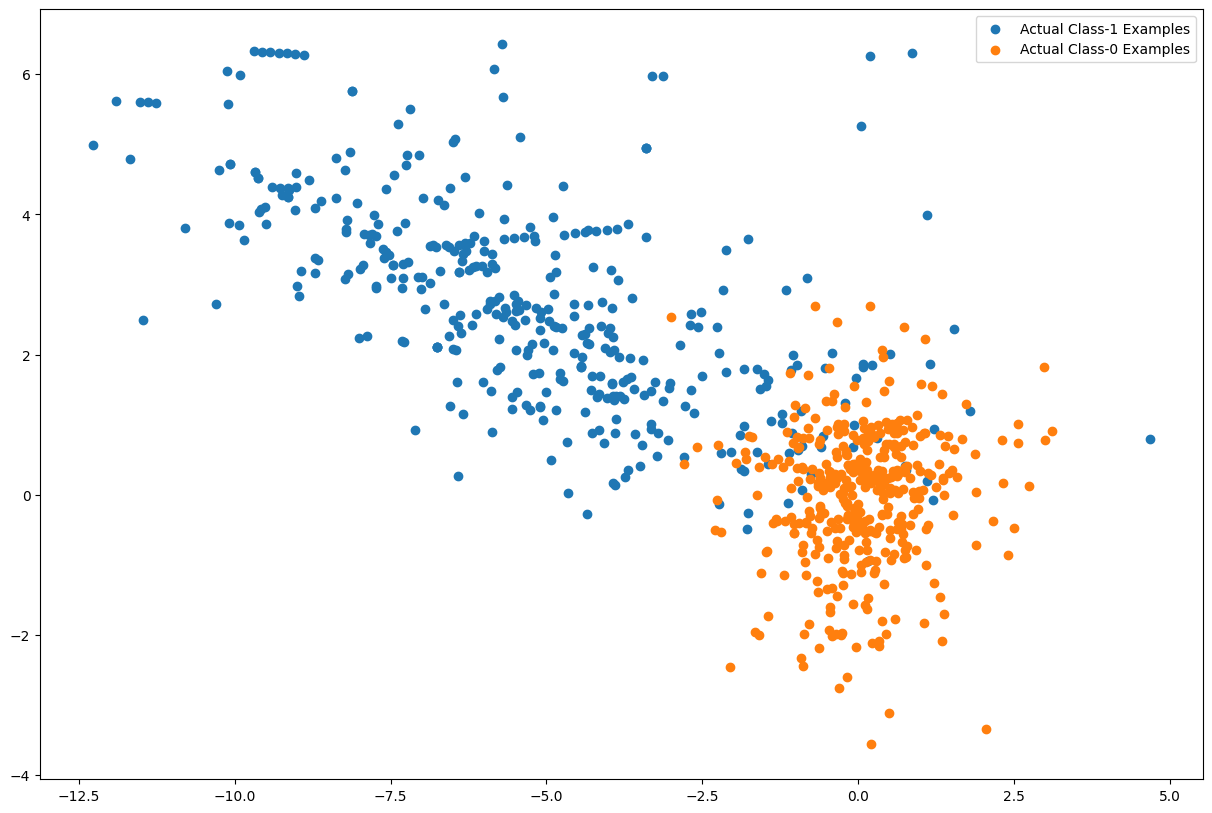

In [ ]:
# Initialize an empty list to store feature importances
var_imp = []

# Loop through the feature importances of the classifier and append to the list
for i in clf.feature_importances_:
    var_imp.append(i)

# Print the top 3 most important features
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Get the indices of the top and second top features
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

# Convert training data to NumPy arrays based on class labels (1.0 and 0.0)
X_train_1 = X_train.to_numpy()[np.where(y_train == 1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train == 0.0)]

# Shuffle the class-0 training data for randomness
np.random.shuffle(X_train_0)

# Set the size of the plot
plt.rcParams['figure.figsize'] = [15, 10]

# Scatter plot for Class-1 examples using top two features
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')

# Scatter plot for Class-0 examples using top two features
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')

# Add legend to the plot
plt.legend()


### <font color='blue'>Observation</font> : XGBoost on Balanced Data using SMOTE (learning_rate=0.25,max_depth=12,min_child_weight=3,n_estimators=200,subsample=0.9) has follwing accuracy, roc value and threshold.

Model Accuracy: 0.999385555282469

XGboost roc_value: 0.9782431121013403

XGBoost threshold: 0.0018815267831087112

F1 Score: 0.8325358851674641

Precision Score: 0.7837837837837838

Recall Score: 0.8877551020408163

## Tuning XGboost Model on ADASYN Oversampling data

In [ ]:
# For XGBoost : Tuning the hyperparameter max_depth and min_child_weight

# Defining the hyper parameters
param_test = {
 'max_depth':range(2,10,3),
 'min_child_weight':range(3,7,2)
}

#Defining the model
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=np.nan, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV
cv_search1 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit  the model
cv_search1.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=2, max_leaves=None,
                                     min_child_weight=3, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 10, 3),
                         'min_child_weight': range(3, 7, 2)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search1.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      14.950985      0.031605         0.519394        0.051818   
4      15.606884      0.196064         0.771366        0.157688   
3      13.596001      3.254607         0.437287        0.128615   
2      10.884851      0.756455         0.371425        0.080734   
1       8.197363      0.772489         0.182626        0.047268   
0       8.046549      0.795759         0.161250        0.008446   

  param_max_depth param_min_child_weight  \
5               8                      5   
4               8                      3   
3               5                      5   
2               5                      3   
1               2                      5   
0               2                      3   

                                    params  split0_test_score  \
5  {'max_depth': 8, 'min_child_weight': 5}           0.987121   
4  {'max_depth': 8, 'min_child_weight': 3}           0.984512   
3  {'max_depth': 5, 'min_child_weight': 5}           0.987637   
2  {'max_depth': 5, 'min_child_weight': 3}           0.987462   
1  {'max_depth': 2, 'min_child_weight': 5}           0.960598   
0  {'max_depth': 2, 'min_child_weight': 3}           0.960598   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.992715           0.997033           0.999333           0.999708   
4           0.992914           0.996759           0.999327           0.999720   
3           0.979399           0.993600           0.997765           0.998968   
2           0.980821           0.991913           0.997531           0.999034   
1           0.963087           0.986236           0.974148           0.990853   
0           0.963087           0.986236           0.974148           0.990853   

   mean_test_score  std_test_score  rank_test_score  
5         0.995182        0.004737                1  
4         0.994646        0.005618                2  
3         0.991474        0.007222                3  
2         0.991352        0.006687                4  
1         0.974984        0.012063                5  
0         0.974984        0.012063                6

In [ ]:
# printing the best parameters and best score
cv_search1.best_params_, cv_search1.best_score_

({'max_depth': 8, 'min_child_weight': 5}, 0.9951821603561573)

In [ ]:
# Capturing best train score in current_best_score variable for further comparision
current_best_score = cv_search1.best_score_
current_best_score

0.9951821603561573

In [ ]:
# For XGBoost : Retuning the hyperparameter max_depth = 8 and min_child_weight = 5
# In order to see if there are any best scenarios before and after

# Defining the hyper parameters
param_test = {
 'max_depth':range(7,10,1),
 'min_child_weight':range(4,7,1)
}

#Defining the model
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=4, missing=np.nan, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV
cv_search2 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit  the model
cv_search2.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=7, max_leaves=None,
                                     min_child_weight=4, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(7, 10),
                         'min_child_weight': range(4, 7)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search2.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8      15.182446      0.394142         0.560794        0.069187   
6      16.090401      0.455098         0.681142        0.128040   
7      15.980008      0.606437         0.688394        0.136852   
4      14.958985      0.266076         0.566420        0.022111   
3      14.943888      0.192509         0.680971        0.167911   
5      14.939741      0.137635         0.711117        0.171990   
2      14.483710      1.072545         0.713178        0.147363   
1      13.685734      0.241989         0.695224        0.168423   
0      14.078506      0.222031         0.483573        0.006590   

  param_max_depth param_min_child_weight  \
8               9                      6   
6               9                      4   
7               9                      5   
4               8                      5   
3               8                      4   
5               8                      6   
2               7                      6   
1               7                      5   
0               7                      4   

                                    params  split0_test_score  \
8  {'max_depth': 9, 'min_child_weight': 6}           0.989633   
6  {'max_depth': 9, 'min_child_weight': 4}           0.988762   
7  {'max_depth': 9, 'min_child_weight': 5}           0.987910   
4  {'max_depth': 8, 'min_child_weight': 5}           0.987121   
3  {'max_depth': 8, 'min_child_weight': 4}           0.985698   
5  {'max_depth': 8, 'min_child_weight': 6}           0.985562   
2  {'max_depth': 7, 'min_child_weight': 6}           0.985844   
1  {'max_depth': 7, 'min_child_weight': 5}           0.984376   
0  {'max_depth': 7, 'min_child_weight': 4}           0.981973   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
8           0.994598           0.997831           0.999341           0.999795   
6           0.995061           0.997819           0.999432           0.999743   
7           0.993954           0.997171           0.999360           0.999773   
4           0.992715           0.997033           0.999333           0.999708   
3           0.992921           0.996750           0.999346           0.999754   
5           0.991981           0.996763           0.999237           0.999787   
2           0.989345           0.995211           0.999121           0.999614   
1           0.987766           0.994445           0.999108           0.999597   
0           0.987774           0.995755           0.999234           0.999640   

   mean_test_score  std_test_score  rank_test_score  
8         0.996239        0.003772                1  
6         0.996163        0.004055                2  
7         0.995634        0.004378                3  
4         0.995182        0.004737                4  
3         0.994894        0.005203                5  
5         0.994666        0.005322                6  
2         0.993827        0.005427                7  
1         0.993058        0.006077                8  
0         0.992875        0.006919                9

In [ ]:
# printing the best parameters and best score
cv_search2.best_params_, cv_search2.best_score_

({'max_depth': 9, 'min_child_weight': 6}, 0.9962394383784327)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search2.best_score_)

Current best score is 0.9951821603561573
Score is improved
New score is 0.9962394383784327


In [ ]:
# For XGBoost : Tuning the hyperparameter n_estimators
# Defining the hyper parameters
param_test = {
 'n_estimators':range(60,190,30)
}

#Defining the model
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=6, missing=np.nan, n_estimators=60, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV
cv_search3 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit  the model
cv_search3.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=9, max_leaves=None,
                                     min_child_weight=6, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=60,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1, param_grid={'n_estimators': range(60, 190, 30)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search3.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      20.428503      3.541895         1.012727        0.245649   
3      20.347369      0.301046         0.867525        0.127142   
2      17.437405      0.512657         0.740269        0.077598   
1      14.265595      0.107935         0.510387        0.024677   
0      16.915126      4.071941         0.443546        0.067077   

  param_n_estimators                 params  split0_test_score  \
4                180  {'n_estimators': 180}           0.991551   
3                150  {'n_estimators': 150}           0.991528   
2                120  {'n_estimators': 120}           0.990622   
1                 90   {'n_estimators': 90}           0.988972   
0                 60   {'n_estimators': 60}           0.982644   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4           0.998459           0.999056           0.999777           0.999917   
3           0.997543           0.998712           0.999697           0.999895   
2           0.996000           0.998215           0.999520           0.999852   
1           0.992128           0.997303           0.999201           0.999770   
0           0.986136           0.995469           0.998458           0.999563   

   mean_test_score  std_test_score  rank_test_score  
4         0.997752        0.003144                1  
3         0.997475        0.003088                2  
2         0.996842        0.003392                3  
1         0.995475        0.004223                4  
0         0.992454        0.006809                5

In [ ]:
# printing the best parameters and best score
cv_search3.best_params_, cv_search3.best_score_

({'n_estimators': 180}, 0.9977519139712978)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search3.best_score_)

Current best score is 0.9962394383784327
Score is improved
New score is 0.9977519139712978


In [ ]:
# For XGBoost : Tuning the hyperparameter learning_rate
# Defining the hyper parameters to be tested in GridSearchCV
param_test = {
 'learning_rate':[0.01,0.1,0.25,0.5,0.8]
}

# Defining the XGBoost model with initial parameters
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=6, missing=np.nan, n_estimators=180, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV to find the best value of learning_rate
cv_search4 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit the GridSearchCV to the data to find the optimal learning_rate value
cv_search4.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=9, max_leaves=None,
                                     min_child_weight=6, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=180,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.25, 0.5, 0.8]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search4.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      23.713443      1.812264         1.260274        0.514702   
1      25.885403      0.704914         1.284839        0.238779   
3      20.343465      0.675020         0.809555        0.174394   
4      18.364520      3.012607         0.596854        0.137151   
0      34.948844      0.453540         1.466468        0.379664   

  param_learning_rate                   params  split0_test_score  \
2            0.250000  {'learning_rate': 0.25}           0.992078   
1            0.100000   {'learning_rate': 0.1}           0.990529   
3            0.500000   {'learning_rate': 0.5}           0.988611   
4            0.800000   {'learning_rate': 0.8}           0.986205   
0            0.010000  {'learning_rate': 0.01}           0.950293   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
2           0.999553           0.999505           0.999842           0.999948   
1           0.998459           0.999167           0.999777           0.999917   
3           0.999553           0.999258           0.999832           0.999933   
4           0.999540           0.998620           0.999816           0.999915   
0           0.958727           0.990158           0.993429           0.998155   

   mean_test_score  std_test_score  rank_test_score  
2         0.998185        0.003058                1  
1         0.997570        0.003558                2  
3         0.997438        0.004420                3  
4         0.996819        0.005327                4  
0         0.978152        0.019653                5

In [ ]:
# printing the best parameters and best score
cv_search4.best_params_, cv_search4.best_score_

({'learning_rate': 0.25}, 0.9981852518623546)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search4.best_score_)

Current best score is 0.9977519139712978
Score is improved
New score is 0.9981852518623546


In [ ]:
# For XGBoost : Tuning the hyperparameter subsample
# Defining the hyper parameters to be tested in GridSearchCV
param_test = {
 'subsample':[0.5,0.8,0.9,1]
}

# Defining the XGBoost model with initial parameters
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=9,
              min_child_weight=6, missing=np.nan, n_estimators=180, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV to find the best value of subsample
cv_search5 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit the GridSearchCV to the data to find the optimal subsample value
cv_search5.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.25, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=9, max_leaves=None,
                                     min_child_weight=6, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=180,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1, param_grid={'subsample': [0.5, 0.8, 0.9, 1]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search5.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      22.508100      1.246716         1.022745        0.306294   
2      24.834398      1.786385         1.183681        0.293602   
0      25.884248      1.602962         1.092711        0.247084   
1      34.962783      4.616820         1.443022        0.485709   

  param_subsample              params  split0_test_score  split1_test_score  \
3               1    {'subsample': 1}           0.992078           0.999553   
2        0.900000  {'subsample': 0.9}           0.988917           0.999557   
0        0.500000  {'subsample': 0.5}           0.988200           0.999222   
1        0.800000  {'subsample': 0.8}           0.986786           0.999609   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
3           0.999505           0.999842           0.999948         0.998185   
2           0.999471           0.999856           0.999937         0.997548   
0           0.998703           0.999893           0.999940         0.997192   
1           0.999438           0.999867           0.999945         0.997129   

   std_test_score  rank_test_score  
3        0.003058                1  
2        0.004319                2  
0        0.004519                3  
1        0.005175                4

In [ ]:
# printing the best parameters and best score
cv_search5.best_params_, cv_search5.best_score_

({'subsample': 1}, 0.9981852518623546)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search5.best_score_)

Score is same


In [ ]:
#Evaluate XGboost model on train and test data

# Defining the XGBoost model with parameters tuned
clf = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=9,
              min_child_weight=6, missing=np.nan, n_estimators=180, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Fit the model
clf.fit(X_train_adasyn, y_train_adasyn)

# Find the accuracy
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Predict the labels for the test dataset
y_pred = clf.predict(X_test)

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
f1_value = f1_score(y_test, y_pred)
print("F1 Score: {0}".format(f1_value))
precision_value = precision_score(y_test, y_pred)
print("Precision Score: {0}".format(precision_value))
recall_value = recall_score(y_test, y_pred)
print("Recall Score: {0}".format(recall_value))

Model Accuracy: 0.9992451107756047
XGboost roc_value: 0.9795575623327553
XGBoost threshold: 0.0006562943453900516
F1 Score: 0.7942583732057418
Precision Score: 0.7477477477477478
Recall Score: 0.8469387755102041


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


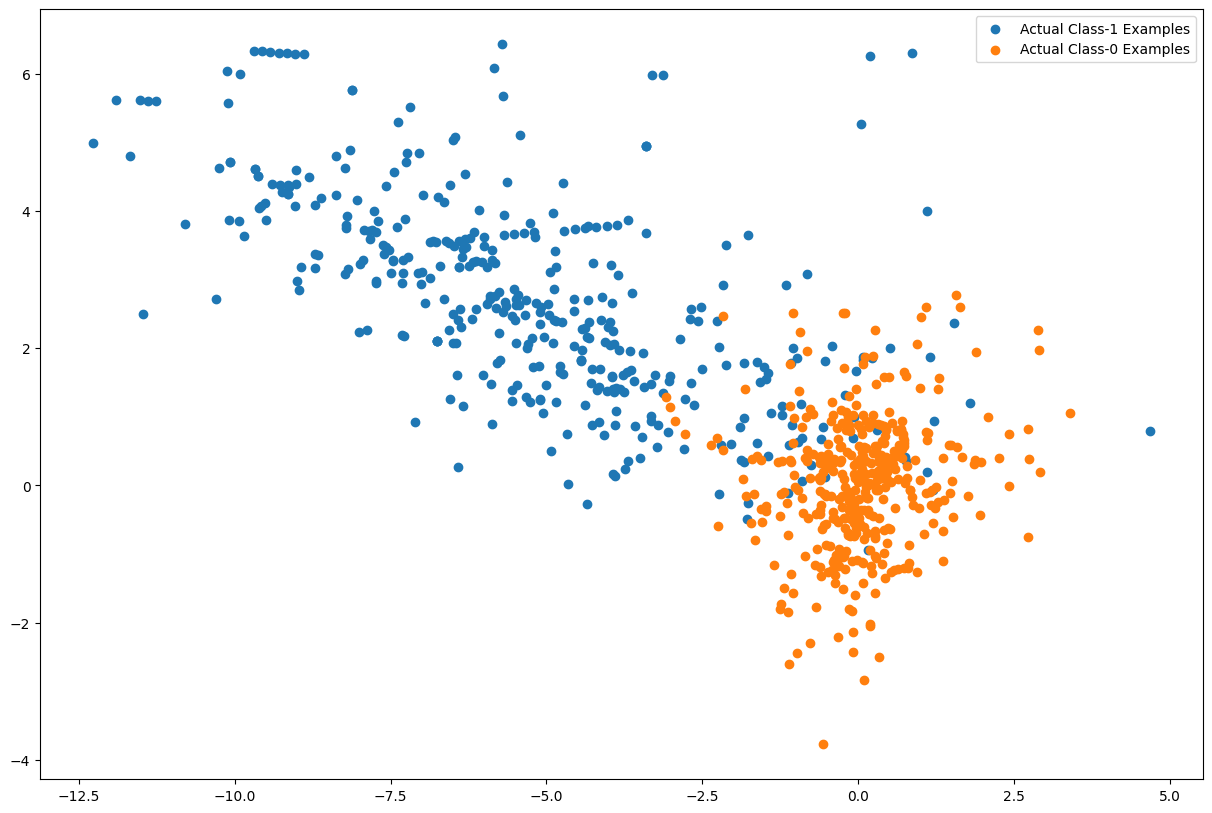

In [ ]:
# Initialize an empty list to store feature importances
var_imp = []

# Loop through the feature importances of the classifier and append to the list
for i in clf.feature_importances_:
    var_imp.append(i)

# Print the top 3 most important features
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Get the indices of the top and second top features
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

# Convert training data to NumPy arrays based on class labels (1.0 and 0.0)
X_train_1 = X_train.to_numpy()[np.where(y_train == 1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train == 0.0)]

# Shuffle the class-0 training data for randomness
np.random.shuffle(X_train_0)

# Set the size of the plot
plt.rcParams['figure.figsize'] = [15, 10]

# Scatter plot for Class-1 examples using top two features
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')

# Scatter plot for Class-0 examples using top two features
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')

# Add legend to the plot
plt.legend()

### <font color='blue'>Observation</font> : XGBoost on Balanced Data using ADASYN (learning_rate=0.25,max_depth=9,min_child_weight=6,n_estimators=180,subsample=1) has follwing accuracy, roc value and threshold.

Model Accuracy: 0.9992451107756047

XGboost roc_value: 0.9795575623327553

XGBoost threshold: 0.0006562943453900516

F1 Score: 0.7942583732057418

Precision Score: 0.7477477477477478

Recall Score: 0.8469387755102041



## Tuning XGboost Model on Random Oversampling data

In [ ]:
# For XGBoost : Tuning the hyperparameter max_depth and min_child_weight

# Defining the hyper parameters
param_test = {
 'max_depth':range(3,12,4),
 'min_child_weight':range(2,10,3)
}

#Defining the model
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=np.nan, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV
cv_search1 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit  the model
cv_search1.fit(X_over, y_over)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=3, max_leaves=None,
                                     min_child_weight=2, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 12, 4),
                         'min_child_weight': range(2, 10, 3)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search1.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6      10.342192      0.552647         0.504112        0.111568   
3      16.226666      3.679639         0.852071        0.331843   
7       9.859845      0.743228         0.525303        0.139792   
4      11.058867      2.014461         0.499619        0.119452   
8       9.817695      2.006701         0.440826        0.125256   
5       9.091122      0.839250         0.399463        0.105683   
0       8.697219      0.680628         0.267362        0.058187   
1       8.387327      1.422789         0.206014        0.035750   
2       8.226660      1.230683         0.381445        0.253681   

  param_max_depth param_min_child_weight  \
6              11                      2   
3               7                      2   
7              11                      5   
4               7                      5   
8              11                      8   
5               7                      8   
0               3                      2   
1               3                      5   
2               3                      8   

                                     params  split0_test_score  \
6  {'max_depth': 11, 'min_child_weight': 2}           1.000000   
3   {'max_depth': 7, 'min_child_weight': 2}           1.000000   
7  {'max_depth': 11, 'min_child_weight': 5}           0.999998   
4   {'max_depth': 7, 'min_child_weight': 5}           0.999999   
8  {'max_depth': 11, 'min_child_weight': 8}           0.999992   
5   {'max_depth': 7, 'min_child_weight': 8}           0.999989   
0   {'max_depth': 3, 'min_child_weight': 2}           0.999692   
1   {'max_depth': 3, 'min_child_weight': 5}           0.999695   
2   {'max_depth': 3, 'min_child_weight': 8}           0.999710   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
6           0.999986           0.999979           1.000000           0.999991   
3           0.999978           0.999982           1.000000           0.999985   
7           0.999973           0.999976           1.000000           0.999987   
4           0.999970           0.999970           0.999998           0.999986   
8           0.999964           0.999975           1.000000           0.999988   
5           0.999967           0.999966           0.999994           0.999979   
0           0.999681           0.999627           0.999726           0.999664   
1           0.999670           0.999606           0.999713           0.999693   
2           0.999675           0.999623           0.999699           0.999649   

   mean_test_score  std_test_score  rank_test_score  
6         0.999991        0.000008                1  
3         0.999989        0.000009                2  
7         0.999987        0.000011                3  
4         0.999985        0.000013                4  
8         0.999984        0.000013                5  
5         0.999979        0.000011                6  
0         0.999678        0.000033                7  
1         0.999675        0.000037                8  
2         0.999671        0.000032                9

In [ ]:
# printing the best parameters and best score
cv_search1.best_params_, cv_search1.best_score_

({'max_depth': 11, 'min_child_weight': 2}, 0.9999912965490786)

In [ ]:
# Capturing best train score in current_best_score variable for further comparision
current_best_score = cv_search1.best_score_
current_best_score

0.9999912965490786

In [ ]:
# For XGBoost : Retuning the hyperparameter max_depth = 11 and min_child_weight = 2
# In order to see if there are any best scenarios before and after

# Defining the hyper parameters
param_test = {
 'max_depth':range(10,13,1),
 'min_child_weight':range(1,4,1)
}

#Defining the model
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=np.nan, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV
cv_search2 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit  the model
cv_search2.fit(X_over, y_over)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=10, max_leaves=None,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 13),
                         'min_child_weight': range(1, 4)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search2.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6      11.231817      0.240385         0.443262        0.029903   
3      10.952433      0.505907         0.539426        0.140037   
1      10.953687      0.659472         0.584782        0.133908   
4      11.265807      0.689001         0.544798        0.156952   
0      12.453883      0.970584         0.530948        0.156948   
7      10.734818      0.566029         0.517485        0.143624   
8       9.555788      1.521203         0.416044        0.033153   
2      10.110351      0.687729         0.411673        0.024307   
5      10.361468      0.576296         0.545554        0.162796   

  param_max_depth param_min_child_weight  \
6              12                      1   
3              11                      1   
1              10                      2   
4              11                      2   
0              10                      1   
7              12                      2   
8              12                      3   
2              10                      3   
5              11                      3   

                                     params  split0_test_score  \
6  {'max_depth': 12, 'min_child_weight': 1}           1.000000   
3  {'max_depth': 11, 'min_child_weight': 1}           1.000000   
1  {'max_depth': 10, 'min_child_weight': 2}           1.000000   
4  {'max_depth': 11, 'min_child_weight': 2}           1.000000   
0  {'max_depth': 10, 'min_child_weight': 1}           1.000000   
7  {'max_depth': 12, 'min_child_weight': 2}           1.000000   
8  {'max_depth': 12, 'min_child_weight': 3}           1.000000   
2  {'max_depth': 10, 'min_child_weight': 3}           1.000000   
5  {'max_depth': 11, 'min_child_weight': 3}           1.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
6           0.999982           0.999987           1.000000           0.999995   
3           0.999983           0.999984           1.000000           0.999990   
1           0.999985           0.999982           1.000000           0.999990   
4           0.999986           0.999979           1.000000           0.999991   
0           0.999977           0.999985           1.000000           0.999993   
7           0.999980           0.999980           1.000000           0.999991   
8           0.999982           0.999974           1.000000           0.999988   
2           0.999978           0.999975           1.000000           0.999985   
5           0.999971           0.999974           1.000000           0.999984   

   mean_test_score  std_test_score  rank_test_score  
6         0.999993        0.000007                1  
3         0.999992        0.000007                2  
1         0.999991        0.000008                3  
4         0.999991        0.000008                4  
0         0.999991        0.000009                5  
7         0.999990        0.000009                6  
8         0.999989        0.000010                7  
2         0.999988        0.000011                8  
5         0.999986        0.000012                9

In [ ]:
# printing the best parameters and best score
cv_search2.best_params_, cv_search2.best_score_

({'max_depth': 12, 'min_child_weight': 1}, 0.9999926734131328)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search2.best_score_)

Current best score is 0.9999912965490786
Score is improved
New score is 0.9999926734131328


In [ ]:
# For XGBoost : Tuning the hyperparameter n_estimators
# Defining the hyper parameters
param_test = {
 'n_estimators':range(70,180,20)
}

#Defining the model
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=np.nan, n_estimators=70, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV
cv_search3 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit  the model
cv_search3.fit(X_over, y_over)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=12, max_leaves=None,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=70,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1, param_grid={'n_estimators': range(70, 180, 20)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search3.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5      16.766875      1.520926         0.635286        0.088760   
4      14.616328      0.166359         0.896496        0.164190   
3      17.713915      4.329066         0.792617        0.232940   
2      14.112557      3.345186         0.726991        0.179346   
1      14.084101      2.334061         0.739232        0.178600   
0       9.720263      1.499932         0.617115        0.227148   

  param_n_estimators                 params  split0_test_score  \
5                170  {'n_estimators': 170}           1.000000   
4                150  {'n_estimators': 150}           1.000000   
3                130  {'n_estimators': 130}           1.000000   
2                110  {'n_estimators': 110}           1.000000   
1                 90   {'n_estimators': 90}           1.000000   
0                 70   {'n_estimators': 70}           1.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.999992           0.999992           1.000000           0.999994   
4           0.999989           0.999989           1.000000           0.999994   
3           0.999986           0.999988           1.000000           0.999995   
2           0.999982           0.999987           1.000000           0.999995   
1           0.999978           0.999988           1.000000           0.999993   
0           0.999966           0.999967           1.000000           0.999991   

   mean_test_score  std_test_score  rank_test_score  
5         0.999995        0.000004                1  
4         0.999994        0.000005                2  
3         0.999994        0.000006                3  
2         0.999993        0.000007                4  
1         0.999992        0.000008                5  
0         0.999985        0.000015                6

In [ ]:
# printing the best parameters and best score
cv_search3.best_params_, cv_search3.best_score_

({'n_estimators': 170}, 0.9999954242417667)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search3.best_score_)

Current best score is 0.9999926734131328
Score is improved
New score is 0.9999954242417667


In [ ]:
# For XGBoost : Tuning the hyperparameter learning_rate
# Defining the hyper parameters to be tested in GridSearchCV
param_test = {
 'learning_rate':[0.01,0.05,0.1,0.125,0.25,0.5]
}

# Defining the XGBoost model with initial parameters
xgb_model = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=np.nan, n_estimators=170, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Setting up the GridSearchCV to find the best value of learning_rate
cv_search4 = GridSearchCV(
              estimator = xgb_model,
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=-1,
              verbose = 1,
              cv=5)

# Fit the GridSearchCV to the data to find the optimal learning_rate value
cv_search4.fit(X_over, y_over)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=12, max_leaves=None,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=170,
                                     n_jobs=-1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.125, 0.25, 0.5]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search4.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      15.023590      0.247384         0.827485        0.229810   
2      17.259569      2.774158         0.685036        0.013580   
4      12.807359      0.278971         0.528855        0.018357   
5      11.384627      0.980936         0.478639        0.144597   
1      24.845740      4.162762         1.257065        0.191143   
0      26.035009      2.844046         0.978083        0.160353   

  param_learning_rate                    params  split0_test_score  \
3            0.125000  {'learning_rate': 0.125}           1.000000   
2            0.100000    {'learning_rate': 0.1}           1.000000   
4            0.250000   {'learning_rate': 0.25}           1.000000   
5            0.500000    {'learning_rate': 0.5}           1.000000   
1            0.050000   {'learning_rate': 0.05}           1.000000   
0            0.010000   {'learning_rate': 0.01}           0.999913   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.999992           0.999993           1.000000           0.999992   
2           0.999992           0.999992           1.000000           0.999994   
4           0.999992           0.999984           1.000000           0.999995   
5           0.999993           0.999994           1.000000           0.999981   
1           0.999967           0.999977           1.000000           0.999992   
0           0.999887           0.999858           0.999931           0.999892   

   mean_test_score  std_test_score  rank_test_score  
3         0.999996        0.000004                1  
2         0.999995        0.000004                2  
4         0.999994        0.000006                3  
5         0.999994        0.000007                4  
1         0.999987        0.000013                5  
0         0.999896        0.000025                6

In [ ]:
# printing the best parameters and best score
cv_search4.best_params_, cv_search4.best_score_

({'learning_rate': 0.125}, 0.9999955017543998)

In [ ]:
# Compare the current best score and new score
compare_score(cv_search4.best_score_)

Current best score is 0.9999954242417667
Score is improved
New score is 0.9999955017543998


In [ ]:
#Evaluate XGboost model on train and test data

# Defining the XGBoost model with parameters tuned
clf = XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.125, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=np.nan, n_estimators=170, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              eval_metric='auc')

# Fit the model
clf.fit(X_over, y_over)

# Find the accuracy
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Predict the labels for the test dataset
y_pred = clf.predict(X_test)

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
f1_value = f1_score(y_test, y_pred)
print("F1 Score: {0}".format(f1_value))
precision_value = precision_score(y_test, y_pred)
print("Precision Score: {0}".format(precision_value))
recall_value = recall_score(y_test, y_pred)
print("Recall Score: {0}".format(recall_value))

Model Accuracy: 0.9995611109160493
XGboost roc_value: 0.9739772949134635
XGBoost threshold: 0.00011649489169940352
F1 Score: 0.8677248677248677
Precision Score: 0.9010989010989011
Recall Score: 0.8367346938775511


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


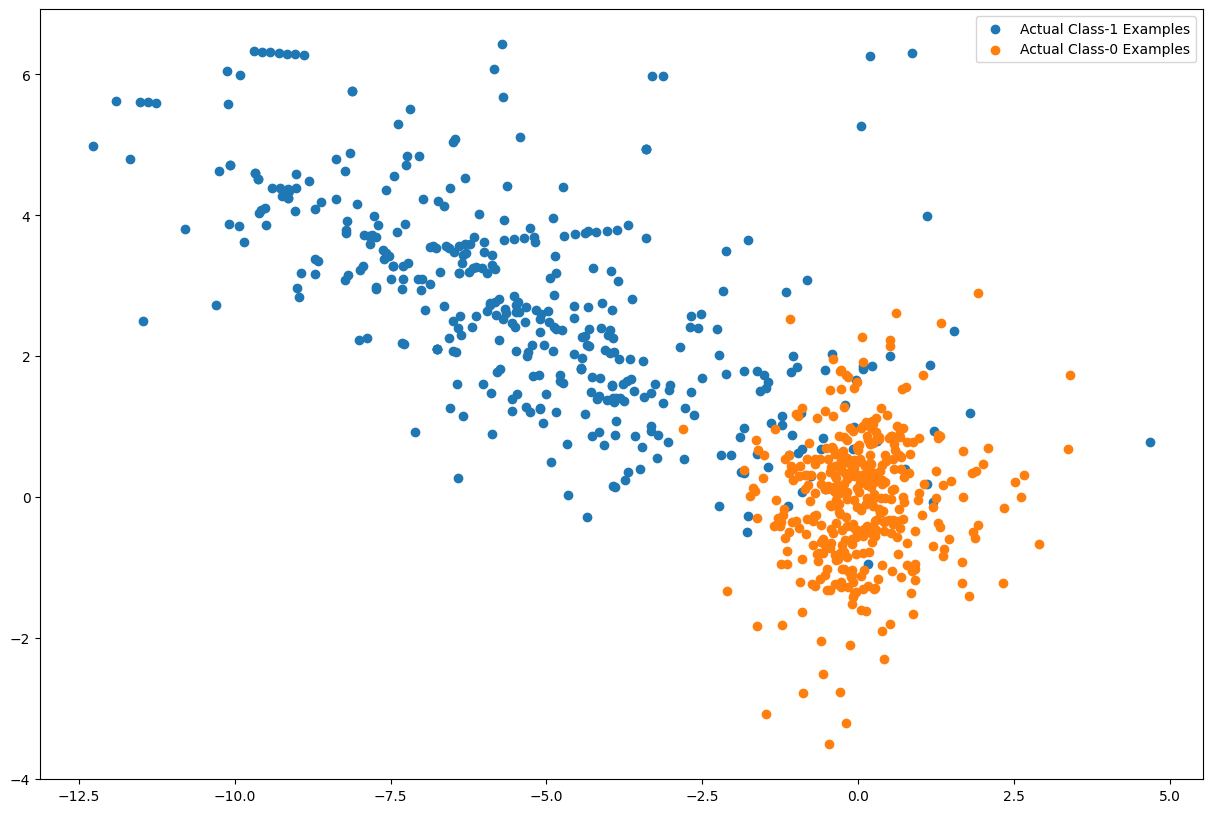

In [ ]:
# Initialize an empty list to store feature importances
var_imp = []

# Loop through the feature importances of the classifier and append to the list
for i in clf.feature_importances_:
    var_imp.append(i)

# Print the top 3 most important features
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Get the indices of the top and second top features
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

# Convert training data to NumPy arrays based on class labels (1.0 and 0.0)
X_train_1 = X_train.to_numpy()[np.where(y_train == 1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train == 0.0)]

# Shuffle the class-0 training data for randomness
np.random.shuffle(X_train_0)

# Set the size of the plot
plt.rcParams['figure.figsize'] = [15, 10]

# Scatter plot for Class-1 examples using top two features
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')

# Scatter plot for Class-0 examples using top two features
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')

# Add legend to the plot
plt.legend()

### <font color='blue'>Observation</font> : XGBoost on Balanced Data using Random Oversampling (learning_rate=0.125,max_depth=12,min_child_weight=1,n_estimators=170) has follwing accuracy, roc value and threshold.

Model Accuracy: 0.9995611109160493

XGboost roc_value: 0.9739772949134635

XGBoost threshold: 0.00011649489169940352

F1 Score: 0.8677248677248677

Precision Score: 0.9010989010989011

Recall Score: 0.8367346938775511


## Tuning Logistic Regression Model on SMOTE Oversampling data

In [ ]:
# For Logistic Regression : Tuning the hyperparameter C , Penalty and solver

# Defining the hyper parameters
param_test = {'C': [0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#Defining the model & Setting up the GridSearchCV
cv_search1 = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = param_test,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        n_jobs=-1,
                        pre_dispatch = 6,
                        return_train_score=True)

# Fit  the model
cv_search1.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch=6, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search1.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
11       4.393036      0.903783         0.112806        0.030881     1000   
9        3.842173      1.017544         0.099766        0.031166      100   
7        4.436248      1.041505         0.109208        0.050381       10   
5        4.642342      0.855021         0.106232        0.041313        1   
3        2.800362      0.127947         0.065141        0.006584 0.100000   
1        3.986096      0.601536         0.085761        0.023558 0.010000   
0        0.322174      0.044860         0.000000        0.000000 0.010000   
2        0.322609      0.045055         0.000000        0.000000 0.100000   
4        0.201646      0.032323         0.000000        0.000000        1   
6        0.263557      0.055853         0.000000        0.000000       10   
8        0.201744      0.033949         0.000000        0.000000      100   
10       0.304459      0.060828         0.000000        0.000000     1000   

   param_penalty                        params  split0_test_score  \
11            l2  {'C': 1000, 'penalty': 'l2'}           0.991182   
9             l2   {'C': 100, 'penalty': 'l2'}           0.991182   
7             l2    {'C': 10, 'penalty': 'l2'}           0.991182   
5             l2     {'C': 1, 'penalty': 'l2'}           0.991181   
3             l2   {'C': 0.1, 'penalty': 'l2'}           0.991170   
1             l2  {'C': 0.01, 'penalty': 'l2'}           0.991062   
0             l1  {'C': 0.01, 'penalty': 'l1'}                NaN   
2             l1   {'C': 0.1, 'penalty': 'l1'}                NaN   
4             l1     {'C': 1, 'penalty': 'l1'}                NaN   
6             l1    {'C': 10, 'penalty': 'l1'}                NaN   
8             l1   {'C': 100, 'penalty': 'l1'}                NaN   
10            l1  {'C': 1000, 'penalty': 'l1'}                NaN   

    split1_test_score  split2_test_score  split3_test_score  \
11           0.990503           0.990314           0.990788   
9            0.990503           0.990314           0.990788   
7            0.990503           0.990314           0.990788   
5            0.990502           0.990313           0.990787   
3            0.990491           0.990300           0.990778   
1            0.990390           0.990181           0.990683   
0                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   
6                 NaN                NaN                NaN   
8                 NaN                NaN                NaN   
10                NaN                NaN                NaN   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
11           0.990973         0.990752        0.000313                1   
9            0.990974         0.990752        0.000313                2   
7            0.990973         0.990752        0.000313                3   
5            0.990972         0.990751        0.000313                4   
3            0.990961         0.990740        0.000313                5   
1            0.990855         0.990634        0.000316                6   
0                 NaN              NaN             NaN                7   
2                 NaN              NaN             NaN                7   
4                 NaN              NaN             NaN                7   
6                 NaN              NaN             NaN                7   
8                 NaN              NaN             NaN                7   
10                NaN              NaN             NaN                7   

    split0_train_score  split1_train_score  split2_train_score  \
11            0.990641            0.990852            0.990850   
9             0.990641            0.990852            0.990850   
7             0.990641            0.990852            0.990850   
5             0.990640            0.990851  

In [ ]:
# printing the best parameters and best score
cv_search1.best_params_, cv_search1.best_score_

({'C': 1000, 'penalty': 'l2'}, 0.9907522914912039)

In [ ]:
#Evaluate Logistic Regression model on train and test data

# Defining the Logistic Regression model with parameters tuned
clf = LogisticRegression(C=1000,penalty='l2')

# Fit the model on train data
clf.fit(X_train_smote, y_train_smote)

LR_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(LR_test_score))

# Predict the labels for the test dataset
y_pred = clf.predict(X_test)

# Probabilities for each class
LR_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
LR_roc_value = roc_auc_score(y_test, LR_probs)

print("Logistic Regression roc_value: {0}" .format(LR_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, LR_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Logistic Regression threshold: {0}".format(threshold))
f1_value = f1_score(y_test, y_pred)
print("F1 Score: {0}".format(f1_value))
precision_value = precision_score(y_test, y_pred)
print("Precision Score: {0}".format(precision_value))
recall_value = recall_score(y_test, y_pred)
print("Recall Score: {0}".format(recall_value))

Model Accuracy: 0.9708226536989571
Logistic Regression roc_value: 0.9714740971655966
Logistic Regression threshold: 0.5367329209330659
F1 Score: 0.09771986970684039
Precision Score: 0.051605504587155966
Recall Score: 0.9183673469387755


### <font color='blue'>Observation</font> : Logistic Regression on Balanced Data using SMOTE Oversampling (C=1000,penalty='l2') has follwing accuracy, roc value and threshold.

Model Accuracy: 0.9708226536989571

Logistic Regression roc_value: 0.9714740971655966

Logistic Regression threshold: 0.5367329209330659

F1 Score: 0.09771986970684039

Precision Score: 0.051605504587155966

Recall Score: 0.9183673469387755


## Tuning Logistic Regression Model on ADASYN Oversampling data

In [ ]:
# For Logistic Regression : Tuning the hyperparameter C, Penalty

# Defining the hyper parameters
param_test = {'C': [0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#Defining the model & Setting up the GridSearchCV
cv_search1 = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = param_test,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        n_jobs=-1,
                        pre_dispatch = 6,
                        return_train_score=True)

# Fit  the model
cv_search1.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch=6, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search1.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
11       1.432277      0.214282         0.038508        0.007560     1000   
9        1.871824      0.340619         0.054435        0.018591      100   
7        1.526529      0.090853         0.043965        0.008531       10   
5        1.642801      0.242778         0.040206        0.002170        1   
3        1.639520      0.256106         0.043626        0.005334 0.100000   
1        2.405433      0.530432         0.053274        0.015252 0.010000   
0        0.773043      0.324704         0.000000        0.000000 0.010000   
2        0.195113      0.047898         0.000000        0.000000 0.100000   
4        0.198692      0.061236         0.000000        0.000000        1   
6        0.129776      0.020774         0.000000        0.000000       10   
8        0.132726      0.021120         0.000000        0.000000      100   
10       0.130950      0.022073         0.000000        0.000000     1000   

   param_penalty                        params  split0_test_score  \
11            l2  {'C': 1000, 'penalty': 'l2'}           0.968872   
9             l2   {'C': 100, 'penalty': 'l2'}           0.968872   
7             l2    {'C': 10, 'penalty': 'l2'}           0.968872   
5             l2     {'C': 1, 'penalty': 'l2'}           0.968870   
3             l2   {'C': 0.1, 'penalty': 'l2'}           0.968851   
1             l2  {'C': 0.01, 'penalty': 'l2'}           0.968640   
0             l1  {'C': 0.01, 'penalty': 'l1'}                NaN   
2             l1   {'C': 0.1, 'penalty': 'l1'}                NaN   
4             l1     {'C': 1, 'penalty': 'l1'}                NaN   
6             l1    {'C': 10, 'penalty': 'l1'}                NaN   
8             l1   {'C': 100, 'penalty': 'l1'}                NaN   
10            l1  {'C': 1000, 'penalty': 'l1'}                NaN   

    split1_test_score  split2_test_score  split3_test_score  \
11           0.967814           0.968267           0.968806   
9            0.967814           0.968267           0.968806   
7            0.967814           0.968267           0.968806   
5            0.967813           0.968266           0.968805   
3            0.967800           0.968250           0.968793   
1            0.967636           0.968051           0.968636   
0                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   
6                 NaN                NaN                NaN   
8                 NaN                NaN                NaN   
10                NaN                NaN                NaN   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
11           0.968618         0.968475        0.000392                1   
9            0.968618         0.968475        0.000392                2   
7            0.968618         0.968475        0.000392                3   
5            0.968616         0.968474        0.000392                4   
3            0.968595         0.968458        0.000390                5   
1            0.968359         0.968264        0.000382                6   
0                 NaN              NaN             NaN                7   
2                 NaN              NaN             NaN                7   
4                 NaN              NaN             NaN                7   
6                 NaN              NaN             NaN                7   
8                 NaN              NaN             NaN                7   
10                NaN              NaN             NaN                7   

    split0_train_score  split1_train_score  split2_train_score  \
11            0.968427            0.968647            0.968522   
9             0.968427            0.968647            0.968521   
7             0.968427            0.968646            0.968521   
5             0.968425            0.968645  

In [ ]:
# printing the best parameters and best score
cv_search1.best_params_, cv_search1.best_score_

({'C': 1000, 'penalty': 'l2'}, 0.9684754746011164)

In [ ]:
#Evaluate Logistic Regression model on train and test data

# Defining the Logistic Regression model with parameters tuned
clf = LogisticRegression(C=1000,penalty='l2')

# Fit the model on train data
clf.fit(X_train_adasyn, y_train_adasyn)

LR_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(LR_test_score))

# Predict the labels for the test dataset
y_pred = clf.predict(X_test)

# Probabilities for each class
LR_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
LR_roc_value = roc_auc_score(y_test, LR_probs)

print("Logistic Regression roc_value: {0}" .format(LR_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, LR_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Logistic Regression threshold: {0}".format(threshold))
f1_value = f1_score(y_test, y_pred)
print("F1 Score: {0}".format(f1_value))
precision_value = precision_score(y_test, y_pred)
print("Precision Score: {0}".format(precision_value))
recall_value = recall_score(y_test, y_pred)
print("Recall Score: {0}".format(recall_value))

Model Accuracy: 0.912064183139637
Logistic Regression roc_value: 0.9722052544990983
Logistic Regression threshold: 0.849760917115157
F1 Score: 0.03506068194952803
Precision Score: 0.017867661496171215
Recall Score: 0.9285714285714286


### <font color='blue'>Observation</font> :  Logistic Regression on Balanced Data using ADASYN Oversampling (C=1000,penalty='l2') has follwing accuracy, roc value and threshold.

Model Accuracy: 0.912064183139637

Logistic Regression roc_value: 0.9722052544990983

Logistic Regression threshold: 0.849760917115157

F1 Score: 0.03506068194952803

Precision Score: 0.017867661496171215

Recall Score: 0.9285714285714286


## Tuning Logistic Regression Model on Random Oversampling data

In [ ]:
# For Logistic Regression : Tuning the hyperparameter C

# Defining the hyper parameters
param_test = {'C': [0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#Defining the model & Setting up the GridSearchCV
cv_search1 = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = param_test,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        n_jobs=-1,
                        pre_dispatch = 6,
                        return_train_score=True)

# Fit  the model
cv_search1.fit(X_over, y_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch=6, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [ ]:
# Converting the result to dataframe for better readability
cv_results = pd.DataFrame(cv_search1.cv_results_)

# Sort cv_results by rank_test_score to see best score on top
cv_results.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
9        2.121351      0.782740         0.051415        0.016127      100   
11       1.847062      0.399825         0.051611        0.016327     1000   
7        1.905541      0.515316         0.044510        0.016506       10   
5        2.006542      0.566902         0.057378        0.011614        1   
3        1.672077      0.161677         0.049719        0.014604 0.100000   
1        1.830297      0.255712         0.067784        0.041287 0.010000   
0        0.205853      0.043486         0.000000        0.000000 0.010000   
2        0.188062      0.023052         0.000000        0.000000 0.100000   
4        0.150682      0.033931         0.000000        0.000000        1   
6        0.231739      0.060113         0.000000        0.000000       10   
8        0.146373      0.043167         0.000000        0.000000      100   
10       0.299211      0.133717         0.000000        0.000000     1000   

   param_penalty                        params  split0_test_score  \
9             l2   {'C': 100, 'penalty': 'l2'}           0.987580   
11            l2  {'C': 1000, 'penalty': 'l2'}           0.987580   
7             l2    {'C': 10, 'penalty': 'l2'}           0.987580   
5             l2     {'C': 1, 'penalty': 'l2'}           0.987578   
3             l2   {'C': 0.1, 'penalty': 'l2'}           0.987559   
1             l2  {'C': 0.01, 'penalty': 'l2'}           0.987392   
0             l1  {'C': 0.01, 'penalty': 'l1'}                NaN   
2             l1   {'C': 0.1, 'penalty': 'l1'}                NaN   
4             l1     {'C': 1, 'penalty': 'l1'}                NaN   
6             l1    {'C': 10, 'penalty': 'l1'}                NaN   
8             l1   {'C': 100, 'penalty': 'l1'}                NaN   
10            l1  {'C': 1000, 'penalty': 'l1'}                NaN   

    split1_test_score  split2_test_score  split3_test_score  \
9            0.987617           0.987845           0.987464   
11           0.987617           0.987845           0.987464   
7            0.987616           0.987845           0.987464   
5            0.987614           0.987844           0.987461   
3            0.987593           0.987822           0.987439   
1            0.987424           0.987671           0.987272   
0                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   
6                 NaN                NaN                NaN   
8                 NaN                NaN                NaN   
10                NaN                NaN                NaN   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
9            0.988528         0.987807        0.000381                1   
11           0.988528         0.987807        0.000381                2   
7            0.988527         0.987807        0.000381                3   
5            0.988526         0.987805        0.000381                4   
3            0.988507         0.987784        0.000382                5   
1            0.988343         0.987620        0.000384                6   
0                 NaN              NaN             NaN                7   
2                 NaN              NaN             NaN                7   
4                 NaN              NaN             NaN                7   
6                 NaN              NaN             NaN                7   
8                 NaN              NaN             NaN                7   
10                NaN              NaN             NaN                7   

    split0_train_score  split1_train_score  split2_train_score  \
9             0.987851            0.987950            0.987803   
11            0.987851            0.987950            0.987803   
7             0.987850            0.987949            0.987803   
5             0.987849            0.987947  

In [ ]:
# printing the best parameters and best score
cv_search1.best_params_, cv_search1.best_score_

({'C': 100, 'penalty': 'l2'}, 0.987806833261365)

In [ ]:
#Evaluate Logistic Regression model on train and test data

# Defining the Logistic Regression model with parameters tuned
clf = LogisticRegression(C=100,penalty='l2')

# Fit the model on train data
clf.fit(X_over, y_over)

LR_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(LR_test_score))

# Predict the labels for the test dataset
y_pred = clf.predict(X_test)

# Probabilities for each class
LR_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
LR_roc_value = roc_auc_score(y_test, LR_probs)

print("Logistic Regression roc_value: {0}" .format(LR_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, LR_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Logistic Regression threshold: {0}".format(threshold))
f1_value = f1_score(y_test, y_pred)
print("F1 Score: {0}".format(f1_value))
precision_value = precision_score(y_test, y_pred)
print("Precision Score: {0}".format(precision_value))
recall_value = recall_score(y_test, y_pred)
print("Recall Score: {0}".format(recall_value))

Model Accuracy: 0.9866051051578245
Logistic Regression roc_value: 0.9724553140755459
Logistic Regression threshold: 0.36539507900563645
F1 Score: 0.18743343982960597
Precision Score: 0.10463733650416171
Recall Score: 0.8979591836734694


### <font color='blue'>Observation</font> : Logistic Regression on Balanced Data using Random Oversampling (C=100,penalty='l2') has follwing accuracy, roc value and threshold.

Model Accuracy: 0.9866051051578245

Logistic Regression roc_value: 0.9724553140755459

Logistic Regression threshold: 0.36539507900563645

F1 Score: 0.18743343982960597

Precision Score: 0.10463733650416171

Recall Score: 0.8979591836734694

# Summary

#### The summary of the models which we have tuned are as folows:

| Sampling Method | Model | Parameters | Accuracy |ROC |Threshold |F1 Score |Precision |Recall |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| Random Oversampling    | XGBoost  | learning_rate=0.125,max_depth=12,min_child_weight=1,n_estimators=170 |0.9995611109160493 | 0.9739772949134635 |0.00011649489169940352 |0.8677248677248677 |0.9010989010989011 |0.8367346938775511 |
| SMOTE Oversampling     | XGBoost  | learning_rate=0.25,max_depth=12,min_child_weight=3,n_estimators=200,subsample=0.9|0.999385555282469 |0.9782431121013403 |0.0018815267831087112 |0.8325358851674641 | 0.7837837837837838|0.8877551020408163 |
| ADASYN Oversampling    | XGBoost  | learning_rate=0.25,max_depth=9,min_child_weight=6,n_estimators=180,subsample=1 |0.9992451107756047 |**0.9795575623327553** |0.0006562943453900516 |0.7942583732057418 | 0.7477477477477478 | 0.8469387755102041
| Random Oversampling    | Logistic Regression  |C=100,penalty='l2' | 0.9866051051578245 |0.9724553140755459 | 0.36539507900563645 | 0.18743343982960597|0.10463733650416171 |0.8979591836734694 |  
| SMOTE Oversampling     | Logistic Regression  |C=1000,penalty='l2'| 0.9708226536989571| 0.9714740971655966 | 0.5367329209330659 |0.09771986970684039 |0.051605504587155966 |0.9183673469387755 |
| ADASYN Oversampling    | Logistic Regression  |C=1000,penalty='l2' | 0.912064183139637 | 0.9722052544990983 | 0.849760917115157 |0.03506068194952803 |0.017867661496171215 |0.9285714285714286 |

## **Project Inference** :
1. We have experimented with multiple models using both balanced and imbalanced data. Most of the models have shown comparable performance in terms of ROC score.
2. However, when selecting the best model, we need to consider several factors such as the required infrastructure, available resources, and computational power.
3. Models like Random Forest, SVM, and XGBoost demand significant computational resources, leading to higher costs for deploying the necessary infrastructure. 4. In contrast, simpler models like Logistic Regression require fewer computational resources, resulting in lower costs.
5. Furthermore, it is essential to evaluate the financial impact of slight changes in the ROC score. If a minor improvement in the ROC score translates to substantial monetary gains or losses for the bank, it might be worth investing in more complex models, despite their higher building costs.
6. Looking at above table, we can say that **XGBoost with ADASYN Oversampling gave us 0.97955 ROC**, which is the best among all we have tuned.

## **Business Inference**:  

* For banks with smaller average transaction values, high precision is crucial because we only want to label genuine transactions as fraudulent. Each transaction flagged as fraudulent can involve a human verification step, such as contacting the customer. However, when precision is low, this process becomes burdensome due to the increased human effort required.

* For banks with larger transaction values, low recall indicates the model is failing to detect a significant number of actual fraudulent transactions (false negatives). Considering the potential losses from high-value fraudulent transactions, it becomes essential to focus on high recall to identify genuine fraudulent activities.

